In [1]:
%env CUDA_VISIBLE_DEVICES=3

env: CUDA_VISIBLE_DEVICES=3


In [2]:
import sys
sys.path.append('../..')
from contrib.DMI.SST.data import *
from contrib.DMI.SST.load_data import *
from src.utils import *
from src.models import *

import matplotlib.pyplot as plt
import torch
import itertools

lon_min = -10
lon_max = 30
lat_min = 48
lat_max = 66

datamodule = BaseDataModule_wgeo(input_da=load_data_wgeo(path_obs="/Odyssey/private/m19beauc/DMI/training_dataset/DMI-L3S_GHRSST-SSTsubskin-night_SST_UHR_NRT-NSEABALTIC.nc",
                                                      path_tgt="/Odyssey/private/m19beauc/DMI/training_dataset/DMI-L3S_GHRSST-SSTsubskin-night_SST_UHR_NRT-NSEABALTIC.nc",     
                                                      path_oi="/Odyssey/private/m19beauc/DMI/training_dataset/DMI-L4_GHRSST-SSTfnd-DMI_OI-NSEABALTIC.nc",
                                                      path_topo="/Odyssey/private/m19beauc/DMI/training_dataset/DMI-TOPO_NSEABALTIC.nc",
                                                      path_fgstd="/Odyssey/private/m19beauc/DMI/training_dataset/DMI-FGSTD_NSEABALTIC.nc"),
                            domains={'train': {'time': slice('2019-05-01', '2020-12-31',)},
                                     'val': {'time': [ slice('2021-01-01', '2021-01-31',),
                                                       slice('2021-04-01', '2021-04-30',),
                                                       slice('2021-07-01', '2021-07-31',),
                                                       slice('2021-10-01', '2021-10-31',) ]},
                                     'test': {'time': slice('2021-06-01', '2021-06-30',)}},
                            xrds_kw={'patch_dims': {'time': 7, 'lat': 240, 'lon': 240},
                                     'strides': {'time': 1, 'lat': 5, 'lon': 5},
                                     'strides_test': {'time': 1, 'lat': 200, 'lon': 200},
                                     'domain_limits':  dict(lon=slice(lon_min, lon_max,),
                                                            lat=slice(lat_min, lat_max,)),
                                     },
                            dl_kw={'batch_size': 16, 'num_workers': 0},
                            res=0.02,
                            pads=[False,False,True],
                            norm_stats =[283.8052,4.2381434])
datamodule.setup()
data_loader = datamodule.train_dataloader()
test_dataloader = datamodule.test_dataloader()

ModuleNotFoundError: No module named 'contrib'

In [2]:
import sys
sys.path.append('../..')
from contrib.DMI.SST.data import *
from contrib.DMI.SST.load_data import *
from src.utils import *
from src.models import *

import matplotlib.pyplot as plt
import torch
import itertools

workdir="/dmidata/users/maxb"
workdir="/Odyssey/private/m19beauc/DMI"
lon_min = -10
lon_max = 30
lat_min = 48
lat_max = 66

lon_min = 0
lon_max = 4.8
lat_min = 55
lat_max = 59.8
datamodule = BaseDataModule_wcoarse_wgeo(input_da=load_data_wcoarse_wgeo(path_obs=workdir+"/training_dataset/DMI-L3S_GHRSST-SSTsubskin-night_SST_UHR_NRT-NSEABALTIC_w4DVarNet_coarse.nc",
  path_tgt=workdir+"/training_dataset/DMI-L3S_GHRSST-SSTsubskin-night_SST_UHR_NRT-NSEABALTIC_w4DVarNet_coarse.nc",     
  path_oi=workdir+"/training_dataset/DMI-L4_GHRSST-SSTfnd-DMI_OI-NSEABALTIC.nc",
  path_coarse=workdir+"/training_dataset/DMI-L3S_GHRSST-SSTsubskin-night_SST_UHR_NRT-NSEABALTIC_w4DVarNet_coarse.nc",
  path_topo=workdir+"/training_dataset/DMI-TOPO_NSEABALTIC.nc",
  path_fgstd=workdir+"/training_dataset/DMI-FGSTD_NSEABALTIC.nc"),
              domains={'train': {'time': slice('2019-05-01', '2020-12-31',)},
                                     'val': {'time': [ slice('2021-01-01', '2021-01-31',),
                                                       slice('2021-04-01', '2021-04-30',),
                                                       slice('2021-07-01', '2021-07-31',),
                                                       slice('2021-10-01', '2021-10-31',) ]},
                                     'test': {'time': slice('2021-06-01', '2021-06-30',)}},
                        xrds_kw={'patch_dims': {'time': 7, 'lat': 240, 'lon': 240},
                                     'strides': {'time': 1, 'lat': 5, 'lon': 5},
                                     'strides_test': {'time': 1, 'lat': 200, 'lon': 200},
                                     'domain_limits':  dict(lon=slice(lon_min, lon_max,),
                                                            lat=slice(lat_min, lat_max,)),
                                     },
                            dl_kw={'batch_size': 16, 'num_workers': 0},
                            res=0.02,
                            pads=[False,False,True],
                            norm_stats =[-0.015420883207237286,0.4562528584789277])
datamodule.setup()
data_loader = datamodule.train_dataloader()
test_dataloader = datamodule.test_dataloader()

/homes/m19beauc/miniconda3/envs/4dvarnet/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/homes/m19beauc/4dvarnet-starter/Notebooks/Notebook_DMI/../../contrib/DMI/SST/load_data.py:83: RuntimeWarning: invalid value encountered in log
  'topo':(('lat','lon'),np.log(-1.*topo.topo.data+1)),
/homes/m19beauc/4dvarnet-starter/Notebooks/Notebook_DMI/../../contrib/DMI/SST/data.py:139: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  da_dims = dict(zip(self.da.dims.keys(), self.da.dims.values()))


<Figure size 1500x500 with 0 Axes>

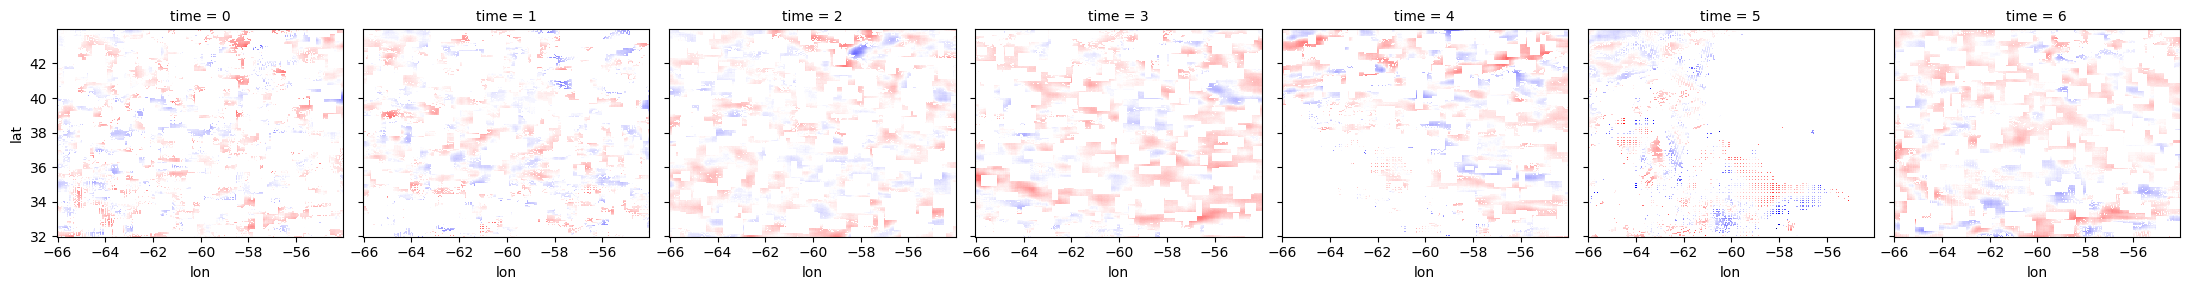

<Figure size 1500x500 with 0 Axes>

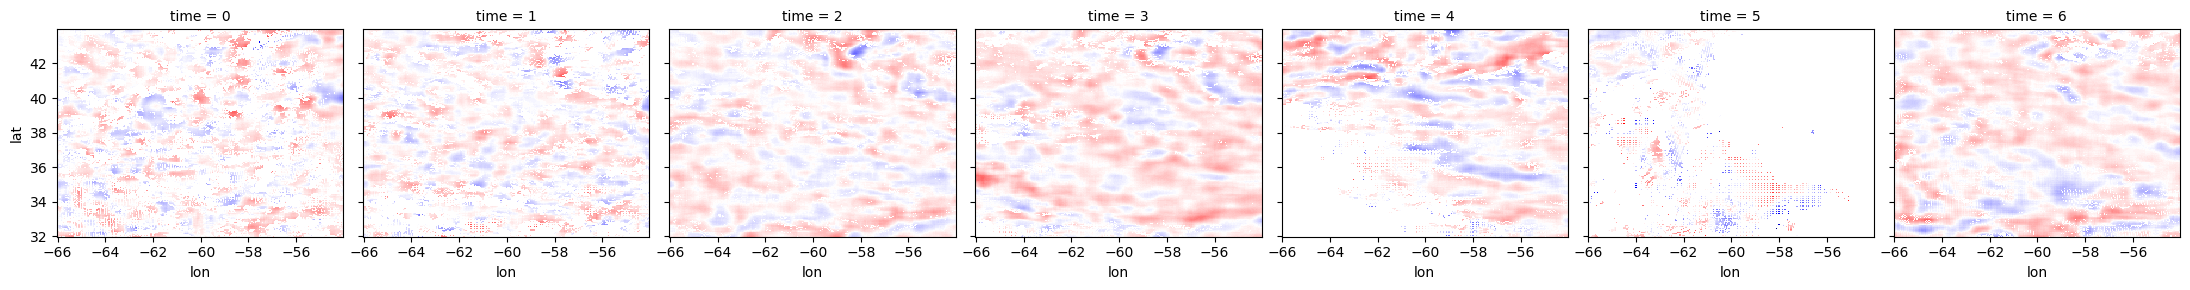

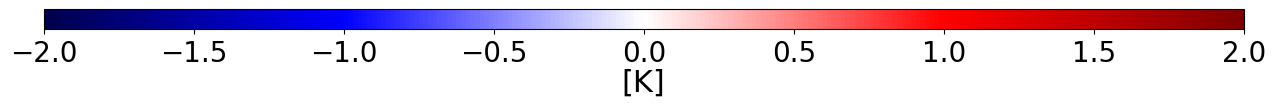

In [16]:
import cmocean as cmo
k=30
my_sample = next(itertools.islice(data_loader, k, None))

vmax = 2
vmin = -2.
cmap = plt.cm.seismic
norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)

fig = plt.figure(figsize=(15,5))
y = my_sample[0]
xr.Dataset(data_vars={'ssh':(('time','lat','lon'),y[0])},
           coords={'time':np.arange(7),
                   'lon':np.arange(-66, -54, 0.05),
                   'lat':np.arange(32, 44, 0.05)}).ssh.plot(col='time',cmap=cmap,
                                                            col_wrap=7,
                                                            vmin=vmin,vmax=vmax,
                                                            add_colorbar=False)

plt.savefig('/Odyssey/private/m19beauc/more_gappy_inputs.pdf', bbox_inches='tight')


fig = plt.figure(figsize=(15,5))
y = my_sample[1]
xr.Dataset(data_vars={'ssh':(('time','lat','lon'),y[0])},
           coords={'time':np.arange(7),
                   'lon':np.arange(-66, -54, 0.05),
                   'lat':np.arange(32, 44, 0.05)}).ssh.plot(col='time',cmap=cmap,
                                                            col_wrap=7,
                                                            vmin=vmin,vmax=vmax,
                                                            add_colorbar=False)
plt.savefig('/Odyssey/private/m19beauc/gappy_targets.pdf', bbox_inches='tight')

fig = plt.figure(figsize=(15,2))
# Colorbar
cbar_ax = fig.add_axes([0.1, 0.1, 0.8, 0.1])
cbar_ax.tick_params(labelsize=20)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal', pad=3.0)
cbar.ax.set_title("[K]",fontsize=22,y=-3.5)
plt.savefig('/Odyssey/private/m19beauc/standalone_colorbars.pdf', bbox_inches='tight')

# 1. Self attention mechanisms

In [3]:
import torch
from torch import nn
from torch.nn import functional as F
import math

class SelfAttention(nn.Module):
    def __init__(self, n_heads, d_embed, in_proj_bias=True, out_proj_bias=True):
        super().__init__()
        # This combines the Wq, Wk and Wv matrices into one matrix
        self.in_proj = nn.Linear(d_embed, 3 * d_embed, bias=in_proj_bias)
        # This one represents the Wo matrix
        self.out_proj = nn.Linear(d_embed, d_embed, bias=out_proj_bias)
        self.n_heads = n_heads
        self.d_head = d_embed // n_heads

    def forward(self, x, causal_mask=False):
        # x: # (Batch_Size, Seq_Len, Dim)

        # (Batch_Size, Seq_Len, Dim)
        input_shape = x.shape 
        
        # (Batch_Size, Seq_Len, Dim)
        batch_size, sequence_length, d_embed = input_shape 

        # (Batch_Size, Seq_Len, H, Dim / H)
        interim_shape = (batch_size, sequence_length, self.n_heads, self.d_head) 

        # (Batch_Size, Seq_Len, Dim) -> (Batch_Size, Seq_Len, Dim * 3) -> 3 tensor of shape (Batch_Size, Seq_Len, Dim)
        q, k, v = self.in_proj(x).chunk(3, dim=-1)
        
        # (Batch_Size, Seq_Len, Dim) -> (Batch_Size, Seq_Len, H, Dim / H) -> (Batch_Size, H, Seq_Len, Dim / H)
        q = q.view(interim_shape).transpose(1, 2)
        k = k.view(interim_shape).transpose(1, 2)
        v = v.view(interim_shape).transpose(1, 2)

        # (Batch_Size, H, Seq_Len, Dim / H) @ (Batch_Size, H, Dim / H, Seq_Len) -> (Batch_Size, H, Seq_Len, Seq_Len)
        weight = q @ k.transpose(-1, -2)
        
        if causal_mask:
            # Mask where the upper triangle (above the principal diagonal) is 1
            mask = torch.ones_like(weight, dtype=torch.bool).triu(1) 
            # Fill the upper triangle with -inf
            weight.masked_fill_(mask, -torch.inf) 
        
        # Divide by d_k (Dim / H). 
        # (Batch_Size, H, Seq_Len, Seq_Len) -> (Batch_Size, H, Seq_Len, Seq_Len)
        weight /= math.sqrt(self.d_head) 
        # (Batch_Size, H, Seq_Len, Seq_Len) -> (Batch_Size, H, Seq_Len, Seq_Len)
        weight = F.softmax(weight, dim=-1) 
        # (Batch_Size, H, Seq_Len, Seq_Len) @ (Batch_Size, H, Seq_Len, Dim / H) -> (Batch_Size, H, Seq_Len, Dim / H)
        output = weight @ v
        # (Batch_Size, H, Seq_Len, Dim / H) -> (Batch_Size, Seq_Len, H, Dim / H)
        output = output.transpose(1, 2) 
        # (Batch_Size, Seq_Len, H, Dim / H) -> (Batch_Size, Seq_Len, Dim)
        output = output.reshape(input_shape) 
        # (Batch_Size, Seq_Len, Dim) -> (Batch_Size, Seq_Len, Dim)
        output = self.out_proj(output) 
        # (Batch_Size, Seq_Len, Dim)
        return output

class CrossAttention(nn.Module):
    def __init__(self, n_heads, d_embed, d_cross, in_proj_bias=True, out_proj_bias=True):
        super().__init__()
        self.q_proj   = nn.Linear(d_embed, d_embed, bias=in_proj_bias)
        self.k_proj   = nn.Linear(d_cross, d_embed, bias=in_proj_bias)
        self.v_proj   = nn.Linear(d_cross, d_embed, bias=in_proj_bias)
        self.out_proj = nn.Linear(d_embed, d_embed, bias=out_proj_bias)
        self.n_heads = n_heads
        self.d_head = d_embed // n_heads
    
    def forward(self, x, y):
        # x (latent): # (Batch_Size, Seq_Len_Q, Dim_Q)
        # y (context): # (Batch_Size, Seq_Len_KV, Dim_KV) = (Batch_Size, 77, 768)

        input_shape = x.shape
        batch_size, sequence_length, d_embed = input_shape
        # Divide each embedding of Q into multiple heads such that d_heads * n_heads = Dim_Q
        interim_shape = (batch_size, -1, self.n_heads, self.d_head)
        
        # (Batch_Size, Seq_Len_Q, Dim_Q) -> (Batch_Size, Seq_Len_Q, Dim_Q)
        q = self.q_proj(x)
        # (Batch_Size, Seq_Len_KV, Dim_KV) -> (Batch_Size, Seq_Len_KV, Dim_Q)
        k = self.k_proj(y)
        # (Batch_Size, Seq_Len_KV, Dim_KV) -> (Batch_Size, Seq_Len_KV, Dim_Q)
        v = self.v_proj(y)

        # (Batch_Size, Seq_Len_Q, Dim_Q) -> (Batch_Size, Seq_Len_Q, H, Dim_Q / H) -> (Batch_Size, H, Seq_Len_Q, Dim_Q / H)
        q = q.view(interim_shape).transpose(1, 2) 
        # (Batch_Size, Seq_Len_KV, Dim_Q) -> (Batch_Size, Seq_Len_KV, H, Dim_Q / H) -> (Batch_Size, H, Seq_Len_KV, Dim_Q / H)
        k = k.view(interim_shape).transpose(1, 2) 
        # (Batch_Size, Seq_Len_KV, Dim_Q) -> (Batch_Size, Seq_Len_KV, H, Dim_Q / H) -> (Batch_Size, H, Seq_Len_KV, Dim_Q / H)
        v = v.view(interim_shape).transpose(1, 2) 
        
        # (Batch_Size, H, Seq_Len_Q, Dim_Q / H) @ (Batch_Size, H, Dim_Q / H, Seq_Len_KV) -> (Batch_Size, H, Seq_Len_Q, Seq_Len_KV)
        weight = q @ k.transpose(-1, -2)
        # (Batch_Size, H, Seq_Len_Q, Seq_Len_KV)
        weight /= math.sqrt(self.d_head)
        # (Batch_Size, H, Seq_Len_Q, Seq_Len_KV)
        weight = F.softmax(weight, dim=-1)
        # (Batch_Size, H, Seq_Len_Q, Seq_Len_KV) @ (Batch_Size, H, Seq_Len_KV, Dim_Q / H) -> (Batch_Size, H, Seq_Len_Q, Dim_Q / H)
        output = weight @ v
        # (Batch_Size, H, Seq_Len_Q, Dim_Q / H) -> (Batch_Size, Seq_Len_Q, H, Dim_Q / H)
        output = output.transpose(1, 2).contiguous()
        # (Batch_Size, Seq_Len_Q, H, Dim_Q / H) -> (Batch_Size, Seq_Len_Q, Dim_Q)
        output = output.view(input_shape)
        # (Batch_Size, Seq_Len_Q, Dim_Q) -> (Batch_Size, Seq_Len_Q, Dim_Q)
        output = self.out_proj(output)
        # (Batch_Size, Seq_Len_Q, Dim_Q)
        return output

# 2. VAE architectures

In [4]:
###############################################################################
# BSD 3-Clause License
#
# Copyright (c) 2018, NVIDIA CORPORATION. All rights reserved.
#
# Author & Contact: Guilin Liu (guilinl@nvidia.com)
###############################################################################

import torch
import torch.nn.functional as F
from torch import nn, cuda
from torch.autograd import Variable

class PConv2d(nn.Conv2d):
    def __init__(self, *args, **kwargs):

        # whether the mask is multi-channel or not
        if 'multi_channel' in kwargs:
            self.multi_channel = kwargs['multi_channel']
            kwargs.pop('multi_channel')
        else:
            self.multi_channel = False  

        if 'return_mask' in kwargs:
            self.return_mask = kwargs['return_mask']
            kwargs.pop('return_mask')
        else:
            self.return_mask = False

        super(PConv2d, self).__init__(*args, **kwargs)

        if self.multi_channel:
            self.weight_maskUpdater = torch.ones(self.out_channels, self.in_channels, self.kernel_size[0], self.kernel_size[1])
        else:
            self.weight_maskUpdater = torch.ones(1, 1, self.kernel_size[0], self.kernel_size[1])
            
        self.slide_winsize = self.weight_maskUpdater.shape[1] * self.weight_maskUpdater.shape[2] * self.weight_maskUpdater.shape[3]

        self.last_size = (None, None, None, None)
        self.update_mask = None
        self.mask_ratio = None

    def forward(self, input, mask_in=None):
        assert len(input.shape) == 4
        if mask_in is not None or self.last_size != tuple(input.shape):
            self.last_size = tuple(input.shape)

            with torch.no_grad():
                if self.weight_maskUpdater.type() != input.type():
                    self.weight_maskUpdater = self.weight_maskUpdater.to(input)

                if mask_in is None:
                    # if mask is not provided, create a mask
                    if self.multi_channel:
                        mask = torch.ones(input.data.shape[0], input.data.shape[1], input.data.shape[2], input.data.shape[3]).to(input)
                    else:
                        mask = torch.ones(1, 1, input.data.shape[2], input.data.shape[3]).to(input)
                else:
                    mask = mask_in
                        
                self.update_mask = F.conv2d(mask, self.weight_maskUpdater, bias=None, stride=self.stride, padding=self.padding, dilation=self.dilation, groups=1)

                # for mixed precision training, change 1e-8 to 1e-6
                self.mask_ratio = self.slide_winsize/(self.update_mask + 1e-8)
                # self.mask_ratio = torch.max(self.update_mask)/(self.update_mask + 1e-8)
                self.update_mask = torch.clamp(self.update_mask, 0, 1)
                self.mask_ratio = torch.mul(self.mask_ratio, self.update_mask)


        raw_out = super(PConv2d, self).forward(torch.mul(input, mask) if mask_in is not None else input)

        if self.bias is not None:
            bias_view = self.bias.view(1, self.out_channels, 1, 1)
            output = torch.mul(raw_out - bias_view, self.mask_ratio) + bias_view
            output = torch.mul(output, self.update_mask)
        else:
            output = torch.mul(raw_out, self.mask_ratio)


        if self.return_mask:
            return output, self.update_mask
        else:
            return output

In [5]:
import torch
from torch import nn
from torch.nn import functional as F

class VAE_PAttentionBlock(nn.Module):
    def __init__(self, channels):
        super().__init__()
        self.groupnorm = nn.GroupNorm(32, channels)
        self.attention = SelfAttention(1, 2*channels)
    
    def forward(self, x, mask):
        # x: (Batch_Size, Features, Height, Width)

        residue = x 

        # (Batch_Size, Features, Height, Width) -> (Batch_Size, Features, Height, Width)
        x = self.groupnorm(x)
        x = torch.cat([x,mask], dim=1)
        
        n, c, h, w = x.shape
        
        # (Batch_Size, Features, Height, Width) -> (Batch_Size, Features, Height * Width)
        x = x.view((n, c, h * w)) 
        # (Batch_Size, Features, Height * Width) -> (Batch_Size, Height * Width, Features). Each pixel becomes a feature of size "Features", the sequence length is "Height * Width".
        x = x.transpose(-1, -2)
        # Perform self-attention WITHOUT mask
        # (Batch_Size, Height * Width, Features) -> (Batch_Size, Height * Width, Features)
        x = self.attention(x)
        # (Batch_Size, Height * Width, Features) -> (Batch_Size, Features, Height * Width)
        x = x.transpose(-1, -2)
        # (Batch_Size, Features, Height * Width) -> (Batch_Size, Features, Height, Width)
        x = x.view((n, c, h, w))
        x, mask = x[:,:(c//2),:,:] , mask
        # (Batch_Size, Features, Height, Width) + (Batch_Size, Features, Height, Width) -> (Batch_Size, Features, Height, Width) 
        x += residue

        # (Batch_Size, Features, Height, Width)
        return x, mask

class VAE_PResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.groupnorm_1 = nn.GroupNorm(32, in_channels)
        self.conv_1 = PConv2d(in_channels, out_channels, kernel_size=3, padding=1, multi_channel=True, return_mask=True)

        self.groupnorm_2 = nn.GroupNorm(32, out_channels)
        self.conv_2 = PConv2d(out_channels, out_channels, kernel_size=3, padding=1, multi_channel=True,return_mask=True)

        if in_channels == out_channels:
            self.residual_layer = nn.Identity()
        else:
            self.residual_layer = PConv2d(in_channels, out_channels, kernel_size=1, padding=0, multi_channel=True, return_mask=True)
    
    def forward(self, x, mask):
        # x: (Batch_Size, In_Channels, Height, Width)

        residue = x
        residue_mask = mask
                
        # (Batch_Size, In_Channels, Height, Width) -> (Batch_Size, In_Channels, Height, Width)
        x = self.groupnorm_1(x)
        # (Batch_Size, In_Channels, Height, Width) -> (Batch_Size, In_Channels, Height, Width)
        x = F.silu(x)
        # (Batch_Size, In_Channels, Height, Width) -> (Batch_Size, Out_Channels, Height, Width)
        x, mask = self.conv_1(x, mask)
        # (Batch_Size, Out_Channels, Height, Width) -> (Batch_Size, Out_Channels, Height, Width)
        x = self.groupnorm_2(x)
        # (Batch_Size, Out_Channels, Height, Width) -> (Batch_Size, Out_Channels, Height, Width)
        x = F.silu(x)
        # (Batch_Size, Out_Channels, Height, Width) -> (Batch_Size, Out_Channels, Height, Width)
        x, mask = self.conv_2(x, mask)
        # (Batch_Size, Out_Channels, Height, Width) -> (Batch_Size, Out_Channels, Height, Width)
        if isinstance(self.residual_layer,nn.Identity):
            return x + self.residual_layer(residue), mask
        else:
            res, mask = self.residual_layer(residue, residue_mask)
            return x + res, mask

class VAE_AttentionBlock(nn.Module):
    def __init__(self, channels):
        super().__init__()
        self.groupnorm = nn.GroupNorm(32, channels)
        self.attention = SelfAttention(1, channels)
    
    def forward(self, x):
        # x: (Batch_Size, Features, Height, Width)

        residue = x 

        # (Batch_Size, Features, Height, Width) -> (Batch_Size, Features, Height, Width)
        x = self.groupnorm(x)
        
        n, c, h, w = x.shape
        # (Batch_Size, Features, Height, Width) -> (Batch_Size, Features, Height * Width)
        x = x.view((n, c, h * w)) 
        # (Batch_Size, Features, Height * Width) -> (Batch_Size, Height * Width, Features). Each pixel becomes a feature of size "Features", the sequence length is "Height * Width".
        x = x.transpose(-1, -2)
        # Perform self-attention WITHOUT mask
        # (Batch_Size, Height * Width, Features) -> (Batch_Size, Height * Width, Features)
        x = self.attention(x)
        # (Batch_Size, Height * Width, Features) -> (Batch_Size, Features, Height * Width)
        x = x.transpose(-1, -2)
        # (Batch_Size, Features, Height * Width) -> (Batch_Size, Features, Height, Width)
        x = x.view((n, c, h, w))
        # (Batch_Size, Features, Height, Width) + (Batch_Size, Features, Height, Width) -> (Batch_Size, Features, Height, Width) 
        x += residue

        # (Batch_Size, Features, Height, Width)
        return x

class VAE_ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.groupnorm_1 = nn.GroupNorm(32, in_channels)
        self.conv_1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)

        self.groupnorm_2 = nn.GroupNorm(32, out_channels)
        self.conv_2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)

        if in_channels == out_channels:
            self.residual_layer = nn.Identity()
        else:
            self.residual_layer = nn.Conv2d(in_channels, out_channels, kernel_size=1, padding=0)
            
    def forward(self, x):
        # x: (Batch_Size, In_Channels, Height, Width)

        residue = x
                
        # (Batch_Size, In_Channels, Height, Width) -> (Batch_Size, In_Channels, Height, Width)
        x = self.groupnorm_1(x)
        # (Batch_Size, In_Channels, Height, Width) -> (Batch_Size, In_Channels, Height, Width)
        x = F.silu(x)
        # (Batch_Size, In_Channels, Height, Width) -> (Batch_Size, Out_Channels, Height, Width)
        x  = self.conv_1(x)
        # (Batch_Size, Out_Channels, Height, Width) -> (Batch_Size, Out_Channels, Height, Width)
        x = self.groupnorm_2(x)
        # (Batch_Size, Out_Channels, Height, Width) -> (Batch_Size, Out_Channels, Height, Width)
        x = F.silu(x)
        # (Batch_Size, Out_Channels, Height, Width) -> (Batch_Size, Out_Channels, Height, Width)
        x = self.conv_2(x)
        # (Batch_Size, Out_Channels, Height, Width) -> (Batch_Size, Out_Channels, Height, Width)

        return x + self.residual_layer(residue)

    
class VAE_Encoder(nn.Sequential):
    def __init__(self, in_channels=9, out_channels=28):
        super().__init__(
            # (Batch_Size, Channel, Height, Width) -> (Batch_Size, 128, Height, Width)
            PConv2d(in_channels, 128, kernel_size=3, padding=1,multi_channel=True, return_mask=True),  
             # (Batch_Size, 128, Height, Width) -> (Batch_Size, 128, Height, Width)
            VAE_PResidualBlock(128, 128),
            # (Batch_Size, 128, Height, Width) -> (Batch_Size, 128, Height, Width)
            VAE_PResidualBlock(128, 128),
            # (Batch_Size, 128, Height, Width) -> (Batch_Size, 128, Height / 2, Width / 2)
            PConv2d(128, 128, kernel_size=3, stride=2, padding=0, multi_channel=True,return_mask=True),
            # (Batch_Size, 128, Height / 2, Width / 2) -> (Batch_Size, 256, Height / 2, Width / 2)
            VAE_PResidualBlock(128, 256), 
            # (Batch_Size, 256, Height / 2, Width / 2) -> (Batch_Size, 256, Height / 2, Width / 2)
            #VAE_PResidualBlock(256, 256), 
            # (Batch_Size, 256, Height / 2, Width / 2) -> (Batch_Size, 256, Height / 4, Width / 4)
            PConv2d(256, 256, kernel_size=3, stride=2, padding=0,multi_channel=True, return_mask=True), 
            # (Batch_Size, 256, Height / 4, Width / 4) -> (Batch_Size, 512, Height / 4, Width / 4)
            VAE_PResidualBlock(256, 512), 
            # (Batch_Size, 512, Height / 4, Width / 4) -> (Batch_Size, 512, Height / 4, Width / 4)
            #VAE_PResidualBlock(512, 512), 
            # (Batch_Size, 512, Height / 4, Width / 4) -> (Batch_Size, 512, Height / 8, Width / 8)
            #PConv2d(512, 512, kernel_size=3, stride=2, padding=0,multi_channel=True, return_mask=True), 
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            #VAE_PResidualBlock(512, 512), 
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            #VAE_PResidualBlock(512, 512), 
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            VAE_PResidualBlock(512, 512), 
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            VAE_PAttentionBlock(512), 
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            VAE_PResidualBlock(512, 512), 
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            nn.GroupNorm(32, 512), 
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            nn.SiLU(), 

            # Because the padding=1, it means the width and height will increase by 2
            # Out_Height = In_Height + Padding_Top + Padding_Bottom
            # Out_Width = In_Width + Padding_Left + Padding_Right
            # Since padding = 1 means Padding_Top = Padding_Bottom = Padding_Left = Padding_Right = 1,
            # Since the Out_Width = In_Width + 2 (same for Out_Height), it will compensate for the Kernel size of 3
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 8, Height / 8, Width / 8). 
            PConv2d(512, out_channels, kernel_size=3, padding=1, multi_channel=True,return_mask=True), 

            # (Batch_Size, 8, Height / 8, Width / 8) -> (Batch_Size, 8, Height / 8, Width / 8)
            PConv2d(out_channels, out_channels, kernel_size=1, padding=0, multi_channel=True, return_mask=True), 
        )

    def forward(self, x):
        # x: (Batch_Size, Channel, Height, Width)
        # noise: (Batch_Size, 4, Height / 8, Width / 8)

        mask = torch.where(x==0.,0.,1.)
        
        for module in self:

            if getattr(module, 'stride', None) == (2, 2):  # Padding at downsampling should be asymmetric (see #8)
                # Pad: (Padding_Left, Padding_Right, Padding_Top, Padding_Bottom).
                # Pad with zeros on the right and bottom.
                # (Batch_Size, Channel, Height, Width) -> (Batch_Size, Channel, Height + Padding_Top + Padding_Bottom, Width + Padding_Left + Padding_Right) = (Batch_Size, Channel, Height + 1, Width + 1)
                x = F.pad(x, (0, 1, 0, 1))
                mask = F.pad(mask, (0, 1, 0, 1))
                
            if (isinstance(module, nn.GroupNorm) or isinstance(module, nn.SiLU)):
                x = module(x)
            else:
                x, mask = module(x,mask)
        
        # (Batch_Size, 8, Height / 8, Width / 8) -> two tensors of shape (Batch_Size, 4, Height / 8, Width / 8)
        mean, log_variance = torch.chunk(x, 2, dim=1)
        
        # Clamp the log variance between -30 and 20, so that the variance is between (circa) 1e-14 and 1e8. 
        # (Batch_Size, 4, Height / 8, Width / 8) -> (Batch_Size, 4, Height / 8, Width / 8)
        log_variance = torch.clamp(log_variance, -30, 20)
        
        # (Batch_Size, 4, Height / 8, Width / 8) -> (Batch_Size, 4, Height / 8, Width / 8)
        variance = log_variance.exp()
        
        # (Batch_Size, 4, Height / 8, Width / 8) -> (Batch_Size, 4, Height / 8, Width / 8)
        stdev = variance.sqrt()
        
        # reparametrization trick: Transform N(0, 1) -> N(mean, stdev) 
        # (Batch_Size, 4, Height / 8, Width / 8) -> (Batch_Size, 4, Height / 8, Width / 8)
        noise = torch.Tensor(np.random.normal(size=mean.size(), scale=1.0)).to(x.device)
        x = mean + stdev * noise
        
        # Scale by a constant
        # Constant taken from: https://github.com/CompVis/stable-diffusion/blob/21f890f9da3cfbeaba8e2ac3c425ee9e998d5229/configs/stable-diffusion/v1-inference.yaml#L17C1-L17C1
        x *= 0.18215
                
        return x, mean, log_variance

class VAE_Decoder(nn.Sequential):
    def __init__(self,in_channels=14, out_channels=9):
        super().__init__(
            # (Batch_Size, 4, Height / 8, Width / 8) -> (Batch_Size, 4, Height / 8, Width / 8)
            nn.Conv2d(in_channels, 4, kernel_size=1, padding=0),
            # (Batch_Size, 4, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            nn.Conv2d(4, 512, kernel_size=3, padding=1),   
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            VAE_ResidualBlock(512, 512), 
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            VAE_AttentionBlock(512), 
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            VAE_ResidualBlock(512, 512), 
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            #VAE_ResidualBlock(512, 512), 
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            #VAE_ResidualBlock(512, 512), 
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            #VAE_ResidualBlock(512, 512), 
            # Repeats the rows and columns of the data by scale_factor (like when you resize an image by doubling its size).
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 4, Width / 4)
            #nn.Upsample(scale_factor=2),
            # (Batch_Size, 512, Height / 4, Width / 4) -> (Batch_Size, 512, Height / 4, Width / 4)
            nn.Conv2d(512, 512, kernel_size=3, padding=1), 
            # (Batch_Size, 512, Height / 4, Width / 4) -> (Batch_Size, 512, Height / 4, Width / 4)
            VAE_ResidualBlock(512, 512), 
            # (Batch_Size, 512, Height / 4, Width / 4) -> (Batch_Size, 512, Height / 4, Width / 4)
            #VAE_ResidualBlock(512, 512), 
            # (Batch_Size, 512, Height / 4, Width / 4) -> (Batch_Size, 512, Height / 4, Width / 4)
            #VAE_ResidualBlock(512, 512), 
            # (Batch_Size, 512, Height / 4, Width / 4) -> (Batch_Size, 512, Height / 2, Width / 2)
            nn.Upsample(scale_factor=2), 
            # (Batch_Size, 512, Height / 2, Width / 2) -> (Batch_Size, 512, Height / 2, Width / 2)
            nn.Conv2d(512, 512, kernel_size=3, padding=1), 
            # (Batch_Size, 512, Height / 2, Width / 2) -> (Batch_Size, 256, Height / 2, Width / 2)
            VAE_ResidualBlock(512, 256), 
            # (Batch_Size, 256, Height / 2, Width / 2) -> (Batch_Size, 256, Height / 2, Width / 2)
            VAE_ResidualBlock(256, 256), 
            # (Batch_Size, 256, Height / 2, Width / 2) -> (Batch_Size, 256, Height / 2, Width / 2)
            #VAE_ResidualBlock(256, 256), 
            # (Batch_Size, 256, Height / 2, Width / 2) -> (Batch_Size, 256, Height, Width)
            nn.Upsample(scale_factor=2), 
            # (Batch_Size, 256, Height, Width) -> (Batch_Size, 256, Height, Width)
            nn.Conv2d(256, 256, kernel_size=3, padding=1), 
            # (Batch_Size, 256, Height, Width) -> (Batch_Size, 128, Height, Width)
            VAE_ResidualBlock(256, 128), 
            # (Batch_Size, 128, Height, Width) -> (Batch_Size, 128, Height, Width)
            VAE_ResidualBlock(128, 128), 
            # (Batch_Size, 128, Height, Width) -> (Batch_Size, 128, Height, Width)
            VAE_ResidualBlock(128, 128), 
            # (Batch_Size, 128, Height, Width) -> (Batch_Size, 128, Height, Width)
            nn.GroupNorm(32, 128), 
            # (Batch_Size, 128, Height, Width) -> (Batch_Size, 128, Height, Width)
            nn.SiLU(), 
            # (Batch_Size, 128, Height, Width) -> (Batch_Size, 3, Height, Width)
            nn.Conv2d(128, out_channels, kernel_size=3, padding=1), 
        )

    def forward(self, x):
        # x: (Batch_Size, 4, Height / 8, Width / 8)
        
        # Remove the scaling added by the Encoder.
        x /= 0.18215

        for module in self:
            x = module(x)

        # (Batch_Size, 3, Height, Width)
        return x

In [6]:
class VAE_Encoder(nn.Sequential):
    def __init__(self, in_channels=9, out_channels=28):
        super().__init__(
            # (Batch_Size, Channel, Height, Width) -> (Batch_Size, 128, Height, Width)
            PConv2d(in_channels, 24, kernel_size=3, padding=1,multi_channel=True, return_mask=True),      
            # (Batch_Size, 128, Height, Width) -> (Batch_Size, 128, Height / 2, Width / 2)
            PConv2d(24, 48, kernel_size=3, stride=2, padding=0, multi_channel=True,return_mask=True),
            # (Batch_Size, 256, Height / 2, Width / 2) -> (Batch_Size, 256, Height / 4, Width / 4)
            PConv2d(48, 96, kernel_size=3, stride=2, padding=0,multi_channel=True, return_mask=True), 
            # (Batch_Size, 512, Height / 4, Width / 4) -> (Batch_Size, 512, Height / 8, Width / 8)
            PConv2d(96, 192, kernel_size=3, stride=2, padding=0,multi_channel=True, return_mask=True), 
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            nn.GroupNorm(12, 192), 
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            nn.SiLU(), 
            # Because the padding=1, it means the width and height will increase by 2
            # Out_Height = In_Height + Padding_Top + Padding_Bottom
            # Out_Width = In_Width + Padding_Left + Padding_Right
            # Since padding = 1 means Padding_Top = Padding_Bottom = Padding_Left = Padding_Right = 1,
            # Since the Out_Width = In_Width + 2 (same for Out_Height), it will compensate for the Kernel size of 3
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 8, Height / 8, Width / 8). 
            PConv2d(192, out_channels, kernel_size=3, padding=1, multi_channel=True,return_mask=True), 
            # (Batch_Size, 8, Height / 8, Width / 8) -> (Batch_Size, 8, Height / 8, Width / 8)
            PConv2d(out_channels, out_channels, kernel_size=1, padding=0, multi_channel=True, return_mask=True), 
        )

    def forward(self, x):
        # x: (Batch_Size, Channel, Height, Width)
        # noise: (Batch_Size, 4, Height / 8, Width / 8)

        mask = torch.where(x==0.,0.,1.)
        
        for module in self:

            if getattr(module, 'stride', None) == (2, 2):  # Padding at downsampling should be asymmetric (see #8)
                # Pad: (Padding_Left, Padding_Right, Padding_Top, Padding_Bottom).
                # Pad with zeros on the right and bottom.
                # (Batch_Size, Channel, Height, Width) -> (Batch_Size, Channel, Height + Padding_Top + Padding_Bottom, Width + Padding_Left + Padding_Right) = (Batch_Size, Channel, Height + 1, Width + 1)
                x = F.pad(x, (0, 1, 0, 1))
                mask = F.pad(mask, (0, 1, 0, 1))
                
            if (isinstance(module, nn.GroupNorm) or isinstance(module, nn.SiLU)):
                x = module(x)
            else:
                x, mask = module(x,mask)
        
        # (Batch_Size, 8, Height / 8, Width / 8) -> two tensors of shape (Batch_Size, 4, Height / 8, Width / 8)
        mean, log_variance = torch.chunk(x, 2, dim=1)
        
        # Clamp the log variance between -30 and 20, so that the variance is between (circa) 1e-14 and 1e8. 
        # (Batch_Size, 4, Height / 8, Width / 8) -> (Batch_Size, 4, Height / 8, Width / 8)
        log_variance = torch.clamp(log_variance, -30, 20)
        
        # (Batch_Size, 4, Height / 8, Width / 8) -> (Batch_Size, 4, Height / 8, Width / 8)
        variance = log_variance.exp()
        
        # (Batch_Size, 4, Height / 8, Width / 8) -> (Batch_Size, 4, Height / 8, Width / 8)
        stdev = variance.sqrt()
        
        # reparametrization trick: Transform N(0, 1) -> N(mean, stdev) 
        # (Batch_Size, 4, Height / 8, Width / 8) -> (Batch_Size, 4, Height / 8, Width / 8)
        noise = torch.Tensor(np.random.normal(size=mean.size(), scale=1.0)).to(x.device)
        x = mean + stdev * noise
        
        # Scale by a constant
        # Constant taken from: https://github.com/CompVis/stable-diffusion/blob/21f890f9da3cfbeaba8e2ac3c425ee9e998d5229/configs/stable-diffusion/v1-inference.yaml#L17C1-L17C1
        x *= 0.18215
                
        return x, mean, log_variance

class VAE_Decoder(nn.Sequential):
    def __init__(self,in_channels=14, out_channels=9):
        super().__init__(
            # (Batch_Size, 4, Height / 8, Width / 8) -> (Batch_Size, 4, Height / 8, Width / 8)
            nn.Conv2d(in_channels, 4, kernel_size=1, padding=0),
            # (Batch_Size, 4, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            nn.Conv2d(4, 192, kernel_size=3, padding=1),   
            nn.Upsample(scale_factor=2),
            # (Batch_Size, 512, Height / 4, Width / 4) -> (Batch_Size, 512, Height / 4, Width / 4)
            nn.Conv2d(192, 96, kernel_size=3, padding=1), 
            nn.Upsample(scale_factor=2), 
            # (Batch_Size, 512, Height / 2, Width / 2) -> (Batch_Size, 512, Height / 2, Width / 2)
            nn.Conv2d(96, 48, kernel_size=3, padding=1), 
            nn.Upsample(scale_factor=2), 
            # (Batch_Size, 256, Height, Width) -> (Batch_Size, 256, Height, Width)
            nn.Conv2d(48, 48, kernel_size=3, padding=1), 
            # (Batch_Size, 128, Height, Width) -> (Batch_Size, 128, Height, Width)
            nn.GroupNorm(12, 48), 
            # (Batch_Size, 128, Height, Width) -> (Batch_Size, 128, Height, Width)
            nn.SiLU(), 
            # (Batch_Size, 128, Height, Width) -> (Batch_Size, 3, Height, Width)
            nn.Conv2d(48, out_channels, kernel_size=3, padding=1), 
        )

    def forward(self, x):
        # x: (Batch_Size, 4, Height / 8, Width / 8)
        
        # Remove the scaling added by the Encoder.
        x /= 0.18215

        for module in self:
            x = module(x)

        # (Batch_Size, 3, Height, Width)
        return x

In [7]:
class VAE_Encoder(nn.Sequential):
    def __init__(self, in_channels=9, out_channels=28):
        super().__init__(
            # (Batch_Size, Channel, Height, Width) -> (Batch_Size, 128, Height, Width)
            PConv2d(in_channels, 24, kernel_size=3, padding=1,multi_channel=True, return_mask=True),              
            PConv2d(24, 48, kernel_size=3, stride=2, padding=0,multi_channel=True, return_mask=True), 
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            nn.GroupNorm(12, 48), 
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            nn.SiLU(), 
            PConv2d(48, out_channels, kernel_size=3, padding=1, multi_channel=True,return_mask=True), 
            # (Batch_Size, 8, Height / 8, Width / 8) -> (Batch_Size, 8, Height / 8, Width / 8)
            PConv2d(out_channels, out_channels, kernel_size=1, padding=0, multi_channel=True, return_mask=True), 
        )

    def forward(self, x):
        # x: (Batch_Size, Channel, Height, Width)
        # noise: (Batch_Size, 4, Height / 8, Width / 8)

        mask = torch.where(x==0.,0.,1.)
        
        for module in self:

            if getattr(module, 'stride', None) == (2, 2):  # Padding at downsampling should be asymmetric (see #8)
                # Pad: (Padding_Left, Padding_Right, Padding_Top, Padding_Bottom).
                # Pad with zeros on the right and bottom.
                # (Batch_Size, Channel, Height, Width) -> (Batch_Size, Channel, Height + Padding_Top + Padding_Bottom, Width + Padding_Left + Padding_Right) = (Batch_Size, Channel, Height + 1, Width + 1)
                x = F.pad(x, (0, 1, 0, 1))
                mask = F.pad(mask, (0, 1, 0, 1))
                
            if (isinstance(module, nn.GroupNorm) or isinstance(module, nn.SiLU)):
                x = module(x)
            else:
                x, mask = module(x,mask)
        
        # (Batch_Size, 8, Height / 8, Width / 8) -> two tensors of shape (Batch_Size, 4, Height / 8, Width / 8)
        mean, log_variance = torch.chunk(x, 2, dim=1)
        
        # Clamp the log variance between -30 and 20, so that the variance is between (circa) 1e-14 and 1e8. 
        # (Batch_Size, 4, Height / 8, Width / 8) -> (Batch_Size, 4, Height / 8, Width / 8)
        log_variance = torch.clamp(log_variance, -30, 20)
        
        # (Batch_Size, 4, Height / 8, Width / 8) -> (Batch_Size, 4, Height / 8, Width / 8)
        variance = log_variance.exp()
        
        # (Batch_Size, 4, Height / 8, Width / 8) -> (Batch_Size, 4, Height / 8, Width / 8)
        stdev = variance.sqrt()
        
        # reparametrization trick: Transform N(0, 1) -> N(mean, stdev) 
        # (Batch_Size, 4, Height / 8, Width / 8) -> (Batch_Size, 4, Height / 8, Width / 8)
        noise = torch.Tensor(np.random.normal(size=mean.size(), scale=1.0)).to(x.device)
        x = mean + stdev * noise
        
        # Scale by a constant
        # Constant taken from: https://github.com/CompVis/stable-diffusion/blob/21f890f9da3cfbeaba8e2ac3c425ee9e998d5229/configs/stable-diffusion/v1-inference.yaml#L17C1-L17C1
        x *= 0.18215
                
        return x, mean, log_variance

class VAE_Decoder(nn.Sequential):
    def __init__(self,in_channels=14, out_channels=9):
        super().__init__(
            # (Batch_Size, 4, Height / 8, Width / 8) -> (Batch_Size, 4, Height / 8, Width / 8)
            nn.Conv2d(in_channels, 24, kernel_size=1, padding=0),
            nn.Upsample(scale_factor=2), 
            nn.Conv2d(24, 48, kernel_size=3, padding=1), 
            # (Batch_Size, 128, Height, Width) -> (Batch_Size, 128, Height, Width)
            nn.GroupNorm(12, 48), 
            # (Batch_Size, 128, Height, Width) -> (Batch_Size, 128, Height, Width)
            nn.SiLU(), 
            # (Batch_Size, 128, Height, Width) -> (Batch_Size, 3, Height, Width)
            nn.Conv2d(48, out_channels, kernel_size=3, padding=1), 
        )

    def forward(self, x):
        # x: (Batch_Size, 4, Height / 8, Width / 8)
        
        # Remove the scaling added by the Encoder.
        x /= 0.18215

        for module in self:
            x = module(x)

        # (Batch_Size, 3, Height, Width)
        return x

In [7]:
class AE_Encoder(nn.Sequential):
    def __init__(self, in_channels=9, out_channels=28):
        super().__init__(
            # (Batch_Size, Channel, Height, Width) -> (Batch_Size, 128, Height, Width)
            PConv2d(in_channels, 24, kernel_size=3, padding=1,multi_channel=True, return_mask=True),      
            # (Batch_Size, 128, Height, Width) -> (Batch_Size, 128, Height / 2, Width / 2)
            PConv2d(24, 48, kernel_size=3, stride=2, padding=0, multi_channel=True,return_mask=True),
            # (Batch_Size, 256, Height / 2, Width / 2) -> (Batch_Size, 256, Height / 4, Width / 4)
            PConv2d(48, 96, kernel_size=3, stride=2, padding=0,multi_channel=True, return_mask=True), 
            # (Batch_Size, 512, Height / 4, Width / 4) -> (Batch_Size, 512, Height / 8, Width / 8)
            PConv2d(96, 192, kernel_size=3, stride=2, padding=0,multi_channel=True, return_mask=True), 
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            nn.GroupNorm(12, 192), 
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            nn.SiLU(), 
            # Because the padding=1, it means the width and height will increase by 2
            # Out_Height = In_Height + Padding_Top + Padding_Bottom
            # Out_Width = In_Width + Padding_Left + Padding_Right
            # Since padding = 1 means Padding_Top = Padding_Bottom = Padding_Left = Padding_Right = 1,
            # Since the Out_Width = In_Width + 2 (same for Out_Height), it will compensate for the Kernel size of 3
            # (Batch_Size, 512, Height / 8, Width / 8) -> (Batch_Size, 8, Height / 8, Width / 8). 
            PConv2d(192, out_channels, kernel_size=3, padding=1, multi_channel=True,return_mask=True), 
            # (Batch_Size, 8, Height / 8, Width / 8) -> (Batch_Size, 8, Height / 8, Width / 8)
            PConv2d(out_channels, out_channels, kernel_size=1, padding=0, multi_channel=True, return_mask=True), 
        )

    def forward(self, x):
        # x: (Batch_Size, Channel, Height, Width)
        # noise: (Batch_Size, 4, Height / 8, Width / 8)

        mask = torch.where(x==0.,0.,1.)
        
        for module in self:

            if getattr(module, 'stride', None) == (2, 2):  # Padding at downsampling should be asymmetric (see #8)
                # Pad: (Padding_Left, Padding_Right, Padding_Top, Padding_Bottom).
                # Pad with zeros on the right and bottom.
                # (Batch_Size, Channel, Height, Width) -> (Batch_Size, Channel, Height + Padding_Top + Padding_Bottom, Width + Padding_Left + Padding_Right) = (Batch_Size, Channel, Height + 1, Width + 1)
                x = F.pad(x, (0, 1, 0, 1))
                mask = F.pad(mask, (0, 1, 0, 1))
                
            if (isinstance(module, nn.GroupNorm) or isinstance(module, nn.SiLU)):
                x = module(x)
            else:
                x, mask = module(x,mask)
                
        return x

class AE_Decoder(nn.Sequential):
    def __init__(self,in_channels=14, out_channels=9):
        super().__init__(
            # (Batch_Size, 4, Height / 8, Width / 8) -> (Batch_Size, 4, Height / 8, Width / 8)
            nn.Conv2d(in_channels, 4, kernel_size=1, padding=0),
            # (Batch_Size, 4, Height / 8, Width / 8) -> (Batch_Size, 512, Height / 8, Width / 8)
            nn.Conv2d(4, 192, kernel_size=3, padding=1),   
            nn.Upsample(scale_factor=2),
            # (Batch_Size, 512, Height / 4, Width / 4) -> (Batch_Size, 512, Height / 4, Width / 4)
            nn.Conv2d(192, 96, kernel_size=3, padding=1), 
            nn.Upsample(scale_factor=2), 
            # (Batch_Size, 512, Height / 2, Width / 2) -> (Batch_Size, 512, Height / 2, Width / 2)
            nn.Conv2d(96, 48, kernel_size=3, padding=1), 
            nn.Upsample(scale_factor=2), 
            # (Batch_Size, 256, Height, Width) -> (Batch_Size, 256, Height, Width)
            nn.Conv2d(48, 48, kernel_size=3, padding=1), 
            # (Batch_Size, 128, Height, Width) -> (Batch_Size, 128, Height, Width)
            nn.GroupNorm(12, 48), 
            # (Batch_Size, 128, Height, Width) -> (Batch_Size, 128, Height, Width)
            nn.SiLU(), 
            # (Batch_Size, 128, Height, Width) -> (Batch_Size, 3, Height, Width)
            nn.Conv2d(48, out_channels, kernel_size=3, padding=1), 
        )

    def forward(self, x):
        # x: (Batch_Size, 4, Height / 8, Width / 8)
        
        # Remove the scaling added by the Encoder.
        #x /= 0.18215

        for module in self:
            x = module(x)

        # (Batch_Size, 3, Height, Width)
        return x

# VAE model

In [8]:
device='cuda'
from kornia.filters import sobel

class VAE(nn.Sequential):
    def __init__(self,in_channels=9, out_channels=28):
        super().__init__()
        self.encoder = VAE_Encoder(in_channels, out_channels).to(device)
        self.decoder = VAE_Decoder(out_channels//2,in_channels-5).to(device)
        
    def vae_loss(self, x, x_hat, mean, log_var, wKL=.01):
        err = x_hat-x
        err_grad = sobel(x_hat)-sobel(x)
        mask = torch.isnan(err)
        mask_grad = torch.isnan(err_grad)
        zeros= torch.zeros(err.size()).to(device)
        
        reproduction_loss = nn.functional.mse_loss(err[~mask], zeros[~mask], reduction='mean')
        #reproduction_loss = nn.functional.l1_loss(err[~mask], zeros[~mask], reduction='mean')

        #log_sigma_opt = 0.5 * reproduction_loss.log()
        grad_reproduction_loss = nn.functional.mse_loss(err_grad[~mask_grad], zeros[~mask_grad], reduction='mean')
        #log_sigma_opt_grad = 0.5 * grad_reproduction_loss.log()
        
        #reproduction_loss = 0.5 * torch.pow(err[~mask]/log_sigma_opt.exp(), 2) + log_sigma_opt
        #reproduction_loss = reproduction_loss.sum()
        #grad_reproduction_loss = 0.5 * torch.pow(err_grad[~mask]/log_sigma_opt_grad.exp(), 2) + log_sigma_opt_grad
        #grad_reproduction_loss = grad_reproduction_loss.sum()        
        
        KLD = - 0.5 * torch.sum(1+ log_var - mean.pow(2) - log_var.exp())
        #return reproduction_loss + 100.*grad_reproduction_loss + wKL*KLD, reproduction_loss, KLD
        return reproduction_loss  + wKL*KLD, reproduction_loss, KLD
        #return reproduction_loss, reproduction_loss, KLD

   
    def forward(self, x):
        # encoder
        z, mean, log_var = self.encoder(x)
        # decoder
        x_hat = self.decoder(z)
        return x_hat
        
vae = VAE(in_channels=7+5, out_channels=14)

RuntimeError: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 802: system not yet initialized

# AE model

In [9]:
device='cuda'
from kornia.filters import sobel

class AE(nn.Sequential):
    def __init__(self,in_channels=9, out_channels=28):
        super().__init__()
        self.encoder = AE_Encoder(in_channels, out_channels).to(device)
        self.decoder = AE_Decoder(out_channels, in_channels-5).to(device)
        
    def ae_loss(self, x, x_hat):
        
        err = x_hat-x
        err_grad = sobel(x_hat)-sobel(x)
        mask = torch.isnan(err)
        mask_grad = torch.isnan(err_grad)
        zeros= torch.zeros(err.size()).to(device)
        
        reproduction_loss = nn.functional.mse_loss(err[~mask], zeros[~mask], reduction='mean')
        grad_reproduction_loss = nn.functional.mse_loss(err_grad[~mask_grad], zeros[~mask_grad], reduction='mean')
        
        return reproduction_loss + 100.*grad_reproduction_loss
   
    def forward(self, x):
        # encoder
        z = self.encoder(x)
        # decoder
        x_hat = self.decoder(z)
        return x_hat
        
ae = AE(in_channels=1+5, out_channels=50)

# VAE Training

In [10]:
ckpt = torch.load('/homes/m19beauc/4dvarnet-starter/ckpt/DMI/SST/ckpt_vae_dmi_real.pth', map_location=device)
vae.load_state_dict(ckpt)

<All keys matched successfully>

In [57]:
#@title Training (double click to expand or collapse)

from IPython.display import clear_output
from torch.optim import Adam
import torch.optim as optim
from tqdm.autonotebook import tqdm
from kornia.filters import box_blur

n_epochs =  1000#@param {'type':'integer'}
## learning rate
lr = 1e-3 #@param {'type':'number'}

optimizer = Adam(
        [
            #{"params": vae.encoder.parameters(), "lr": lr},
            #{"params": vae.decoder.parameters(), "lr": lr},
            {"params": vae.parameters(), "lr": lr}
        ],
    )

#scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=30)
scheduler =  optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.5)

def smooth(inp, mask):
    sum_pool = torch.nn.AvgPool2d(kernel_size=5, stride=1, padding=2,
                                  divisor_override=1)
    s1 = sum_pool(inp)
    s2 = sum_pool(mask)
    res = torch.where(s2==0.,0.,s1/s2)
    return res

def norm(x):
    return (x-0.015)/0.46

# batch accumulation parameter
accum_iter = 1

tqdm_epoch = tqdm(range(n_epochs))

for epoch in tqdm_epoch:
    avg_loss = 0.
    num_items = 0
  
    for batch_idx, batch in enumerate(data_loader):

        y = batch[0]
        x = batch[1]
        if x.isfinite().float().mean() < 0.5:
            continue
        
        #x = norm(batch[2]-box_blur(batch[2], (35, 35)))
        #y = torch.where(torch.isnan(batch[0]),np.nan,x)
        #x = torch.where(torch.isnan(batch[1]),np.nan,x)
        #if x.isfinite().float().mean() < 0.5:
        #    continue
    
        #x_false = norm(batch[2]-box_blur(batch[2], (35, 35)))
        #x = torch.where(torch.isnan(batch[1]),x_false,x)

        #mask = (1-(batch.land_mask))
        #x = smooth(x,mask)
        #y = smooth(y,mask)
   
        y = y.nan_to_num().to(device)
        geo = torch.stack((batch.latv[:,0].nan_to_num(),
                                  batch.lonv[:,0].nan_to_num(),
                                  batch.land_mask[:,0].nan_to_num(),
                                  batch.topo[:,0].nan_to_num(),
                                  batch.fg_std[:,0].nan_to_num()), dim=1).to(device)    
        inp = torch.cat((y, geo),dim=1)
        inp = torch.cat((x.nan_to_num().to(device), geo),dim=1)
        with torch.set_grad_enabled(True):
            z, mean, log_var = vae.encoder(inp)
            x_hat = vae.decoder(z)
            loss_vae, rec, KL = vae.vae_loss(x.to(device), x_hat, mean, log_var, wKL=0.00001)
            loss = loss_vae
            #err_grad = sobel(x_hat)-sobel(x.to(device))
            #mask_grad = torch.isnan(err_grad)
            #zeros= torch.zeros(x.size()).to(device)
            #grad_rec = nn.functional.mse_loss(err_grad[~mask_grad], zeros[~mask_grad], reduction='mean')
            print(rec, 0.00001*KL)
        
            # normalize loss to account for batch accumulation
            loss = loss / accum_iter

            # backward pass
            loss.backward()

            # weights update
            if ((batch_idx + 1) % accum_iter == 0) or (batch_idx + 1 == len(data_loader)):
                optimizer.step()
                optimizer.zero_grad()
    
        avg_loss += loss.item() * x.shape[0]
        num_items += x.shape[0]
    
    scheduler.step()
    lr = optimizer.param_groups[0]["lr"]
    print("Epoch %d: Adam lr %.4f" % (epoch, lr))
    
    # Print the averaged training loss so far.
    tqdm_epoch.set_description('Average Loss: {:5f}'.format(avg_loss / num_items))
    # Update the checkpoint after each epoch of training.
    torch.save(vae.state_dict(), '../../ckpt/DMI/SST/ckpt_vae_dmi_real.pth')

  0%|                                                  | 0/1000 [00:00<?, ?it/s]

tensor(2.3599, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0207, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2112, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0595, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0452, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0223, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1411, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0452, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1917, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0376, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0760, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0227, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0602, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0132, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0805, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0179, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1763, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.022

Average Loss: 1.907927:   0%|               | 1/1000 [01:03<17:40:11, 63.68s/it]

tensor(0.0826, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0035, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 0: Adam lr 0.0010
tensor(0.3067, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0082, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0646, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0042, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0992, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0054, device='cuda:0', grad_fn=<MulBackward0>)
tensor(8.7719, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0270, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0662, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0047, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0597, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0048, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1668, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0055, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1007, device='cuda:0', grad_fn=<MseLoss

Average Loss: 1.492386:   0%|               | 2/1000 [02:06<17:33:34, 63.34s/it]

tensor(0.1995, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0043, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 1: Adam lr 0.0010
tensor(0.0868, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0057, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1524, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0063, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2099, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0075, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0500, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0050, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3238, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0077, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1887, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0059, device='cuda:0', grad_fn=<MulBackward0>)
tensor(6.2396, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0372, device='cuda:0', grad_fn=<MulBackward0>)
tensor(13.7658, device='cuda:0', grad_fn=<MseLos

Average Loss: 1.805258:   0%|               | 3/1000 [03:10<17:33:34, 63.41s/it]

tensor(0.0398, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0024, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 2: Adam lr 0.0010
tensor(0.0648, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0053, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3097, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0122, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0870, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0059, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0413, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0052, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3709, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0259, device='cuda:0', grad_fn=<MulBackward0>)
tensor(7.9190, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1178, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0393, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0053, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0619, device='cuda:0', grad_fn=<MseLoss

Average Loss: 1.406706:   0%|               | 4/1000 [04:12<17:26:19, 63.03s/it]

tensor(0.1705, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0166, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 3: Adam lr 0.0010
tensor(7.5939, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4908, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0808, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0083, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3810, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0827, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3472, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0722, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2160, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0273, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0907, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0207, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.7670, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0785, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0618, device='cuda:0', grad_fn=<MseLoss

Average Loss: 1.433276:   0%|               | 5/1000 [05:15<17:26:11, 63.09s/it]

tensor(0.2187, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0074, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 4: Adam lr 0.0010
tensor(0.3151, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0139, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0518, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0109, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1150, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0075, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2688, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0121, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1744, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0091, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0889, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0069, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0554, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0073, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0724, device='cuda:0', grad_fn=<MseLoss

Average Loss: 1.331237:   1%|               | 6/1000 [06:17<17:14:15, 62.43s/it]

tensor(0.1019, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0229, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 5: Adam lr 0.0010
tensor(0.1096, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0288, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1206, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0326, device='cuda:0', grad_fn=<MulBackward0>)
tensor(4.7860, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.6627, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0828, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0352, device='cuda:0', grad_fn=<MulBackward0>)
tensor(6.0513, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4922, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2968, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0556, device='cuda:0', grad_fn=<MulBackward0>)
tensor(4.6559, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3362, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3083, device='cuda:0', grad_fn=<MseLoss

Average Loss: 1.292087:   1%|               | 7/1000 [07:21<17:26:20, 63.22s/it]

tensor(0.0373, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0052, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 6: Adam lr 0.0010
tensor(0.0377, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0063, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0520, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0056, device='cuda:0', grad_fn=<MulBackward0>)
tensor(4.3441, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2529, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0710, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0055, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0067, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0710, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0091, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2396, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0068, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0441, device='cuda:0', grad_fn=<MseLoss

Average Loss: 1.254923:   1%|               | 8/1000 [08:25<17:25:22, 63.23s/it]

tensor(0.1430, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0122, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 7: Adam lr 0.0010
tensor(0.2908, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0264, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2380, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0192, device='cuda:0', grad_fn=<MulBackward0>)
tensor(4.2080, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3555, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0502, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0094, device='cuda:0', grad_fn=<MulBackward0>)
tensor(8.2344, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.8373, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0552, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0092, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2753, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0231, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3295, device='cuda:0', grad_fn=<MseLoss

Average Loss: 1.182030:   1%|▏              | 9/1000 [09:28<17:24:05, 63.21s/it]

tensor(0.1427, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0097, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 8: Adam lr 0.0010
tensor(0.0331, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0069, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1320, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0165, device='cuda:0', grad_fn=<MulBackward0>)
tensor(4.6236, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3991, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0886, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0091, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0758, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0089, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1286, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0114, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2617, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0188, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0999, device='cuda:0', grad_fn=<MseLoss

Average Loss: 1.024915:   1%|▏             | 10/1000 [10:30<17:19:38, 63.01s/it]

tensor(0.1575, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0067, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 9: Adam lr 0.0010
tensor(0.2308, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0102, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0857, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0057, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3281, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0149, device='cuda:0', grad_fn=<MulBackward0>)
tensor(4.4187, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3254, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0357, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0061, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0317, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0069, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0602, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0063, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1359, device='cuda:0', grad_fn=<MseLoss

Average Loss: 1.110005:   1%|▏             | 11/1000 [11:33<17:16:00, 62.85s/it]

tensor(0.0694, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0046, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 10: Adam lr 0.0010
tensor(0.2838, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0150, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1580, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0080, device='cuda:0', grad_fn=<MulBackward0>)
tensor(5.3285, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1690, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0457, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0048, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2763, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0117, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1867, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0098, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2537, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0106, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2004, device='cuda:0', grad_fn=<MseLos

Average Loss: 1.112291:   1%|▏             | 12/1000 [12:36<17:15:56, 62.91s/it]

tensor(0.0831, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0066, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 11: Adam lr 0.0010
tensor(0.3897, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0171, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0849, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0105, device='cuda:0', grad_fn=<MulBackward0>)
tensor(3.8774, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1513, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2243, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0080, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2993, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0209, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2388, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0201, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0886, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0161, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2681, device='cuda:0', grad_fn=<MseLos

Average Loss: 1.076906:   1%|▏             | 13/1000 [13:38<17:11:55, 62.73s/it]

tensor(4.7860, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4320, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 12: Adam lr 0.0010
tensor(0.3007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0240, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0402, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0124, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2378, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0227, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3349, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0195, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5750, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0497, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1875, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0170, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2506, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0255, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0549, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.859452:   1%|▏             | 14/1000 [14:41<17:10:05, 62.68s/it]

tensor(0.0627, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0055, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 13: Adam lr 0.0010
tensor(0.0597, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0064, device='cuda:0', grad_fn=<MulBackward0>)
tensor(2.7475, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0546, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0956, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0046, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3586, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0139, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0832, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0059, device='cuda:0', grad_fn=<MulBackward0>)
tensor(3.8461, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2818, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1642, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0078, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2728, device='cuda:0', grad_fn=<MseLos

Average Loss: 1.023406:   2%|▏             | 15/1000 [15:42<17:02:01, 62.26s/it]

tensor(0.2781, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0134, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 14: Adam lr 0.0010
tensor(3.9490, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3702, device='cuda:0', grad_fn=<MulBackward0>)
tensor(3.9523, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1953, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2074, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0113, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0790, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0090, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0445, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0068, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3861, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0257, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0359, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0077, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1848, device='cuda:0', grad_fn=<MseLos

Average Loss: 1.088134:   2%|▏             | 16/1000 [16:45<17:02:05, 62.32s/it]

tensor(0.4886, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0297, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 15: Adam lr 0.0010
tensor(0.0935, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0140, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0556, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0139, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1818, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0142, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0507, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0105, device='cuda:0', grad_fn=<MulBackward0>)
tensor(3.3343, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4980, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0188, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1308, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0134, device='cuda:0', grad_fn=<MulBackward0>)
tensor(3.8314, device='cuda:0', grad_fn=<MseLos

Average Loss: 1.055343:   2%|▏             | 17/1000 [17:47<17:00:48, 62.31s/it]

tensor(0.1027, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0076, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 16: Adam lr 0.0010
tensor(0.0827, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0075, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0454, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0050, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0500, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0071, device='cuda:0', grad_fn=<MulBackward0>)
tensor(4.2090, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2073, device='cuda:0', grad_fn=<MulBackward0>)
tensor(3.9472, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2892, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0648, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0070, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1562, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0100, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1494, device='cuda:0', grad_fn=<MseLos

Average Loss: 1.206494:   2%|▎             | 18/1000 [18:47<16:50:33, 61.74s/it]

tensor(0.2885, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0243, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 17: Adam lr 0.0010
tensor(0.1803, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0320, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2945, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0403, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2184, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0333, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1180, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0212, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0478, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0156, device='cuda:0', grad_fn=<MulBackward0>)
tensor(10.0171, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.7547, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1097, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0224, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0497, device='cuda:0', grad_fn=<MseLo

Average Loss: 1.130870:   2%|▎             | 19/1000 [19:50<16:52:38, 61.93s/it]

tensor(0.0704, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0114, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 18: Adam lr 0.0010
tensor(4.3661, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.5465, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1479, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0205, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0446, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0130, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1080, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0213, device='cuda:0', grad_fn=<MulBackward0>)
tensor(3.1280, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4982, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0387, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0129, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2103, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0314, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1372, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.954645:   2%|▎             | 20/1000 [20:52<16:54:31, 62.11s/it]

tensor(0.2514, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0066, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 19: Adam lr 0.0010
tensor(0.0371, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0043, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0914, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0062, device='cuda:0', grad_fn=<MulBackward0>)
tensor(4.0698, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2391, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1622, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0085, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2687, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0107, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2121, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0227, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0338, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0051, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4594, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.973209:   2%|▎             | 21/1000 [21:55<16:57:15, 62.34s/it]

tensor(0.2812, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0128, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 20: Adam lr 0.0010
tensor(3.7119, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2805, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2362, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0089, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2397, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0105, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0740, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0045, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0564, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0041, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2489, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0087, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2328, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0062, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2361, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.934518:   2%|▎             | 22/1000 [22:58<16:56:47, 62.38s/it]

tensor(0.0841, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0054, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 21: Adam lr 0.0010
tensor(0.2545, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0095, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0597, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0051, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1434, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0095, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0773, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0050, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2294, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0132, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3556, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0149, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0467, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0045, device='cuda:0', grad_fn=<MulBackward0>)
tensor(3.8628, device='cuda:0', grad_fn=<MseLos

Average Loss: 1.040584:   2%|▎             | 23/1000 [24:00<16:54:11, 62.28s/it]

tensor(0.0819, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0071, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 22: Adam lr 0.0010
tensor(2.9204, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3237, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1134, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0071, device='cuda:0', grad_fn=<MulBackward0>)
tensor(10.3083, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.9832, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0639, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0053, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2850, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0140, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0402, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0057, device='cuda:0', grad_fn=<MulBackward0>)
tensor(3.8376, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2487, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0452, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.991154:   2%|▎             | 24/1000 [25:02<16:53:01, 62.28s/it]

tensor(0.0706, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0043, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 23: Adam lr 0.0010
tensor(0.2352, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0182, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3361, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0190, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0382, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0042, device='cuda:0', grad_fn=<MulBackward0>)
tensor(3.1696, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3548, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2194, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0119, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0662, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0057, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2307, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0109, device='cuda:0', grad_fn=<MulBackward0>)
tensor(2.6324, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.854545:   2%|▎             | 25/1000 [26:03<16:48:12, 62.04s/it]

tensor(0.0390, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0036, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 24: Adam lr 0.0010
tensor(3.0313, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3379, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1054, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0061, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3328, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0248, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1416, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0148, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1039, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0073, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2851, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0403, device='cuda:0', grad_fn=<MulBackward0>)
tensor(4.2271, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(4.1532, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.885698:   3%|▎             | 26/1000 [27:06<16:52:09, 62.35s/it]

tensor(0.4314, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0115, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 25: Adam lr 0.0010
tensor(0.2953, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0128, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2912, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0123, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3643, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0240, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0925, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0055, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0667, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0045, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0605, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0060, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6733, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0146, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1108, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.972768:   3%|▍             | 27/1000 [28:09<16:52:28, 62.43s/it]

tensor(0.0756, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0059, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 26: Adam lr 0.0010
tensor(0.0596, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0052, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2929, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0194, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0477, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(6.0908, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.5655, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0698, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0052, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2336, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0115, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1351, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0089, device='cuda:0', grad_fn=<MulBackward0>)
tensor(3.5920, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.804240:   3%|▍             | 28/1000 [29:12<16:54:27, 62.62s/it]

tensor(0.0444, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0043, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 27: Adam lr 0.0010
tensor(0.2991, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0217, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1275, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0080, device='cuda:0', grad_fn=<MulBackward0>)
tensor(2.3761, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3383, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1800, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0325, device='cuda:0', grad_fn=<MulBackward0>)
tensor(5.8451, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.6942, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0925, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0087, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1093, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0105, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1517, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.903423:   3%|▍             | 29/1000 [30:14<16:51:37, 62.51s/it]

tensor(0.0458, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0035, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 28: Adam lr 0.0010
tensor(0.2923, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0177, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2651, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0287, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1151, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0108, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1441, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0220, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0979, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0181, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0423, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0041, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0387, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0045, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0678, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.731150:   3%|▍             | 30/1000 [31:16<16:47:10, 62.30s/it]

tensor(0.5759, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0226, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 29: Adam lr 0.0010
tensor(0.2081, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0170, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2224, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0115, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.7630, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1081, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0736, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0059, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1752, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0181, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2242, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0155, device='cuda:0', grad_fn=<MulBackward0>)
tensor(2.1552, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4534, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1199, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.872255:   3%|▍             | 31/1000 [32:19<16:48:24, 62.44s/it]

tensor(0.0841, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0099, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 30: Adam lr 0.0010
tensor(2.7197, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3575, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0983, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0121, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.7785, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2278, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0771, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0128, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0695, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0087, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1889, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0433, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0554, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0071, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4331, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.888716:   3%|▍             | 32/1000 [33:24<16:59:41, 63.20s/it]

tensor(0.1018, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0089, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 31: Adam lr 0.0010
tensor(0.2695, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0191, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1130, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0092, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0414, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0056, device='cuda:0', grad_fn=<MulBackward0>)
tensor(2.8849, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.5555, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1098, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0099, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0426, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0071, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3128, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0217, device='cuda:0', grad_fn=<MulBackward0>)
tensor(3.1233, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.951090:   3%|▍             | 33/1000 [34:26<16:55:26, 63.01s/it]

tensor(0.0615, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0190, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 32: Adam lr 0.0010
tensor(0.1401, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0344, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0644, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0226, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0902, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0232, device='cuda:0', grad_fn=<MulBackward0>)
tensor(4.2030, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.5498, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0753, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0115, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0485, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0113, device='cuda:0', grad_fn=<MulBackward0>)
tensor(4.5131, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2673, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0664, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.686240:   3%|▍             | 34/1000 [35:28<16:49:21, 62.69s/it]

tensor(4.0537, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2718, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 33: Adam lr 0.0010
tensor(4.9848, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.8497, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1992, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0274, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0731, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0117, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0659, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0119, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2303, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0317, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1992, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0819, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0763, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0159, device='cuda:0', grad_fn=<MulBackward0>)
tensor(4.5130, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.925249:   4%|▍             | 35/1000 [36:31<16:47:57, 62.67s/it]

tensor(4.2831, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2562, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 34: Adam lr 0.0010
tensor(0.0771, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0173, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1816, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0394, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3235, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0508, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1510, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0494, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1901, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0288, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1505, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0197, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1205, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0206, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0984, device='cuda:0', grad_fn=<MseLos

Average Loss: 1.038337:   4%|▌             | 36/1000 [37:34<16:48:16, 62.76s/it]

tensor(5.8782, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4569, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 35: Adam lr 0.0010
tensor(0.1529, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0204, device='cuda:0', grad_fn=<MulBackward0>)
tensor(3.0380, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4741, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0985, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0275, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0915, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0294, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0880, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0335, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2252, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0245, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6568, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0376, device='cuda:0', grad_fn=<MulBackward0>)
tensor(8.4612, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.919854:   4%|▌             | 37/1000 [38:36<16:43:12, 62.51s/it]

tensor(4.0985, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1027, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 36: Adam lr 0.0010
tensor(0.0454, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0082, device='cuda:0', grad_fn=<MulBackward0>)
tensor(2.5597, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.5059, device='cuda:0', grad_fn=<MulBackward0>)
tensor(2.5161, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.6082, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1979, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0254, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0811, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0074, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0638, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0080, device='cuda:0', grad_fn=<MulBackward0>)
tensor(3.9170, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.9364, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1805, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.813070:   4%|▌             | 38/1000 [39:38<16:38:50, 62.30s/it]

tensor(0.3423, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0242, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 37: Adam lr 0.0010
tensor(0.0804, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0077, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0992, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0081, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0932, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0113, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0494, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0059, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1134, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0093, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1561, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0135, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1533, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0250, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0710, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.765072:   4%|▌             | 39/1000 [40:42<16:45:07, 62.76s/it]

tensor(0.2958, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0139, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 38: Adam lr 0.0010
tensor(2.5170, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4833, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0806, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0065, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0582, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0057, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.5778, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4077, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2265, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0127, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1362, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0136, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1486, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0137, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0542, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.708799:   4%|▌             | 40/1000 [41:45<16:46:36, 62.91s/it]

tensor(0.1346, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0083, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 39: Adam lr 0.0010
tensor(0.1165, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0099, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1226, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0131, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1164, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0095, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0897, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0071, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2130, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0215, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0905, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0082, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4468, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0394, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1543, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.726468:   4%|▌             | 41/1000 [42:49<16:51:32, 63.29s/it]

tensor(0.3091, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0281, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 40: Adam lr 0.0010
tensor(0.3499, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0236, device='cuda:0', grad_fn=<MulBackward0>)
tensor(2.1021, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4829, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0873, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0100, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1607, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0226, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2642, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0249, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0439, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0072, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0726, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0076, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.4910, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.785042:   4%|▌             | 42/1000 [43:53<16:53:41, 63.49s/it]

tensor(0.3734, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0187, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 41: Adam lr 0.0010
tensor(1.3443, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.5201, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1867, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0223, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1803, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0238, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4526, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0311, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2576, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0340, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0501, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0072, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2028, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0124, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0820, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.628705:   4%|▌             | 43/1000 [44:54<16:39:19, 62.65s/it]

tensor(0.0483, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0055, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 42: Adam lr 0.0010
tensor(0.0772, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0086, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0433, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0057, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5199, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0482, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0570, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0069, device='cuda:0', grad_fn=<MulBackward0>)
tensor(2.2150, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3147, device='cuda:0', grad_fn=<MulBackward0>)
tensor(2.5517, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.5655, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2420, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0238, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1090, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.680152:   4%|▌             | 44/1000 [45:58<16:44:31, 63.05s/it]

tensor(0.0476, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0046, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 43: Adam lr 0.0010
tensor(0.1456, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0132, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0553, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0073, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0892, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0066, device='cuda:0', grad_fn=<MulBackward0>)
tensor(2.0147, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1755, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1670, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0118, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.6503, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3713, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0911, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0079, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2956, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.696952:   4%|▋             | 45/1000 [47:00<16:39:09, 62.77s/it]

Epoch 44: Adam lr 0.0010
tensor(2.8091, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(1.0247, device='cuda:0', grad_fn=<MulBackward0>)
tensor(2.7218, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2560, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0592, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0073, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2817, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0243, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0783, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0063, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0902, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0083, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2953, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0291, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1257, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0168, device='cuda:0', grad_fn=<MulBackward0>)
tensor(2.2131, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.705534:   5%|▋             | 46/1000 [48:03<16:41:25, 62.98s/it]

tensor(0.0845, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0091, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 45: Adam lr 0.0010
tensor(0.1332, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0165, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0608, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0122, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1842, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0210, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4513, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0553, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1055, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0171, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3326, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0461, device='cuda:0', grad_fn=<MulBackward0>)
tensor(4.3892, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.7590, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1424, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.898666:   5%|▋             | 47/1000 [49:05<16:36:22, 62.73s/it]

tensor(0.3027, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0141, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 46: Adam lr 0.0010
tensor(0.1005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0130, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1487, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0119, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0752, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0064, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.8009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2990, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3758, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0200, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0836, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0092, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0531, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0071, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.8502, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.756849:   5%|▋             | 48/1000 [50:07<16:31:59, 62.52s/it]

tensor(0.0620, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0217, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 47: Adam lr 0.0010
tensor(0.0939, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0292, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.4955, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2257, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1994, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0554, device='cuda:0', grad_fn=<MulBackward0>)
tensor(2.5418, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3483, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.5520, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2963, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0806, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0165, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0559, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0165, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3529, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.662044:   5%|▋             | 49/1000 [51:09<16:28:47, 62.38s/it]

tensor(0.0557, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0060, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 48: Adam lr 0.0010
tensor(0.2029, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0341, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0410, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0062, device='cuda:0', grad_fn=<MulBackward0>)
tensor(3.2652, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2987, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1072, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0088, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2300, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0211, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2223, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0319, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1622, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0271, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.4097, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.808979:   5%|▋             | 50/1000 [52:11<16:25:56, 62.27s/it]

tensor(0.0894, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0124, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 49: Adam lr 0.0010
tensor(1.5863, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.7502, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1470, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0194, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1488, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0249, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1692, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0149, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0558, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0080, device='cuda:0', grad_fn=<MulBackward0>)
tensor(2.2424, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3981, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0961, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0117, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1301, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.671371:   5%|▋             | 51/1000 [53:15<16:30:11, 62.60s/it]

tensor(0.0540, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0045, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 50: Adam lr 0.0010
tensor(0.2605, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0251, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0714, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0071, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0762, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0094, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2199, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0327, device='cuda:0', grad_fn=<MulBackward0>)
tensor(2.5333, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3320, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0509, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0052, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1765, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0205, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3491, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.662142:   5%|▋             | 52/1000 [54:18<16:29:46, 62.64s/it]

tensor(0.0740, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0069, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 51: Adam lr 0.0010
tensor(0.0680, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0129, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0799, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0160, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.3072, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4896, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0938, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0114, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1070, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0117, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2527, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0175, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0880, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0096, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0652, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.645208:   5%|▋             | 53/1000 [55:20<16:28:27, 62.63s/it]

tensor(0.0476, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0043, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 52: Adam lr 0.0010
tensor(0.1586, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0119, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0853, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0053, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0445, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0047, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.2363, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3791, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0660, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0046, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0801, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0043, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2176, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0076, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1300, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.613452:   5%|▊             | 54/1000 [56:23<16:29:30, 62.76s/it]

tensor(0.0728, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 53: Adam lr 0.0010
tensor(0.0769, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0071, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2507, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0146, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0539, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0045, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3609, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0266, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1074, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0096, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0443, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0041, device='cuda:0', grad_fn=<MulBackward0>)
tensor(2.6866, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3676, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1415, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.618627:   6%|▊             | 55/1000 [57:26<16:26:44, 62.65s/it]

tensor(0.4069, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0178, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 54: Adam lr 0.0010
tensor(0.2676, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0121, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2178, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0150, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1445, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0081, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3257, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0308, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0487, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0054, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0948, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0054, device='cuda:0', grad_fn=<MulBackward0>)
tensor(2.9541, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3297, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0832, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.662932:   6%|▊             | 56/1000 [58:30<16:33:54, 63.17s/it]

tensor(0.1397, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0167, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 55: Adam lr 0.0010
tensor(0.2707, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0188, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2719, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0223, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3126, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0198, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0887, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0099, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2535, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0224, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1876, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0160, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0523, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0107, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.4045, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.601977:   6%|▊             | 57/1000 [59:34<16:34:55, 63.30s/it]

tensor(0.0854, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0060, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 56: Adam lr 0.0010
tensor(0.1959, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0179, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0542, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0048, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.5541, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1355, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.0881, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3734, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1973, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0068, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1205, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0063, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4446, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0241, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1621, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.576254:   6%|▋           | 58/1000 [1:00:37<16:35:38, 63.42s/it]

tensor(0.1497, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0081, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 57: Adam lr 0.0010
tensor(0.2169, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0336, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.9699, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4467, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0945, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0065, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0691, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0048, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1593, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0189, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.8003, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2815, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0133, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.3404, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.435041:   6%|▋           | 59/1000 [1:01:41<16:34:19, 63.40s/it]

Epoch 58: Adam lr 0.0010
tensor(0.3281, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0168, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3065, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0149, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.1408, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4509, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0854, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0425, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0037, device='cuda:0', grad_fn=<MulBackward0>)
tensor(2.1105, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2765, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0621, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.1782, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3051, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0416, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.548466:   6%|▋           | 60/1000 [1:02:44<16:34:17, 63.47s/it]

tensor(0.3018, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0221, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 59: Adam lr 0.0010
tensor(0.0869, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0054, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2672, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0171, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0442, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0775, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0056, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.1807, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1834, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0372, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0035, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1945, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0105, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0668, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.569746:   6%|▋           | 61/1000 [1:03:47<16:29:16, 63.21s/it]

tensor(0.1706, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0066, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 60: Adam lr 0.0010
tensor(0.2068, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0115, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.7212, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3462, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0410, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0042, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4678, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0246, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2401, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0105, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1260, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0074, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0368, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0035, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1901, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.480230:   6%|▋           | 62/1000 [1:04:49<16:24:31, 62.98s/it]

tensor(0.0414, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 61: Adam lr 0.0010
tensor(0.3419, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0173, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0464, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0035, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1765, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0202, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2823, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0123, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.3364, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1632, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1563, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0084, device='cuda:0', grad_fn=<MulBackward0>)
tensor(2.3420, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.8499, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0736, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.623891:   6%|▊           | 63/1000 [1:05:52<16:23:28, 62.98s/it]

tensor(0.1223, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0052, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 62: Adam lr 0.0010
tensor(0.3393, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0164, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1983, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0192, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0842, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0109, device='cuda:0', grad_fn=<MulBackward0>)
tensor(2.3039, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2490, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3858, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0379, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1855, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0239, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0753, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0247, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1726, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.697410:   6%|▊           | 64/1000 [1:06:56<16:27:06, 63.28s/it]

tensor(0.3762, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0447, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 63: Adam lr 0.0010
tensor(0.1690, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0821, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.8890, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.6300, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.8053, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.8499, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2001, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0303, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1210, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0191, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0756, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0167, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1213, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0164, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4810, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.766807:   6%|▊           | 65/1000 [1:07:59<16:24:30, 63.18s/it]

tensor(0.0667, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0071, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 64: Adam lr 0.0010
tensor(0.2447, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0284, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1553, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0133, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1122, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0119, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.7245, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2976, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.6443, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1550, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.2734, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3905, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0833, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0127, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2337, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.551684:   7%|▊           | 66/1000 [1:09:02<16:21:31, 63.05s/it]

tensor(0.0874, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0082, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 65: Adam lr 0.0010
tensor(0.0912, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0099, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2362, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0138, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0736, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0086, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1753, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0128, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.4386, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.5795, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0448, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0067, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3013, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0170, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0951, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.588025:   7%|▊           | 67/1000 [1:10:05<16:20:02, 63.02s/it]

tensor(1.6811, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3332, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 66: Adam lr 0.0010
tensor(0.1659, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0118, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0481, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0077, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0697, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0106, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4566, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0448, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0814, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0111, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.3200, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4458, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2356, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0123, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.8086, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.528354:   7%|▊           | 68/1000 [1:11:09<16:24:36, 63.39s/it]

tensor(0.3329, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0222, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 67: Adam lr 0.0010
tensor(0.2230, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0159, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1088, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0126, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1894, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0311, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2463, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0136, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2928, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0190, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0474, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0061, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1133, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0189, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1748, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.649253:   7%|▊           | 69/1000 [1:12:13<16:23:28, 63.38s/it]

tensor(0.2519, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0194, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 68: Adam lr 0.0010
tensor(1.8401, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3503, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5128, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0726, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1208, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0130, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.8740, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1772, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0889, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0085, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.6074, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3261, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2210, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0303, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1036, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.580451:   7%|▊           | 70/1000 [1:13:15<16:19:31, 63.20s/it]

tensor(0.0552, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0083, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 69: Adam lr 0.0010
tensor(0.0957, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0113, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0465, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0105, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.0735, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.5232, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2379, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0171, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1214, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0241, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0700, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0074, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.8974, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1885, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.6488, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.550344:   7%|▊           | 71/1000 [1:14:19<16:21:21, 63.38s/it]

tensor(0.0794, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0050, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 70: Adam lr 0.0010
tensor(0.0433, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3107, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0134, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0950, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0056, device='cuda:0', grad_fn=<MulBackward0>)
tensor(2.7576, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3944, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.3990, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1192, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0417, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0861, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0059, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0520, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.413512:   7%|▊           | 72/1000 [1:15:22<16:17:03, 63.17s/it]

tensor(0.3741, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0242, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 71: Adam lr 0.0010
tensor(1.5678, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.5111, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2663, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0149, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1845, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0195, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0667, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0075, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0434, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0053, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3307, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0161, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3238, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0239, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1715, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.517786:   7%|▉           | 73/1000 [1:16:24<16:11:32, 62.88s/it]

tensor(0.1108, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 72: Adam lr 0.0010
tensor(0.0410, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0037, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3913, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0577, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0803, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0052, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3593, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0233, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0475, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0457, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0037, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1427, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0093, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3902, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.489992:   7%|▉           | 74/1000 [1:17:26<16:05:47, 62.58s/it]

tensor(0.3807, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0483, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 73: Adam lr 0.0010
tensor(0.1223, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0208, device='cuda:0', grad_fn=<MulBackward0>)
tensor(2.9539, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.6601, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2350, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0140, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0878, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0061, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1280, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0112, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0522, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0065, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.7042, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3136, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0906, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.520425:   8%|▉           | 75/1000 [1:18:29<16:07:21, 62.75s/it]

tensor(0.0388, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0022, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 74: Adam lr 0.0010
tensor(0.1632, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0073, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0743, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0046, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1923, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0095, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2400, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0148, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0798, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0044, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2630, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0230, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2126, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0063, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.0579, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.516503:   8%|▉           | 76/1000 [1:19:33<16:11:43, 63.10s/it]

tensor(0.0615, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 75: Adam lr 0.0010
tensor(0.0672, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0035, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2185, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0352, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.8790, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1487, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1968, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0103, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0497, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0035, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.1515, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2339, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0419, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1805, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.486449:   8%|▉           | 77/1000 [1:20:36<16:10:14, 63.07s/it]

tensor(0.0721, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0036, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 76: Adam lr 0.0010
tensor(0.0478, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0043, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0394, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0802, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0058, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0620, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0077, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.2973, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1908, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.4742, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2919, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1107, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0069, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0425, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.508147:   8%|▉           | 78/1000 [1:21:39<16:11:15, 63.21s/it]

tensor(0.9391, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.5969, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 77: Adam lr 0.0010
tensor(1.0898, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3869, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2016, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0099, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0830, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0051, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1337, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0083, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2236, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0093, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0811, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0048, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0663, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0042, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.8973, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.506734:   8%|▉           | 79/1000 [1:22:41<16:00:17, 62.56s/it]

tensor(0.3078, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0140, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 78: Adam lr 0.0010
tensor(0.0702, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0057, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1373, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0118, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0649, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0047, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1492, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0104, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1136, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0412, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0854, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0063, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3889, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0428, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0645, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.539648:   8%|▉           | 80/1000 [1:23:45<16:06:09, 63.01s/it]

tensor(0.0944, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0128, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 79: Adam lr 0.0010
tensor(0.0819, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0185, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1439, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0134, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0476, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0166, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2152, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0114, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.2132, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4728, device='cuda:0', grad_fn=<MulBackward0>)
tensor(2.1204, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2069, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0614, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0079, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2879, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.625064:   8%|▉           | 81/1000 [1:24:48<16:05:49, 63.06s/it]

tensor(0.1975, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0132, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 80: Adam lr 0.0010
tensor(0.1681, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0230, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1646, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0187, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.5441, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3695, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2912, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0243, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0592, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0123, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.3640, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3293, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1598, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0231, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0917, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.580675:   8%|▉           | 82/1000 [1:25:51<16:07:04, 63.21s/it]

tensor(0.0687, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0057, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 81: Adam lr 0.0010
tensor(0.1244, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0151, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2083, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0169, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1832, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0161, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0500, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0063, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1585, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0097, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2137, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0361, device='cuda:0', grad_fn=<MulBackward0>)
tensor(2.1773, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3426, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1451, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.572088:   8%|▉           | 83/1000 [1:26:55<16:09:31, 63.44s/it]

tensor(0.0588, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0056, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 82: Adam lr 0.0010
tensor(0.1024, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0090, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1868, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0164, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1557, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0246, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1988, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0142, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1152, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0135, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1696, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0129, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0880, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0090, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2776, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.533416:   8%|█           | 84/1000 [1:27:59<16:09:45, 63.52s/it]

tensor(0.4190, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0102, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 83: Adam lr 0.0010
tensor(0.2791, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0167, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.1823, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2475, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2492, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0126, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4095, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0140, device='cuda:0', grad_fn=<MulBackward0>)
tensor(2.4918, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2404, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1683, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0103, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0807, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0073, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0571, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.550799:   8%|█           | 85/1000 [1:29:01<16:00:56, 63.01s/it]

tensor(0.5557, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0199, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 84: Adam lr 0.0010
tensor(0.0569, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0055, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0802, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0058, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.3469, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3889, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2521, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0558, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2136, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0111, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0753, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0047, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.0768, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3646, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2854, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.489073:   9%|█           | 86/1000 [1:30:03<15:58:11, 62.90s/it]

tensor(0.0470, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 85: Adam lr 0.0010
tensor(0.2222, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0146, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.4972, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1356, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0678, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0053, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2699, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0129, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0506, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0052, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.5148, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3175, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3069, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0190, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.7892, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.515813:   9%|█           | 87/1000 [1:31:06<15:54:05, 62.70s/it]

tensor(0.0454, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0048, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 86: Adam lr 0.0010
tensor(0.1573, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0133, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2040, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0107, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1600, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0159, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0865, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0082, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1986, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0079, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0708, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0100, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0369, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0050, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1889, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.542329:   9%|█           | 88/1000 [1:32:09<15:55:16, 62.85s/it]

tensor(1.7736, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2953, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 87: Adam lr 0.0010
tensor(1.6139, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3074, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3777, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0306, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.9164, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4929, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0714, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0160, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4994, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.6153, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2069, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0555, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0769, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0159, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0834, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.453254:   9%|█           | 89/1000 [1:33:12<15:55:17, 62.92s/it]

tensor(0.5130, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1001, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 88: Adam lr 0.0010
tensor(0.3295, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0241, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.3020, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3445, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5088, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.5685, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.4371, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2652, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.8641, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3886, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0504, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0068, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0482, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0083, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0608, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.456760:   9%|█           | 90/1000 [1:34:15<15:53:49, 62.89s/it]

tensor(0.0474, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 89: Adam lr 0.0010
tensor(0.2535, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0110, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0830, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0066, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0727, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0061, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4053, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0590, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0682, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0060, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1477, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0084, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2310, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0145, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2733, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.528231:   9%|█           | 91/1000 [1:35:17<15:48:54, 62.63s/it]

tensor(2.2459, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.5526, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 90: Adam lr 0.0010
tensor(0.2384, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0320, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1905, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0417, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3050, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0284, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2134, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0316, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.9985, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.6869, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0676, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0163, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1368, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0208, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3461, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.753466:   9%|█           | 92/1000 [1:36:19<15:47:42, 62.62s/it]

tensor(0.0778, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0093, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 91: Adam lr 0.0010
tensor(0.4651, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0334, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1366, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0174, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3813, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0266, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1199, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0152, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1576, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0209, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2318, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0236, device='cuda:0', grad_fn=<MulBackward0>)
tensor(2.0383, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1084, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1010, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.672162:   9%|█           | 93/1000 [1:37:23<15:52:42, 63.02s/it]

tensor(0.0905, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0118, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 92: Adam lr 0.0010
tensor(0.2038, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0325, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.1205, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3121, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0607, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0140, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0986, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0184, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3159, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0701, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.0262, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4167, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3516, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0311, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.7243, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.496025:   9%|█▏          | 94/1000 [1:38:27<15:54:59, 63.24s/it]

tensor(0.0461, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 93: Adam lr 0.0010
tensor(1.2443, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1638, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.9025, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2966, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0306, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.4730, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3448, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3025, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0268, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0455, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0112, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.1220, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3764, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.5275, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.507626:  10%|█▏          | 95/1000 [1:39:29<15:49:20, 62.94s/it]

tensor(0.0511, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0043, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 94: Adam lr 0.0010
tensor(1.5187, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2608, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1817, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0124, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0680, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0059, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1031, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0071, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1206, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0127, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0801, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0067, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.2207, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.5982, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0784, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.471812:  10%|█▏          | 96/1000 [1:40:33<15:50:31, 63.09s/it]

tensor(2.0656, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1393, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 95: Adam lr 0.0010
tensor(0.2507, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0129, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0478, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0041, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2205, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0092, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2700, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0483, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0983, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0066, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0664, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0052, device='cuda:0', grad_fn=<MulBackward0>)
tensor(2.6654, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.5285, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3616, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.472907:  10%|█▏          | 97/1000 [1:41:35<15:46:09, 62.87s/it]

tensor(0.2950, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0087, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 96: Adam lr 0.0010
tensor(0.1049, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0065, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1406, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0216, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2198, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0105, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0810, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0052, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0682, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0041, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0611, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0041, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0768, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0049, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2224, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.486395:  10%|█▏          | 98/1000 [1:42:39<15:50:00, 63.19s/it]

tensor(1.3659, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2792, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 97: Adam lr 0.0010
tensor(0.0728, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0117, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1147, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0147, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0916, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0269, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.0121, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3753, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2684, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0160, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5070, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0245, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2464, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0146, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0810, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.526115:  10%|█▏          | 99/1000 [1:43:42<15:47:32, 63.10s/it]

tensor(1.3135, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3626, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 98: Adam lr 0.0010
tensor(0.1068, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0094, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1218, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0113, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0673, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0165, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.0035, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.5087, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1410, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0165, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2012, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0189, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1196, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0130, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0523, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.409583:  10%|█          | 100/1000 [1:44:46<15:50:27, 63.36s/it]

tensor(0.1443, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0088, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 99: Adam lr 0.0005
tensor(0.6797, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.6286, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1150, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0305, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3001, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0304, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1459, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0071, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1109, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0046, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0927, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0099, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0403, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0061, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.7699, device='cuda:0', grad_fn=<MseLos

Average Loss: 0.459048:  10%|█          | 101/1000 [1:45:49<15:48:32, 63.31s/it]

tensor(0.1314, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0093, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 100: Adam lr 0.0005
tensor(0.0424, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0055, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.0487, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3947, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0404, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0051, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1229, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0107, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.8343, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1535, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0444, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0052, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2001, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0085, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1700, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.432281:  10%|█          | 102/1000 [1:46:53<15:48:26, 63.37s/it]

tensor(0.2594, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0103, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 101: Adam lr 0.0005
tensor(0.9418, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2766, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0603, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0087, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.8855, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2523, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2074, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0074, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1533, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0100, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2386, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0119, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.2040, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1435, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0815, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.408641:  10%|█▏         | 103/1000 [1:47:55<15:40:49, 62.93s/it]

tensor(0.3723, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0103, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 102: Adam lr 0.0005
tensor(0.0971, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0060, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1955, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0066, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0349, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0408, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1063, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0173, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.3889, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.7568, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1069, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0053, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1537, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.418761:  10%|█▏         | 104/1000 [1:48:59<15:45:54, 63.34s/it]

tensor(0.1055, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0048, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 103: Adam lr 0.0005
tensor(0.1505, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0106, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0879, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0094, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.7850, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.5896, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6325, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4487, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.7940, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2946, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0721, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1479, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0104, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4288, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.398318:  10%|█▏         | 105/1000 [1:50:03<15:49:07, 63.63s/it]

tensor(0.1604, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0085, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 104: Adam lr 0.0005
tensor(0.1240, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0097, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0801, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0042, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.4682, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1354, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0342, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2453, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0141, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1849, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0062, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5806, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4552, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1087, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.385728:  11%|█▏         | 106/1000 [1:51:06<15:46:12, 63.50s/it]

tensor(0.0848, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0082, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 105: Adam lr 0.0005
tensor(0.0732, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0080, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0522, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0041, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1285, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0080, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1352, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0066, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0742, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0037, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3446, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0181, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0492, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0055, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2521, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.413251:  11%|█▏         | 107/1000 [1:52:09<15:42:03, 63.30s/it]

tensor(0.0406, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 106: Adam lr 0.0005
tensor(0.3280, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0159, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6664, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4820, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0734, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0044, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2302, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0105, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0829, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0046, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0944, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0047, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1786, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0070, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1068, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.387000:  11%|█▏         | 108/1000 [1:53:12<15:37:54, 63.09s/it]

tensor(0.0401, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 107: Adam lr 0.0005
tensor(0.0690, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0054, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3546, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0212, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0631, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0048, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2151, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0089, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0750, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0412, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1940, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0118, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4912, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.374922:  11%|█▏         | 109/1000 [1:54:17<15:46:07, 63.71s/it]

tensor(0.1468, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0080, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 108: Adam lr 0.0005
tensor(0.0344, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3621, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0171, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0364, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1616, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0125, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1696, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0108, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1428, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0099, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0333, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2613, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.413660:  11%|█▏         | 110/1000 [1:55:21<15:44:40, 63.69s/it]

tensor(0.0588, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 109: Adam lr 0.0005
tensor(0.3110, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0123, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0422, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2389, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0096, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2037, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0136, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5168, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0154, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0708, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0056, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0732, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0423, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.366598:  11%|█▏         | 111/1000 [1:56:24<15:42:30, 63.61s/it]

tensor(0.0382, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 110: Adam lr 0.0005
tensor(0.0568, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0043, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1327, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0054, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1864, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0392, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3576, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0159, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2368, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0152, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3040, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0207, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0886, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2044, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.398135:  11%|█▏         | 112/1000 [1:57:27<15:38:55, 63.44s/it]

tensor(0.0962, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 111: Adam lr 0.0005
tensor(0.0770, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0051, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2259, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0088, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0407, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.6639, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.7323, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.0417, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3596, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4239, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0125, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0952, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0051, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4080, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.416558:  11%|█▏         | 113/1000 [1:58:32<15:43:15, 63.81s/it]

tensor(0.0387, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 112: Adam lr 0.0005
tensor(0.0675, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0041, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0621, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0461, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0052, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1376, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0204, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.8848, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4427, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.1987, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.5051, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1251, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0097, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2143, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.329107:  11%|█▎         | 114/1000 [1:59:35<15:39:47, 63.64s/it]

tensor(0.1408, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 113: Adam lr 0.0005
tensor(0.0867, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0051, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1366, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0212, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.1755, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2740, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2038, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0117, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2780, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0211, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2246, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0131, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2772, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0079, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0462, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.421775:  12%|█▎         | 115/1000 [2:00:41<15:51:05, 64.48s/it]

tensor(0.4256, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0125, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 114: Adam lr 0.0005
tensor(0.1075, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0200, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0402, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0037, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1888, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0154, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0599, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0091, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0729, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0043, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2097, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0093, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2240, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0171, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1427, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.404657:  12%|█▎         | 116/1000 [2:01:44<15:42:57, 64.00s/it]

tensor(0.0346, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 115: Adam lr 0.0005
tensor(0.0779, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0046, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6642, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4412, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0823, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0055, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.3019, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2984, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2584, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0115, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0411, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0037, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6124, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3100, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0981, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.413588:  12%|█▎         | 117/1000 [2:02:47<15:36:18, 63.62s/it]

tensor(0.3609, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0129, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 116: Adam lr 0.0005
tensor(0.1631, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0293, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0587, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0041, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0746, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2651, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0208, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.0080, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3619, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2764, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0067, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3846, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0110, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0796, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.393429:  12%|█▎         | 118/1000 [2:03:51<15:35:07, 63.61s/it]

tensor(0.2524, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0088, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 117: Adam lr 0.0005
tensor(0.0637, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0042, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0454, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0036, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3041, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0134, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0928, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0056, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.8071, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3307, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1622, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0127, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0511, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0698, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.396469:  12%|█▎         | 119/1000 [2:04:54<15:31:36, 63.45s/it]

tensor(0.2900, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0122, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 118: Adam lr 0.0005
tensor(0.1227, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0095, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0734, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0042, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0804, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0049, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.7327, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4531, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0831, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2020, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0091, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1238, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0272, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0581, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.391247:  12%|█▎         | 120/1000 [2:05:56<15:25:25, 63.10s/it]

tensor(0.4139, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0104, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 119: Adam lr 0.0005
tensor(0.0404, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2033, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0079, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2508, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0157, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0832, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0047, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2026, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0257, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1287, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0100, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1635, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0097, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0660, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.376000:  12%|█▎         | 121/1000 [2:06:59<15:22:19, 62.96s/it]

tensor(0.0383, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 120: Adam lr 0.0005
tensor(0.3820, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0522, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6956, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2807, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2619, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0292, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2309, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0077, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0331, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0037, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.6219, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.5662, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0548, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0043, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1077, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.423035:  12%|█▎         | 122/1000 [2:08:00<15:16:16, 62.62s/it]

tensor(0.0962, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0089, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 121: Adam lr 0.0005
tensor(0.0745, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0103, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2166, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0102, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3034, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0173, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.8000, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3877, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2129, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0135, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3286, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0269, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6795, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3425, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3317, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.396420:  12%|█▎         | 123/1000 [2:09:03<15:14:52, 62.59s/it]

tensor(0.0857, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 122: Adam lr 0.0005
tensor(0.1462, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0093, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0395, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0501, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1369, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0094, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3643, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0109, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0608, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1262, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0255, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0709, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.348628:  12%|█▎         | 124/1000 [2:10:06<15:14:10, 62.61s/it]

tensor(0.0401, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 123: Adam lr 0.0005
tensor(0.2652, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0326, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1094, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0094, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1142, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0105, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0590, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0047, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2256, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0144, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2383, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0056, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0881, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0063, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5985, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.395331:  12%|█▍         | 125/1000 [2:11:09<15:15:31, 62.78s/it]

tensor(0.0706, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 124: Adam lr 0.0005
tensor(0.0974, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0059, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6816, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2380, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1677, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0086, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1993, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0073, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.7546, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3350, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3548, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0446, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0655, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0052, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0417, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.379724:  13%|█▍         | 126/1000 [2:12:12<15:18:01, 63.02s/it]

tensor(0.0602, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0060, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 125: Adam lr 0.0005
tensor(0.1313, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0170, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1771, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0065, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1650, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0097, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0535, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5451, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4884, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0648, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0355, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1786, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.353243:  13%|█▍         | 127/1000 [2:13:17<15:25:27, 63.61s/it]

tensor(0.2347, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0054, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 126: Adam lr 0.0005
tensor(1.0264, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1320, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0783, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0055, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1702, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0122, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0570, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0086, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2695, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0119, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2665, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0080, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2089, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0067, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2120, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.380794:  13%|█▍         | 128/1000 [2:14:20<15:20:00, 63.30s/it]

tensor(0.0715, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 127: Adam lr 0.0005
tensor(0.0714, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0054, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5832, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4331, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1768, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0094, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3500, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0219, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0592, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0074, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0773, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0050, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1384, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0105, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6072, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.392334:  13%|█▍         | 129/1000 [2:15:23<15:16:31, 63.14s/it]

tensor(0.1273, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0062, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 128: Adam lr 0.0005
tensor(0.0468, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0553, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0050, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0699, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0048, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0972, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0101, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0350, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2702, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0162, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1147, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0065, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2046, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.331988:  13%|█▍         | 130/1000 [2:16:26<15:13:58, 63.03s/it]

tensor(0.2115, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0067, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 129: Adam lr 0.0005
tensor(0.0605, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0088, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0751, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0094, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1895, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0050, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4992, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4966, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0439, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0041, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2106, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0113, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0342, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0333, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.374033:  13%|█▍         | 131/1000 [2:17:29<15:12:51, 63.03s/it]

tensor(0.0587, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0024, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 130: Adam lr 0.0005
tensor(0.2583, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0170, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4710, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4453, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5346, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2942, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1113, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0045, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1691, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0077, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0581, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4345, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0291, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2867, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.347554:  13%|█▍         | 132/1000 [2:18:32<15:15:00, 63.25s/it]

tensor(1.1506, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3203, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 131: Adam lr 0.0005
tensor(0.8793, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1115, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0356, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0037, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1183, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0114, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2552, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0200, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0651, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0053, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1988, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0320, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2439, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0068, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0657, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.348250:  13%|█▍         | 133/1000 [2:19:35<15:11:06, 63.05s/it]

tensor(0.0397, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 132: Adam lr 0.0005
tensor(0.1737, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0048, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1355, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0109, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0425, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0042, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3597, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0214, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0365, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0497, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0053, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1510, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0049, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4275, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.376837:  13%|█▍         | 134/1000 [2:20:38<15:10:05, 63.06s/it]

tensor(0.2187, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0098, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 133: Adam lr 0.0005
tensor(0.0518, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0073, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0382, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0055, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1841, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0468, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.9153, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1140, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0549, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0065, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.1681, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3888, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.5098, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4096, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2142, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.410928:  14%|█▍         | 135/1000 [2:21:42<15:11:38, 63.24s/it]

tensor(0.1250, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0058, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 134: Adam lr 0.0005
tensor(0.6505, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3416, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5650, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4290, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3117, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0093, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2282, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0469, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0708, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0106, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2661, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0090, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1302, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0084, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1063, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.393016:  14%|█▍         | 136/1000 [2:22:44<15:08:15, 63.07s/it]

tensor(0.1598, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0044, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 135: Adam lr 0.0005
tensor(0.5434, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0144, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2210, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0141, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.6721, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.6207, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0647, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0715, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0060, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1512, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0244, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0699, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2703, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.373391:  14%|█▌         | 137/1000 [2:23:47<15:07:17, 63.08s/it]

tensor(0.0780, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0037, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 136: Adam lr 0.0005
tensor(0.0635, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0047, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1043, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0102, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0399, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0645, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2506, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0118, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.7812, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4577, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1843, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0094, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2380, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.299368:  14%|█▌         | 138/1000 [2:24:50<15:04:40, 62.97s/it]

tensor(0.1072, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0051, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 137: Adam lr 0.0005
tensor(0.0591, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0037, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1905, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0410, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2544, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0145, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1618, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0072, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5584, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4517, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6611, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4281, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1459, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0076, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1673, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.376689:  14%|█▌         | 139/1000 [2:25:53<15:01:45, 62.84s/it]

Epoch 138: Adam lr 0.0005
tensor(0.1402, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0069, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0835, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0052, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0344, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0036, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1910, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0434, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0331, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0419, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0363, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0951, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0126, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0679, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.350676:  14%|█▌         | 140/1000 [2:26:54<14:55:53, 62.50s/it]

tensor(0.0905, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 139: Adam lr 0.0005
tensor(0.1351, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0139, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2054, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0059, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0378, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1264, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0058, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0854, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0047, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.9478, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1360, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0365, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1367, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.380360:  14%|█▌         | 141/1000 [2:27:57<14:54:21, 62.47s/it]

tensor(1.1560, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1946, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 140: Adam lr 0.0005
tensor(0.1018, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0094, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1461, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0160, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.8514, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1306, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0694, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0102, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1492, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0117, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5345, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4759, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0641, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0065, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1110, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.395097:  14%|█▌         | 142/1000 [2:29:00<14:55:54, 62.65s/it]

tensor(0.1223, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0106, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 141: Adam lr 0.0005
tensor(0.0768, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0111, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1023, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0068, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.7608, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3188, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2396, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0102, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0581, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0058, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.9152, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3894, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1340, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0074, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1582, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.383551:  14%|█▌         | 143/1000 [2:30:02<14:53:35, 62.56s/it]

tensor(0.7842, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2329, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 142: Adam lr 0.0005
tensor(0.0652, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0052, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1547, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0115, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4994, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4449, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1017, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1067, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0259, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2568, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0163, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0300, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0043, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0826, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.348889:  14%|█▌         | 144/1000 [2:31:05<14:53:33, 62.63s/it]

tensor(1.1193, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1217, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 143: Adam lr 0.0005
tensor(0.0769, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0066, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2029, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0129, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2209, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0118, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0599, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0074, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0589, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0063, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3030, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0104, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0692, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0062, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1737, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.340149:  14%|█▌         | 145/1000 [2:32:08<14:52:28, 62.63s/it]

tensor(0.3999, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0148, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 144: Adam lr 0.0005
tensor(0.0897, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0041, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1705, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0048, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0656, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0052, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2630, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0092, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0773, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0037, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2973, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0101, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4960, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4597, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0298, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.375032:  15%|█▌         | 146/1000 [2:33:09<14:47:28, 62.35s/it]

tensor(0.0401, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 145: Adam lr 0.0005
tensor(0.0313, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3429, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0099, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1983, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0172, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1810, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0041, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1462, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0187, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0622, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4566, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1894, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1942, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.393847:  15%|█▌         | 147/1000 [2:34:12<14:47:57, 62.46s/it]

tensor(0.1906, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0066, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 146: Adam lr 0.0005
tensor(0.0414, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0041, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2192, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0095, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2206, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0148, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0833, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0063, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4613, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0930, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1685, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0091, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2858, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0106, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0418, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.383130:  15%|█▋         | 148/1000 [2:35:14<14:46:35, 62.44s/it]

tensor(0.0428, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0035, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 147: Adam lr 0.0005
tensor(0.1538, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0129, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1399, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0131, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.5434, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4123, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0562, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0091, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0660, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0057, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0413, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0067, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0951, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0076, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0851, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.417916:  15%|█▋         | 149/1000 [2:36:17<14:47:32, 62.58s/it]

tensor(0.1180, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0065, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 148: Adam lr 0.0005
tensor(2.0148, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3252, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0627, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1182, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0293, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2038, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0463, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0469, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0044, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1275, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0106, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3328, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0106, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0758, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.434930:  15%|█▋         | 150/1000 [2:37:21<14:50:45, 62.88s/it]

tensor(0.0991, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0069, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 149: Adam lr 0.0005
tensor(0.1477, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0083, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5866, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4284, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0700, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0113, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1843, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0074, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1342, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0112, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0505, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0052, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1504, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0122, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0944, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.377832:  15%|█▋         | 151/1000 [2:38:25<14:55:48, 63.31s/it]

Epoch 150: Adam lr 0.0005
tensor(0.5027, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.5017, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.8298, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2560, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0479, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0066, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1912, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0126, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0478, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0060, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4103, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0291, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1565, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0177, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0657, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0066, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.0871, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.369325:  15%|█▋         | 152/1000 [2:39:27<14:48:32, 62.87s/it]

tensor(0.0412, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 151: Adam lr 0.0005
tensor(0.2929, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0392, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.0780, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3873, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0365, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1729, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0083, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0407, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0044, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0870, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0133, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2310, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0082, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2803, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.385042:  15%|█▋         | 153/1000 [2:40:33<14:58:56, 63.68s/it]

tensor(0.7517, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1712, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 152: Adam lr 0.0005
tensor(0.2137, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0195, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2539, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0156, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0852, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0062, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2902, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0205, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0625, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0051, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1504, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0158, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1480, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0140, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0523, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.373060:  15%|█▋         | 154/1000 [2:41:37<15:02:03, 63.98s/it]

Epoch 153: Adam lr 0.0005
tensor(0.1148, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0111, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4657, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.5126, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0739, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0050, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0993, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0058, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0855, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0054, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2219, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0121, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2775, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0172, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0650, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0046, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0765, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.350132:  16%|█▋         | 155/1000 [2:42:43<15:09:34, 64.59s/it]

tensor(0.0959, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0163, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 154: Adam lr 0.0005
tensor(0.1515, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0199, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0607, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0063, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6027, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1689, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0417, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0037, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.0091, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2997, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.7185, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.5047, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1333, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0128, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2130, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.341815:  16%|█▋         | 156/1000 [2:43:49<15:12:57, 64.90s/it]

tensor(0.0368, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0049, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 155: Adam lr 0.0005
tensor(0.0397, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0076, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0911, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0079, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0562, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0065, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3907, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0591, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.3770, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0981, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1983, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0219, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1876, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0089, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4040, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.371343:  16%|█▋         | 157/1000 [2:44:52<15:04:59, 64.41s/it]

tensor(0.2842, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0089, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 156: Adam lr 0.0005
tensor(0.1590, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0058, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.7498, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4105, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2166, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0208, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1269, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0070, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5611, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3742, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.7332, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2798, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3042, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0318, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.8291, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.353497:  16%|█▋         | 158/1000 [2:45:55<14:55:49, 63.84s/it]

tensor(0.3533, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0119, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 157: Adam lr 0.0005
tensor(0.6545, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4791, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6143, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2895, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.9761, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1991, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3657, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0437, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2219, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0199, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1198, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0070, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1326, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0070, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0820, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.346744:  16%|█▋         | 159/1000 [2:46:58<14:50:46, 63.55s/it]

tensor(0.0676, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 158: Adam lr 0.0005
tensor(0.0710, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0042, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1285, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0201, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4603, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1771, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0366, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0352, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.8123, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.7580, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3358, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0154, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0382, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.336998:  16%|█▊         | 160/1000 [2:48:00<14:44:46, 63.20s/it]

tensor(0.0643, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0037, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 159: Adam lr 0.0005
tensor(0.6474, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2777, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1448, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0108, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1957, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0078, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1336, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0123, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2385, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0071, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5564, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2204, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0532, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0035, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6354, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.314673:  16%|█▊         | 161/1000 [2:49:03<14:45:07, 63.30s/it]

tensor(0.1465, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0101, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 160: Adam lr 0.0005
tensor(0.4688, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4305, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0528, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0656, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0046, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6426, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1315, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0641, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1282, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0319, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2131, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0129, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6930, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.340271:  16%|█▊         | 162/1000 [2:50:06<14:40:28, 63.04s/it]

tensor(0.5733, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2801, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 161: Adam lr 0.0005
tensor(0.1908, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0429, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0707, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0043, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1062, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0057, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0641, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0076, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2654, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0154, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2201, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0122, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0513, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0042, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4818, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.333324:  16%|█▊         | 163/1000 [2:51:10<14:43:19, 63.32s/it]

tensor(0.1498, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0159, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 162: Adam lr 0.0005
tensor(0.0558, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.0840, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3204, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1249, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0059, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4007, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0195, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1142, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0049, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0642, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0056, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1858, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0251, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0548, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.314356:  16%|█▊         | 164/1000 [2:52:11<14:32:34, 62.63s/it]

tensor(0.0335, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0024, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 163: Adam lr 0.0005
tensor(0.0658, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0074, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4001, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0368, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1563, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0112, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0424, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0067, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1709, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0063, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2530, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0075, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2554, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.327463:  16%|█▊         | 165/1000 [2:53:14<14:33:30, 62.77s/it]

tensor(0.0332, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 164: Adam lr 0.0005
tensor(0.0567, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0042, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1749, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0432, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3811, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0223, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1398, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0112, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3317, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0394, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4576, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4036, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0798, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0089, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0507, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.275973:  17%|█▊         | 166/1000 [2:54:17<14:34:09, 62.89s/it]

tensor(0.1116, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0088, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 165: Adam lr 0.0005
tensor(0.0853, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0081, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1072, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0252, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2048, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0174, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0613, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0050, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5346, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2202, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1497, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0182, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1023, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0099, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0567, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.326568:  17%|█▊         | 167/1000 [2:55:19<14:28:20, 62.55s/it]

tensor(0.0732, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 166: Adam lr 0.0005
tensor(0.1772, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0171, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.2269, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4763, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6305, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4180, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1318, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0121, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0955, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0044, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.7183, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.9062, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0635, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0093, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0406, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.334112:  17%|█▊         | 168/1000 [2:56:21<14:24:32, 62.35s/it]

tensor(0.2404, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0294, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 167: Adam lr 0.0005
tensor(0.4172, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0109, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1053, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0048, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3248, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0196, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6271, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1418, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0448, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0041, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1519, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0045, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6916, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3075, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5089, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.274014:  17%|█▊         | 169/1000 [2:57:22<14:18:14, 61.97s/it]

tensor(0.1378, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0078, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 168: Adam lr 0.0005
tensor(0.0382, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1285, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0108, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1744, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0112, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0660, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0166, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0497, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2329, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0083, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1549, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0267, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2324, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.330627:  17%|█▊         | 170/1000 [2:58:24<14:18:36, 62.07s/it]

tensor(0.5582, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4581, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 169: Adam lr 0.0005
tensor(0.0545, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0615, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0052, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5722, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0226, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6223, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4628, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3280, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0422, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0494, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0055, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2700, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0084, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5687, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.343734:  17%|█▉         | 171/1000 [2:59:27<14:20:29, 62.28s/it]

tensor(0.0477, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 170: Adam lr 0.0005
tensor(0.1781, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0178, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3614, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0218, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2376, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0115, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.7587, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2915, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.7791, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4522, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6567, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2520, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0726, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0065, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1090, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.363491:  17%|█▉         | 172/1000 [3:00:30<14:24:03, 62.61s/it]

tensor(0.0640, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0051, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 171: Adam lr 0.0005
tensor(0.0806, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0072, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0339, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0047, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6362, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3006, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0747, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0057, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1587, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0125, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.2998, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.5213, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1893, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0110, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0414, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.393002:  17%|█▉         | 173/1000 [3:01:33<14:21:32, 62.51s/it]

tensor(0.0454, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 172: Adam lr 0.0005
tensor(0.0600, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0076, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0957, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0062, device='cuda:0', grad_fn=<MulBackward0>)
tensor(2.7886, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3140, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1325, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0260, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2834, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0182, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0936, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0171, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0955, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0162, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1358, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.440782:  17%|█▉         | 174/1000 [3:02:35<14:19:07, 62.41s/it]

tensor(0.0586, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0056, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 173: Adam lr 0.0005
tensor(0.1938, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0122, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5871, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.5401, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0450, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0080, device='cuda:0', grad_fn=<MulBackward0>)
tensor(2.2011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3443, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0866, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0131, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2780, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0606, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0565, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0106, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.8519, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.391903:  18%|█▉         | 175/1000 [3:03:37<14:17:18, 62.35s/it]

tensor(0.0413, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 174: Adam lr 0.0005
tensor(0.2448, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0092, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0628, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0052, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0420, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0049, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0315, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0036, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0337, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2130, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0096, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2411, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0079, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6134, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.385283:  18%|█▉         | 176/1000 [3:04:38<14:11:38, 62.01s/it]

tensor(0.1361, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0126, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 175: Adam lr 0.0005
tensor(0.4472, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4658, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1038, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0068, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2104, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0084, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6908, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.5007, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0959, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0058, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0524, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0061, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0710, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0054, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2287, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.332944:  18%|█▉         | 177/1000 [3:05:40<14:11:33, 62.08s/it]

tensor(0.2822, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0129, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 176: Adam lr 0.0005
tensor(0.0611, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0061, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0371, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0047, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1906, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0118, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0553, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0057, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0535, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0059, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.7828, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1517, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6173, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3199, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4213, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.336136:  18%|█▉         | 178/1000 [3:06:45<14:21:30, 62.88s/it]

tensor(0.0356, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0035, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 177: Adam lr 0.0005
tensor(0.0371, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0036, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0468, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0036, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1767, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0060, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5311, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1539, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5601, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4351, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4572, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4062, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2768, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0131, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4588, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.322748:  18%|█▉         | 179/1000 [3:07:50<14:29:37, 63.55s/it]

tensor(0.0587, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 178: Adam lr 0.0005
tensor(0.0574, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0089, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6081, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4674, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1517, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0124, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4759, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4179, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0487, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0041, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4137, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0262, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0598, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0037, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0918, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.316747:  18%|█▉         | 180/1000 [3:08:54<14:28:43, 63.57s/it]

tensor(0.0847, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 179: Adam lr 0.0005
tensor(0.3919, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4428, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0368, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0035, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2819, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0156, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4859, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4298, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3623, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0506, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5267, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2778, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1643, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0057, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5767, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.319654:  18%|█▉         | 181/1000 [3:09:58<14:29:36, 63.71s/it]

tensor(0.2683, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0092, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 180: Adam lr 0.0005
tensor(0.0968, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0085, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0359, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0391, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0042, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5344, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2170, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0367, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0809, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0078, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0339, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0037, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.7283, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.302390:  18%|██         | 182/1000 [3:11:00<14:20:08, 63.09s/it]

tensor(0.3291, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0148, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 181: Adam lr 0.0005
tensor(0.3276, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0139, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4354, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2934, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1098, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0094, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0411, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0036, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6659, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1754, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4280, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0253, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0580, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0036, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0791, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.309517:  18%|██         | 183/1000 [3:12:04<14:22:31, 63.34s/it]

tensor(0.2868, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0149, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 182: Adam lr 0.0005
tensor(1.0579, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4326, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4721, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2577, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1333, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0185, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0385, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2336, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0128, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4651, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0157, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2657, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0260, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0358, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.315266:  18%|██         | 184/1000 [3:13:09<14:31:57, 64.11s/it]

tensor(0.2736, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0100, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 183: Adam lr 0.0005
tensor(0.0558, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0369, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0727, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0062, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1449, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0203, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0625, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0049, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5379, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4108, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1199, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0077, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0413, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.311652:  18%|██         | 185/1000 [3:14:17<14:46:13, 65.24s/it]

tensor(0.1175, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0060, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 184: Adam lr 0.0005
tensor(0.2622, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0111, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0370, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0365, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0430, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0794, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0041, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0593, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0086, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0587, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0057, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1658, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.297270:  19%|██         | 186/1000 [3:15:22<14:43:14, 65.10s/it]

tensor(0.0485, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 185: Adam lr 0.0005
tensor(0.1592, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0052, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0925, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2234, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0359, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6084, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4063, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0921, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0067, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0406, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2175, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0128, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0448, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.312024:  19%|██         | 187/1000 [3:16:26<14:36:45, 64.71s/it]

tensor(0.3328, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0280, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 186: Adam lr 0.0005
tensor(0.1014, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0292, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1241, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0113, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3595, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2808, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0547, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0101, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4038, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4164, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1899, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0122, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0671, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0045, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4419, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.307216:  19%|██         | 188/1000 [3:17:29<14:27:39, 64.11s/it]

tensor(0.5392, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4107, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 187: Adam lr 0.0005
tensor(0.1397, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0254, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0680, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0047, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0357, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.7573, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2528, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1136, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0113, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0353, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1586, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0065, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0388, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.315837:  19%|██         | 189/1000 [3:18:30<14:16:26, 63.36s/it]

tensor(0.0356, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0062, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 188: Adam lr 0.0005
tensor(0.0656, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0147, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0811, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0076, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6321, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2687, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0384, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0056, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4535, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0171, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4769, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1433, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5457, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2752, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0407, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.326622:  19%|██         | 190/1000 [3:19:35<14:19:26, 63.66s/it]

Epoch 189: Adam lr 0.0005
tensor(0.4201, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2846, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2105, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0089, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0422, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0044, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0422, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0049, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0570, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0053, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4276, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4826, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1841, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0068, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0329, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0037, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0752, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.336882:  19%|██         | 191/1000 [3:20:36<14:07:34, 62.86s/it]

tensor(0.3090, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0177, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 190: Adam lr 0.0005
tensor(2.4726, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.6102, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0599, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0075, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0525, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0102, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1253, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0180, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1211, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0235, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1779, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0175, device='cuda:0', grad_fn=<MulBackward0>)
tensor(3.2521, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1223, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2141, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.601519:  19%|██         | 192/1000 [3:21:37<14:02:38, 62.57s/it]

tensor(0.3457, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0183, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 191: Adam lr 0.0005
tensor(0.1149, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0272, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4180, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0301, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.9148, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.7424, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0603, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0106, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5877, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2288, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0723, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0107, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.7503, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2752, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0874, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.411798:  19%|██         | 193/1000 [3:22:39<13:56:41, 62.21s/it]

tensor(0.3872, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0205, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 192: Adam lr 0.0005
tensor(0.0577, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0072, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0369, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0045, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6554, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3835, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0663, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0051, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2906, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0086, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0610, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0057, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2311, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0087, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1064, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.360902:  19%|██▏        | 194/1000 [3:23:40<13:52:10, 61.95s/it]

tensor(0.0453, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 193: Adam lr 0.0005
tensor(0.1135, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0127, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4949, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4363, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2742, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0166, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0963, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0057, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0419, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0051, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2079, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0170, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1024, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0064, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3130, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.331440:  20%|██▏        | 195/1000 [3:24:42<13:50:08, 61.87s/it]

tensor(0.2034, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0111, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 194: Adam lr 0.0005
tensor(0.2588, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0227, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3220, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0265, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4155, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2969, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6654, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1674, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1308, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0180, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0953, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0083, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0648, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0053, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1110, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.283945:  20%|██▏        | 196/1000 [3:25:44<13:51:20, 62.04s/it]

tensor(0.1360, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0093, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 195: Adam lr 0.0005
tensor(0.0534, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0043, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0352, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0372, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0048, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3193, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0356, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0882, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0036, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.8515, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.5312, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0405, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4962, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.312586:  20%|██▏        | 197/1000 [3:26:47<13:52:23, 62.20s/it]

tensor(0.0354, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0022, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 196: Adam lr 0.0005
tensor(0.0712, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0162, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3993, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2651, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0726, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0049, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1469, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0060, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.9264, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.5665, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0846, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0042, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0737, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0050, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2711, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.281778:  20%|██▏        | 198/1000 [3:27:48<13:46:43, 61.85s/it]

Epoch 197: Adam lr 0.0005
tensor(0.4477, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1504, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0750, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0036, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0527, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0050, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4214, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4086, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0337, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1506, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0098, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4191, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1546, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1578, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0395, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0769, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.306965:  20%|██▏        | 199/1000 [3:28:51<13:50:21, 62.20s/it]

tensor(0.1861, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0064, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 198: Adam lr 0.0005
tensor(0.3478, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4016, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1833, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0377, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2907, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0210, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1998, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0097, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4727, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2144, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2187, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0162, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1087, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0072, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0417, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.306667:  20%|██▏        | 200/1000 [3:29:54<13:51:06, 62.33s/it]

tensor(0.0935, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0088, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 199: Adam lr 0.0003
tensor(0.0628, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0037, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0366, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5352, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1729, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1059, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0088, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2900, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0212, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0616, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0091, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1633, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0137, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1287, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.305397:  20%|██▏        | 201/1000 [3:30:54<13:42:43, 61.78s/it]

tensor(0.0609, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 200: Adam lr 0.0003
tensor(0.1458, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0109, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.9696, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2320, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1425, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0107, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0546, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2291, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0232, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5272, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1768, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0318, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0629, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.294604:  20%|██▏        | 202/1000 [3:31:58<13:48:38, 62.30s/it]

tensor(0.0357, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0020, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 201: Adam lr 0.0003
tensor(0.0762, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0042, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5937, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1442, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2097, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0186, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1772, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0117, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0411, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3372, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3964, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1314, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0051, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2014, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.287823:  20%|██▏        | 203/1000 [3:33:00<13:47:50, 62.32s/it]

tensor(0.0572, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0020, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 202: Adam lr 0.0003
tensor(0.4636, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4056, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0780, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0611, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2935, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0197, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2183, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0107, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0557, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0042, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1060, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0065, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.9868, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.284939:  20%|██▏        | 204/1000 [3:34:02<13:46:29, 62.30s/it]

Epoch 203: Adam lr 0.0003
tensor(0.9015, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.5553, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3416, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0131, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6198, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.5410, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5848, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0483, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0528, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6115, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2957, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0772, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0905, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0052, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0321, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.293211:  20%|██▎        | 205/1000 [3:35:09<14:03:40, 63.67s/it]

tensor(0.0444, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0022, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 204: Adam lr 0.0003
tensor(0.0769, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0035, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2524, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0333, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1289, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0053, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0486, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0036, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1950, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0052, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0683, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0050, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3923, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.294958:  21%|██▎        | 206/1000 [3:36:12<13:58:41, 63.38s/it]

tensor(0.0381, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 205: Adam lr 0.0003
tensor(0.0525, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0052, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2964, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0362, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0703, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2217, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0236, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3430, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0126, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4888, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0147, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0608, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0078, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0646, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.253197:  21%|██▎        | 207/1000 [3:37:14<13:52:49, 63.01s/it]

tensor(0.0808, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0060, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 206: Adam lr 0.0003
tensor(0.1925, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0199, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2836, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3957, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1687, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0079, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0690, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0083, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3693, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0101, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0890, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0106, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3047, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0161, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4992, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.277006:  21%|██▎        | 208/1000 [3:38:16<13:48:50, 62.79s/it]

tensor(0.2218, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0035, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 207: Adam lr 0.0003
tensor(0.1445, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0075, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0304, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0690, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2113, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0088, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6823, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2950, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4956, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2090, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3183, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0464, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0941, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.290346:  21%|██▎        | 209/1000 [3:39:18<13:43:39, 62.48s/it]

tensor(0.0949, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0072, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 208: Adam lr 0.0003
tensor(0.3459, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0086, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2294, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0070, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1589, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0104, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0735, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0168, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5760, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1612, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0407, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3810, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0142, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0299, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.289491:  21%|██▎        | 210/1000 [3:40:21<13:44:59, 62.66s/it]

tensor(0.4274, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2553, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 209: Adam lr 0.0003
tensor(0.1896, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0127, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0325, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0024, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.9162, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4627, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0974, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0394, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1322, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0060, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0298, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3613, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.287029:  21%|██▎        | 211/1000 [3:41:24<13:43:33, 62.63s/it]

tensor(0.0504, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0073, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 210: Adam lr 0.0003
tensor(0.3962, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1452, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2319, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0387, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1770, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0138, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1379, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0064, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2310, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0069, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5414, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3840, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0427, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1069, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.299504:  21%|██▎        | 212/1000 [3:42:29<13:53:31, 63.47s/it]

tensor(0.0892, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 211: Adam lr 0.0003
tensor(0.1429, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0074, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0403, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0971, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0052, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0394, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0809, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0044, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2588, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0306, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2788, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3913, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0351, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.288388:  21%|██▎        | 213/1000 [3:43:31<13:47:06, 63.06s/it]

tensor(0.1607, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0247, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 212: Adam lr 0.0003
tensor(0.1291, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0062, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4040, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4022, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0056, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2227, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0046, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1791, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0418, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1874, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0161, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2372, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0093, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6395, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.284949:  21%|██▎        | 214/1000 [3:44:33<13:43:15, 62.84s/it]

tensor(0.0875, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 213: Adam lr 0.0003
tensor(0.1982, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0178, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1139, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0059, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0665, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0081, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0396, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4694, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1489, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2190, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0067, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6676, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2699, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1871, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.292707:  22%|██▎        | 215/1000 [3:45:37<13:44:11, 63.00s/it]

tensor(0.0822, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 214: Adam lr 0.0003
tensor(0.3206, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2544, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6012, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2706, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3643, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0100, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0586, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5862, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3824, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1016, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0253, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1703, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0111, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0342, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.293138:  22%|██▍        | 216/1000 [3:46:40<13:44:16, 63.08s/it]

tensor(0.1106, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0049, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 215: Adam lr 0.0003
tensor(0.1392, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0105, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0581, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0042, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2261, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0132, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1154, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0055, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.9306, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.5041, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1771, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0190, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3539, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3821, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0398, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.284486:  22%|██▍        | 217/1000 [3:47:43<13:41:23, 62.94s/it]

tensor(0.4446, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2601, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 216: Adam lr 0.0003
tensor(0.2545, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0136, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2909, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2472, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0769, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0036, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0400, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3197, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3772, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0559, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0078, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2761, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0192, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0498, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.286985:  22%|██▍        | 218/1000 [3:48:45<13:36:58, 62.68s/it]

tensor(0.5402, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2539, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 217: Adam lr 0.0003
tensor(0.1153, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0149, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0481, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0041, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1956, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0065, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0667, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0049, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0918, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0193, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3528, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0142, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3057, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3897, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0388, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.270581:  22%|██▍        | 219/1000 [3:49:46<13:31:11, 62.32s/it]

tensor(0.0334, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 218: Adam lr 0.0003
tensor(0.0322, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0568, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0045, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0472, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0051, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1384, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0100, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4865, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3904, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.9099, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4023, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2935, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2470, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2202, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.270925:  22%|██▍        | 220/1000 [3:50:48<13:27:50, 62.14s/it]

tensor(0.2954, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0184, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 219: Adam lr 0.0003
tensor(0.2971, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2609, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0484, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1654, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0060, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1904, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0355, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4507, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3705, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0353, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3817, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2068, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6568, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.288769:  22%|██▍        | 221/1000 [3:51:50<13:24:42, 61.98s/it]

tensor(0.4470, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2452, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 220: Adam lr 0.0003
tensor(0.0355, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0406, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2733, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0102, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3946, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1560, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0344, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3564, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2520, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1904, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0105, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0417, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.286434:  22%|██▍        | 222/1000 [3:52:50<13:18:37, 61.59s/it]

tensor(0.3651, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0162, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 221: Adam lr 0.0003
tensor(0.1958, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0068, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0311, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0036, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1285, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0236, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0397, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0035, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1303, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0056, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0728, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0077, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1943, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0151, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2285, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.287067:  22%|██▍        | 223/1000 [3:53:53<13:23:47, 62.07s/it]

tensor(0.3732, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3838, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 222: Adam lr 0.0003
tensor(0.1618, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0272, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2014, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0159, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2166, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0189, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0678, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0049, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1396, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0123, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6075, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2812, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0505, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1226, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.284752:  22%|██▍        | 224/1000 [3:54:56<13:24:33, 62.21s/it]

tensor(0.0805, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0066, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 223: Adam lr 0.0003
tensor(0.0732, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0157, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1297, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0091, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0642, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0075, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2548, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0119, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2469, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0193, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1754, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0109, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0901, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0047, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0416, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.269833:  22%|██▍        | 225/1000 [3:55:58<13:22:53, 62.16s/it]

tensor(0.1626, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0102, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 224: Adam lr 0.0003
tensor(0.3678, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0174, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2757, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0241, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0337, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2295, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0166, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0871, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1400, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0046, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2540, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0066, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2400, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.250203:  23%|██▍        | 226/1000 [3:56:59<13:18:24, 61.89s/it]

tensor(0.6765, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2412, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 225: Adam lr 0.0003
tensor(0.0490, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0045, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3053, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2586, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0515, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0050, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2108, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0055, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2025, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0082, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2087, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0266, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0477, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0074, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0890, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.269090:  23%|██▍        | 227/1000 [3:58:02<13:20:19, 62.12s/it]

tensor(0.2797, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0096, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 226: Adam lr 0.0003
tensor(0.1881, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0158, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4485, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1623, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0379, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1411, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0344, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1796, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0122, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4026, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0150, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3162, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3715, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2680, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.287869:  23%|██▌        | 228/1000 [3:59:04<13:18:26, 62.05s/it]

tensor(0.6261, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2476, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 227: Adam lr 0.0003
tensor(0.0747, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0091, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0459, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0045, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0650, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1012, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0103, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4043, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2686, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2809, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0068, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1114, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0240, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2151, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.270653:  23%|██▌        | 229/1000 [4:00:06<13:17:32, 62.07s/it]

tensor(0.0346, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0022, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 228: Adam lr 0.0003
tensor(0.3443, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1406, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4629, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0142, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2026, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0092, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4179, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4024, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1677, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0216, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0650, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0056, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0517, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0036, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0341, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.290102:  23%|██▌        | 230/1000 [4:01:07<13:13:39, 61.84s/it]

tensor(0.4929, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2151, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 229: Adam lr 0.0003
tensor(0.0702, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0680, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0044, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6116, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.5241, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2188, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0101, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0991, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0088, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4055, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2664, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0839, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0048, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1361, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.290315:  23%|██▌        | 231/1000 [4:02:09<13:12:19, 61.82s/it]

tensor(0.0345, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 230: Adam lr 0.0003
tensor(0.2206, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0430, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1833, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0349, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0488, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0035, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2913, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0129, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0337, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2814, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0170, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2353, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0212, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3775, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.281011:  23%|██▌        | 232/1000 [4:03:12<13:14:49, 62.10s/it]

tensor(0.5093, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2008, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 231: Adam lr 0.0003
tensor(0.0880, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0036, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.1979, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.5866, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5982, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3482, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0042, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0842, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0048, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4134, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0333, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0433, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1096, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.291462:  23%|██▌        | 233/1000 [4:04:13<13:11:06, 61.89s/it]

tensor(0.2654, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0154, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 232: Adam lr 0.0003
tensor(0.1334, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0126, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4371, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2461, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2306, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0442, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0373, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0722, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0046, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5359, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2754, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0540, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0042, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3046, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.270353:  23%|██▌        | 234/1000 [4:05:15<13:11:28, 61.99s/it]

tensor(0.4353, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2350, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 233: Adam lr 0.0003
tensor(0.1409, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0119, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2838, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0267, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0373, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0536, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0050, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0552, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0052, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3791, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1535, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3082, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3783, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0347, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.280530:  24%|██▌        | 235/1000 [4:06:18<13:11:07, 62.05s/it]

tensor(0.2474, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0074, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 234: Adam lr 0.0003
tensor(0.2135, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0093, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.9730, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3567, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0338, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0022, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3384, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0108, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1222, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0107, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2235, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0423, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3082, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0079, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0344, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.279879:  24%|██▌        | 236/1000 [4:07:21<13:16:42, 62.57s/it]

tensor(0.0684, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 235: Adam lr 0.0003
tensor(0.0340, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0541, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2081, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0079, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1943, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0167, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0872, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0037, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0728, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0085, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2196, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0064, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3188, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.256144:  24%|██▌        | 237/1000 [4:08:24<13:15:12, 62.53s/it]

tensor(0.2704, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0048, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 236: Adam lr 0.0003
tensor(0.4713, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2535, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3004, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0256, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.7277, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2176, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0376, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0790, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0170, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0626, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5286, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2567, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2037, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.284204:  24%|██▌        | 238/1000 [4:09:25<13:07:25, 62.00s/it]

tensor(0.1005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 237: Adam lr 0.0003
tensor(0.0937, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0049, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2857, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2641, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4044, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3875, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0885, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0177, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3348, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0215, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0506, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5569, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3996, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0322, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.278055:  24%|██▋        | 239/1000 [4:10:27<13:08:06, 62.14s/it]

tensor(0.2554, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0066, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 238: Adam lr 0.0003
tensor(0.1997, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0399, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0378, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2489, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2437, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1825, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0091, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1264, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0123, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0108, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2020, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0067, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0340, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.276653:  24%|██▋        | 240/1000 [4:11:30<13:08:39, 62.26s/it]

tensor(0.0674, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 239: Adam lr 0.0003
tensor(0.0449, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0035, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2553, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0071, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3501, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1498, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0364, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0729, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0082, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2418, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0165, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2433, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0106, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0699, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.243285:  24%|██▋        | 241/1000 [4:12:31<13:04:38, 62.03s/it]

tensor(0.1206, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0035, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 240: Adam lr 0.0003
tensor(0.0281, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0330, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1804, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0137, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3223, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3699, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1900, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0067, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0589, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2138, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0060, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0353, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.280972:  24%|██▋        | 242/1000 [4:13:35<13:10:53, 62.60s/it]

tensor(0.0402, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 241: Adam lr 0.0003
tensor(0.1302, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0128, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1191, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0098, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1172, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0102, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2023, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0168, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2079, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0068, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0469, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0046, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1267, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0063, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0414, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.283072:  24%|██▋        | 243/1000 [4:14:37<13:07:16, 62.40s/it]

tensor(0.3405, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0175, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 242: Adam lr 0.0003
tensor(0.2724, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0068, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0746, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0035, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2042, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0067, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1924, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0104, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2367, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0057, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0390, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5155, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1627, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1375, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.276154:  24%|██▋        | 244/1000 [4:15:39<13:04:50, 62.29s/it]

tensor(0.0555, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0022, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 243: Adam lr 0.0003
tensor(0.0331, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6202, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1473, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0508, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0628, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4121, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0201, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0644, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6648, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2782, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0791, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.277027:  24%|██▋        | 245/1000 [4:16:41<13:03:58, 62.30s/it]

tensor(0.1792, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0176, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 244: Adam lr 0.0003
tensor(0.5570, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3885, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6316, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2179, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1844, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0077, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0626, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5394, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.6119, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0662, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0043, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0653, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0042, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0384, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.272707:  25%|██▋        | 246/1000 [4:17:43<13:00:03, 62.07s/it]

tensor(0.1157, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0083, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 245: Adam lr 0.0003
tensor(0.3685, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0093, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4527, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1465, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0786, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0043, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4324, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0399, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1762, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0097, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0354, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0035, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1868, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0245, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0804, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.266072:  25%|██▋        | 247/1000 [4:18:45<13:01:02, 62.23s/it]

tensor(0.0698, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 246: Adam lr 0.0003
tensor(0.2350, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0339, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3674, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1639, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1607, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0242, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1394, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0121, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2533, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0209, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1547, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0065, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0552, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0045, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0363, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.310047:  25%|██▋        | 248/1000 [4:19:47<12:57:27, 62.03s/it]

tensor(0.0775, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 247: Adam lr 0.0003
tensor(0.1043, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0108, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4766, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0269, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3721, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0492, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2599, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0215, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0948, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0068, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0340, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0394, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0046, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0494, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.338360:  25%|██▋        | 249/1000 [4:20:50<12:59:16, 62.26s/it]

tensor(0.0387, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 248: Adam lr 0.0003
tensor(0.2057, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0088, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.7849, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3071, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2196, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0118, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1162, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0047, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1817, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0372, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3383, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2616, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0711, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0049, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4689, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.326103:  25%|██▊        | 250/1000 [4:21:49<12:48:21, 61.47s/it]

tensor(0.5613, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1606, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 249: Adam lr 0.0003
tensor(0.0399, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0050, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3396, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3611, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1949, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0101, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4101, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0121, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5128, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2204, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2547, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0136, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0806, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0070, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0350, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.270519:  25%|██▊        | 251/1000 [4:22:52<12:49:36, 61.65s/it]

Epoch 250: Adam lr 0.0003
tensor(0.0750, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0049, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2222, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0315, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0345, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4756, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0109, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0864, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0066, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0927, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0085, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4383, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1465, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2645, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0157, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1932, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.264390:  25%|██▊        | 252/1000 [4:23:55<12:54:10, 62.10s/it]

tensor(0.2742, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0176, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 251: Adam lr 0.0003
tensor(0.1032, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0054, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4611, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1476, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2180, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0134, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0323, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0037, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2909, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0094, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5272, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2382, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1618, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0104, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0987, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.287687:  25%|██▊        | 253/1000 [4:24:57<12:54:54, 62.24s/it]

tensor(0.0523, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0063, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 252: Adam lr 0.0003
tensor(0.3503, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2441, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3578, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1429, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0393, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1046, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0157, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5712, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3684, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3262, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0255, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3363, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1377, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3933, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.262648:  25%|██▊        | 254/1000 [4:25:58<12:49:08, 61.86s/it]

tensor(0.0346, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0022, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 253: Adam lr 0.0003
tensor(0.0771, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0045, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4351, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4045, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0367, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1991, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0102, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6052, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2304, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0675, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0043, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2731, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0185, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1719, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.276338:  26%|██▊        | 255/1000 [4:27:00<12:47:46, 61.83s/it]

tensor(0.0523, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 254: Adam lr 0.0003
tensor(0.0501, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2429, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0403, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2583, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0093, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4414, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0122, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0399, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2873, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2608, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1191, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0092, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2157, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.274684:  26%|██▊        | 256/1000 [4:28:02<12:48:02, 61.94s/it]

tensor(0.1042, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0042, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 255: Adam lr 0.0003
tensor(0.1363, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0216, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3724, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0414, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3546, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0129, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1088, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0094, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0366, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1212, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0100, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0459, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0615, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.276965:  26%|██▊        | 257/1000 [4:29:05<12:51:04, 62.27s/it]

tensor(0.1066, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0094, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 256: Adam lr 0.0003
tensor(0.0595, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0057, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1870, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0094, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0819, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0080, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4694, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0151, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2990, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0083, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0695, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0083, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2602, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0210, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1287, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.272204:  26%|██▊        | 258/1000 [4:30:07<12:48:27, 62.14s/it]

tensor(0.0544, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0042, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 257: Adam lr 0.0003
tensor(0.1664, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0194, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3708, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0246, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1464, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0054, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0694, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0058, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5631, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.5142, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1840, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0041, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0974, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0046, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0589, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.261583:  26%|██▊        | 259/1000 [4:31:09<12:45:03, 61.95s/it]

Epoch 258: Adam lr 0.0003
tensor(0.0628, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0073, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4447, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3558, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3015, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1415, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2364, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0062, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0701, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2377, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0404, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0580, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0045, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1720, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0051, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2034, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.271866:  26%|██▊        | 260/1000 [4:32:10<12:42:34, 61.83s/it]

tensor(0.0283, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 259: Adam lr 0.0003
tensor(0.2548, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0453, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1645, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0122, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0442, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0041, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0337, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0515, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0080, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.8392, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.5036, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0845, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0087, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0332, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.275756:  26%|██▊        | 261/1000 [4:33:11<12:39:49, 61.69s/it]

tensor(0.0548, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0044, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 260: Adam lr 0.0003
tensor(0.0750, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0036, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0563, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0075, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3297, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0187, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0456, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0042, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1768, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0053, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0435, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3665, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1415, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0522, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.265446:  26%|██▉        | 262/1000 [4:34:11<12:32:29, 61.18s/it]

tensor(0.3662, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0274, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 261: Adam lr 0.0003
tensor(0.1240, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0291, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0552, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0036, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0562, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0056, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1685, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0185, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0448, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0075, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0601, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0487, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0042, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3617, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.261962:  26%|██▉        | 263/1000 [4:35:12<12:27:27, 60.85s/it]

tensor(0.0878, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0160, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 262: Adam lr 0.0003
tensor(0.4009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1492, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4276, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0151, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0437, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0036, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1716, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0108, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0835, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0060, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0988, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0073, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0647, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0060, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2181, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.270851:  26%|██▉        | 264/1000 [4:36:13<12:30:15, 61.16s/it]

tensor(0.3759, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2503, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 263: Adam lr 0.0003
tensor(0.0275, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1163, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0078, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0374, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2620, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0060, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1853, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0122, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0713, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0037, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.9413, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.5754, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3878, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.272778:  26%|██▉        | 265/1000 [4:37:15<12:31:26, 61.34s/it]

tensor(0.2387, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0187, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 264: Adam lr 0.0003
tensor(0.0527, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0075, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4062, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1541, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3031, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0202, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1729, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0061, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0571, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0312, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0339, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1930, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.271853:  27%|██▉        | 266/1000 [4:38:18<12:34:31, 61.68s/it]

tensor(0.1093, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0073, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 265: Adam lr 0.0003
tensor(0.0819, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0045, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0656, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0037, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0390, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1684, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0059, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0532, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6594, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.5292, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0421, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2907, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.252262:  27%|██▉        | 267/1000 [4:39:20<12:36:02, 61.89s/it]

tensor(0.1603, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0265, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 266: Adam lr 0.0003
tensor(0.0522, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0065, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0742, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3551, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3431, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5360, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0226, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0939, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4852, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0487, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0749, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0095, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2698, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.239904:  27%|██▉        | 268/1000 [4:40:21<12:32:58, 61.72s/it]

tensor(0.0626, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 267: Adam lr 0.0003
tensor(0.0535, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0053, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1868, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0098, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2258, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0152, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0881, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0483, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1160, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0049, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1124, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5903, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.268893:  27%|██▉        | 269/1000 [4:41:23<12:31:46, 61.70s/it]

tensor(0.3518, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0189, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 268: Adam lr 0.0003
tensor(0.0325, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2020, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0055, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3172, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0149, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3650, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1531, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0926, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0106, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1640, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0101, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3361, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0266, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3537, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.258383:  27%|██▉        | 270/1000 [4:42:26<12:33:47, 61.96s/it]

tensor(0.3563, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3456, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 269: Adam lr 0.0003
tensor(0.5544, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3525, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0927, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0042, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4633, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1383, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3027, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2275, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1022, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0129, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0604, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0036, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1997, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0189, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0318, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.271183:  27%|██▉        | 271/1000 [4:43:28<12:35:08, 62.15s/it]

tensor(0.1542, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0106, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 270: Adam lr 0.0003
tensor(0.0316, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3186, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0252, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3412, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1492, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5584, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2975, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0818, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0062, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0597, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0041, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0505, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0046, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4408, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.276356:  27%|██▉        | 272/1000 [4:44:31<12:37:48, 62.46s/it]

Epoch 271: Adam lr 0.0003
tensor(0.0320, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3401, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3278, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0278, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0306, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0791, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0035, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0049, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3113, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0110, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6050, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3573, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0712, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.274184:  27%|███        | 273/1000 [4:45:33<12:35:06, 62.32s/it]

tensor(0.4004, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2641, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 272: Adam lr 0.0003
tensor(0.0339, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0521, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0036, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0991, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0071, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0561, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3589, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0403, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0492, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0035, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5435, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3412, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2768, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.277978:  27%|███        | 274/1000 [4:46:36<12:35:24, 62.43s/it]

tensor(0.4190, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3472, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 273: Adam lr 0.0003
tensor(0.1997, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0219, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2012, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0098, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0299, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0021, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2409, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3797, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4436, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1933, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0559, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0050, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2704, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0179, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1320, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.260528:  28%|███        | 275/1000 [4:47:37<12:29:51, 62.06s/it]

tensor(0.5795, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1388, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 274: Adam lr 0.0003
tensor(0.3820, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0212, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0914, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0246, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0522, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1865, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0104, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0510, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1567, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0045, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5808, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2799, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1589, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.258249:  28%|███        | 276/1000 [4:48:39<12:28:56, 62.07s/it]

tensor(0.5954, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3223, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 275: Adam lr 0.0003
tensor(0.3708, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3423, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1267, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0109, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2155, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0061, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0994, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0112, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0399, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1859, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0109, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6288, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2873, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0497, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.266829:  28%|███        | 277/1000 [4:49:42<12:31:20, 62.35s/it]

tensor(0.3536, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0117, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 276: Adam lr 0.0003
tensor(0.3232, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0275, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0922, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0062, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3194, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0150, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0373, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0035, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0560, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6570, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1496, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4259, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2649, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2050, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.274096:  28%|███        | 278/1000 [4:50:44<12:26:07, 62.00s/it]

tensor(0.2121, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0100, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 277: Adam lr 0.0003
tensor(0.0420, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0045, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2286, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0115, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1040, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0220, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0615, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0043, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2176, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0076, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0764, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0044, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1987, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0327, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0363, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.264964:  28%|███        | 279/1000 [4:51:46<12:26:08, 62.09s/it]

Epoch 278: Adam lr 0.0003
tensor(0.3322, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1580, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3411, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0159, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1964, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0283, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2792, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3503, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2252, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0079, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4277, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2499, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3123, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1516, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0386, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2257, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.275353:  28%|███        | 280/1000 [4:52:49<12:28:07, 62.34s/it]

tensor(0.5157, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3228, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 279: Adam lr 0.0003
tensor(0.4511, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0452, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3060, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1374, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3051, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2280, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1859, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0047, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3072, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3602, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2892, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0319, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1677, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0080, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0909, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.289162:  28%|███        | 281/1000 [4:53:50<12:24:31, 62.13s/it]

tensor(0.1139, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0059, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 280: Adam lr 0.0003
tensor(0.1447, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0053, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2670, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0457, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0521, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0064, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3368, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0087, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0771, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0056, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0318, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2530, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0332, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0910, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.279831:  28%|███        | 282/1000 [4:54:52<12:21:48, 61.99s/it]

tensor(0.0386, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0036, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 281: Adam lr 0.0003
tensor(0.1577, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0119, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2197, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0239, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2366, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0079, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3036, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0140, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0343, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3297, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0261, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0526, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0066, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0622, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.304127:  28%|███        | 283/1000 [4:55:54<12:19:47, 61.91s/it]

tensor(0.1004, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0050, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 282: Adam lr 0.0003
tensor(0.2178, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0071, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1678, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0280, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0750, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0051, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3021, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0229, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6567, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3175, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3665, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2726, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0559, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0071, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2430, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.282841:  28%|███        | 284/1000 [4:56:56<12:20:04, 62.02s/it]

tensor(0.5847, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2080, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 283: Adam lr 0.0003
tensor(0.0509, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4565, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0278, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5767, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1609, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2627, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0103, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1400, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0062, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1976, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4101, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2879, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1968, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0407, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.266690:  28%|███▏       | 285/1000 [4:57:58<12:18:06, 61.94s/it]

tensor(0.0501, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 284: Adam lr 0.0003
tensor(0.2876, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0094, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1784, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0146, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0362, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0445, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4631, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4175, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0887, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0062, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0315, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0690, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.274631:  29%|███▏       | 286/1000 [4:59:01<12:23:13, 62.46s/it]

tensor(0.1156, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0069, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 285: Adam lr 0.0003
tensor(0.1310, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0045, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2522, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3846, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2932, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0087, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0366, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0045, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0630, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0073, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0327, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0037, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4240, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1466, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1345, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.280002:  29%|███▏       | 287/1000 [5:00:05<12:25:29, 62.73s/it]

Epoch 286: Adam lr 0.0003
tensor(0.3577, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0220, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0586, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0061, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2067, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0207, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0690, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0072, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5243, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1785, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2001, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0056, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3532, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0143, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0545, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0045, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3067, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.263945:  29%|███▏       | 288/1000 [5:01:07<12:21:57, 62.52s/it]

tensor(0.0287, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0021, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 287: Adam lr 0.0003
tensor(0.1318, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0138, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0437, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3756, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1456, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2232, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0112, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1455, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0107, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4979, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1829, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0287, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0565, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.244680:  29%|███▏       | 289/1000 [5:02:10<12:21:33, 62.58s/it]

tensor(0.2709, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0098, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 288: Adam lr 0.0003
tensor(0.4560, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2263, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2917, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0230, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0858, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0178, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0478, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1138, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0096, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0328, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0037, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2473, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2509, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3549, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.251872:  29%|███▏       | 290/1000 [5:03:11<12:16:06, 62.21s/it]

tensor(0.0931, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0035, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 289: Adam lr 0.0003
tensor(0.2706, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0349, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1381, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0292, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6854, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3834, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0302, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0976, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0063, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2096, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0116, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3473, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0128, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3543, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.256885:  29%|███▏       | 291/1000 [5:04:12<12:12:21, 61.98s/it]

tensor(0.0986, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0055, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 290: Adam lr 0.0003
tensor(0.1856, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0151, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0785, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0082, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1191, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0128, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1665, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0053, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2833, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2592, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0838, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0057, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0735, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0725, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.266203:  29%|███▏       | 292/1000 [5:05:14<12:11:28, 61.99s/it]

tensor(0.0500, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 291: Adam lr 0.0003
tensor(0.0606, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2306, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0090, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0835, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0070, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1038, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0057, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2027, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0106, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2724, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0054, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0280, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0390, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.263331:  29%|███▏       | 293/1000 [5:06:16<12:09:32, 61.91s/it]

tensor(0.5480, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3749, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 292: Adam lr 0.0003
tensor(0.0291, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3331, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0204, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3193, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0549, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2952, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1378, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0930, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0071, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2100, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0097, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1009, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0156, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1134, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.251658:  29%|███▏       | 294/1000 [5:07:18<12:08:47, 61.94s/it]

tensor(0.5238, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2634, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 293: Adam lr 0.0003
tensor(0.0591, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0037, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0528, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0044, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0510, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0664, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0079, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2933, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1374, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0543, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0045, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2985, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2474, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1831, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.274204:  30%|███▏       | 295/1000 [5:08:21<12:12:14, 62.32s/it]

tensor(0.1862, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0050, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 294: Adam lr 0.0003
tensor(0.2967, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3353, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2398, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0060, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4826, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3363, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2208, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2240, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2602, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0223, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2096, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0104, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1261, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0188, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1121, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.260333:  30%|███▎       | 296/1000 [5:09:24<12:14:04, 62.56s/it]

tensor(0.0365, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0020, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 295: Adam lr 0.0003
tensor(0.2896, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2241, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2073, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0168, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1463, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0082, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4295, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2296, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4294, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2117, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0543, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1809, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0116, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2023, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.247437:  30%|███▎       | 297/1000 [5:10:27<12:11:35, 62.44s/it]

tensor(0.0638, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0077, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 296: Adam lr 0.0003
tensor(0.0287, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2264, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0421, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0316, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0299, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0022, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0363, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1139, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0037, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2484, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0048, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2202, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.259991:  30%|███▎       | 298/1000 [5:11:28<12:07:46, 62.20s/it]

tensor(0.1402, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0201, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 297: Adam lr 0.0003
tensor(0.0548, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0043, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0340, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1836, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0057, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5598, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1497, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2953, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1503, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0498, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0044, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0360, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0981, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.229542:  30%|███▎       | 299/1000 [5:12:30<12:03:45, 61.95s/it]

Epoch 298: Adam lr 0.0003
tensor(0.2304, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3671, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2938, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1370, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3353, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3252, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0332, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0035, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2086, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0103, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2244, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0064, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0544, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0753, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1421, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.259466:  30%|███▎       | 300/1000 [5:13:30<11:58:25, 61.58s/it]

tensor(0.3044, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0144, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 299: Adam lr 0.0001
tensor(0.0730, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0607, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0052, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2032, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0226, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0644, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0081, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0362, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3495, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2311, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0844, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0056, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2402, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.264208:  30%|███▎       | 301/1000 [5:14:32<11:59:17, 61.74s/it]

tensor(0.5740, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1973, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 300: Adam lr 0.0001
tensor(0.1205, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0075, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4805, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3320, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2827, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2233, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0549, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5761, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1974, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0335, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3383, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3523, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0478, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.259953:  30%|███▎       | 302/1000 [5:15:35<11:59:25, 61.84s/it]

tensor(0.0329, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0021, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 301: Adam lr 0.0001
tensor(0.6343, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0226, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0613, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0053, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3766, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2406, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5660, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2579, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6134, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3641, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.7334, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.6052, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0526, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0061, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1413, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.256337:  30%|███▎       | 303/1000 [5:16:36<11:58:50, 61.88s/it]

tensor(0.2189, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0137, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 302: Adam lr 0.0001
tensor(0.0587, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0051, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2912, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1426, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0277, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0021, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1783, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0182, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3271, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2234, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0496, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0041, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4530, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3305, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2015, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.257420:  30%|███▎       | 304/1000 [5:17:41<12:05:56, 62.58s/it]

tensor(0.1296, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0096, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 303: Adam lr 0.0001
tensor(0.3680, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1436, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2774, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0106, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1374, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0233, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3877, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1423, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0387, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0989, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0061, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2083, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0183, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1903, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.267149:  30%|███▎       | 305/1000 [5:18:42<12:01:49, 62.32s/it]

tensor(0.2474, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0098, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 304: Adam lr 0.0001
tensor(0.0774, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0062, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1523, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0095, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0644, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0064, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1778, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0136, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2416, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0235, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2472, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0125, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1940, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0206, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2061, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.256610:  31%|███▎       | 306/1000 [5:19:44<11:58:45, 62.14s/it]

tensor(0.2653, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0101, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 305: Adam lr 0.0001
tensor(0.0722, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0054, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1575, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0106, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0907, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0043, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0314, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1477, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0147, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1876, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0108, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4276, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1486, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1934, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.248404:  31%|███▍       | 307/1000 [5:20:46<11:57:10, 62.09s/it]

tensor(0.0337, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0016, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 306: Adam lr 0.0001
tensor(0.0360, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4958, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1445, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3312, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2224, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1859, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0042, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0310, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0474, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1932, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0065, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0963, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.239074:  31%|███▍       | 308/1000 [5:21:48<11:57:04, 62.17s/it]

tensor(0.0420, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 307: Adam lr 0.0001
tensor(0.0841, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0047, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0362, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0334, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3472, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1514, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1283, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0095, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3700, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1810, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0788, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0046, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0534, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.246272:  31%|███▍       | 309/1000 [5:22:49<11:51:20, 61.77s/it]

tensor(0.0334, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 308: Adam lr 0.0001
tensor(0.0863, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0186, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0435, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2140, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2208, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1092, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0088, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2289, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0079, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0720, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0036, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1890, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0064, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1733, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.230185:  31%|███▍       | 310/1000 [5:23:51<11:49:46, 61.72s/it]

tensor(0.0391, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 309: Adam lr 0.0001
tensor(0.0318, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1787, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0208, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3289, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1410, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0723, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0056, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0352, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0843, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0084, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2478, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0098, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3634, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.258641:  31%|███▍       | 311/1000 [5:24:53<11:50:40, 61.89s/it]

tensor(0.0322, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0017, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 310: Adam lr 0.0001
tensor(0.0491, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0037, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3376, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2209, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2423, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2189, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0617, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0057, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0401, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5274, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1640, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0735, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0036, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1172, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.245794:  31%|███▍       | 312/1000 [5:25:54<11:46:43, 61.63s/it]

tensor(0.4095, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0153, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 311: Adam lr 0.0001
tensor(0.0397, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3870, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1436, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1389, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0165, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4370, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2197, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0333, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0771, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0063, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0657, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0077, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1944, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.240257:  31%|███▍       | 313/1000 [5:26:58<11:54:08, 62.37s/it]

tensor(0.0534, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 312: Adam lr 0.0001
tensor(0.0434, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0336, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2445, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2144, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1456, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0178, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0613, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0048, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3966, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0145, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0567, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0053, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0649, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.254676:  31%|███▍       | 314/1000 [5:28:02<11:58:05, 62.81s/it]

tensor(0.0550, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0020, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 313: Adam lr 0.0001
tensor(0.5679, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2277, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2186, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3568, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1054, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0170, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0342, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0946, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0095, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2834, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2238, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1124, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0066, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0293, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.259096:  32%|███▍       | 315/1000 [5:29:05<11:56:23, 62.75s/it]

tensor(0.3555, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0087, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 314: Adam lr 0.0001
tensor(0.3012, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0122, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0548, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2393, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0064, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0702, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0036, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3056, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1753, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0545, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4339, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1541, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0594, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.253185:  32%|███▍       | 316/1000 [5:30:07<11:52:32, 62.50s/it]

tensor(0.2747, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0130, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 315: Adam lr 0.0001
tensor(0.2523, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3551, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6055, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3257, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0334, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0584, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0309, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0024, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1083, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0077, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0329, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2948, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.254146:  32%|███▍       | 317/1000 [5:31:09<11:49:41, 62.34s/it]

tensor(0.3782, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3080, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 316: Adam lr 0.0001
tensor(0.4015, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0310, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0757, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1149, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0192, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1111, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0091, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1115, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0139, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0422, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0950, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0259, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0652, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.261706:  32%|███▍       | 318/1000 [5:32:11<11:47:57, 62.28s/it]

tensor(0.2527, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0120, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 317: Adam lr 0.0001
tensor(0.5125, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2407, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0631, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0078, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0420, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0367, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0043, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0317, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2201, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0069, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0788, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0151, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0538, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.247091:  32%|███▌       | 319/1000 [5:33:12<11:42:07, 61.86s/it]

tensor(0.2033, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0134, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 318: Adam lr 0.0001
tensor(0.0368, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5700, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2356, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0696, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0170, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1482, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0092, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0545, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0057, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2616, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0084, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0930, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0057, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2940, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.260019:  32%|███▌       | 320/1000 [5:34:14<11:42:37, 62.00s/it]

tensor(0.0301, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0021, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 319: Adam lr 0.0001
tensor(0.4585, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2545, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3359, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3667, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4063, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1481, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3060, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3120, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2495, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0090, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0617, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0055, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0561, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0042, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0394, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.255722:  32%|███▌       | 321/1000 [5:35:16<11:42:33, 62.08s/it]

tensor(0.0538, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 320: Adam lr 0.0001
tensor(0.0644, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3033, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1759, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1424, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0099, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1649, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0053, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1428, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0226, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6045, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2775, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4571, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3234, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2712, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.255689:  32%|███▌       | 322/1000 [5:36:19<11:44:53, 62.38s/it]

tensor(0.0294, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0021, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 321: Adam lr 0.0001
tensor(0.0356, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0700, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1710, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0059, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3192, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0142, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0801, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0047, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0502, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0035, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3686, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0221, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1665, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.250145:  32%|███▌       | 323/1000 [5:37:22<11:45:48, 62.55s/it]

tensor(0.5757, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2493, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 322: Adam lr 0.0001
tensor(0.1145, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0108, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0554, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0340, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1074, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0272, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0558, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0041, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1163, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0097, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0311, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1971, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.238442:  32%|███▌       | 324/1000 [5:38:26<11:49:21, 62.96s/it]

tensor(0.3124, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0049, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 323: Adam lr 0.0001
tensor(0.0325, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2364, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0105, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3178, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2358, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1461, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0260, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1802, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0076, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2311, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0215, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1865, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0101, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2391, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.256142:  32%|███▌       | 325/1000 [5:39:27<11:41:45, 62.38s/it]

tensor(0.1727, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0054, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 324: Adam lr 0.0001
tensor(0.3038, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3101, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0761, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0059, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0462, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2234, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0131, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0688, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0041, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0586, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0069, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2617, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1392, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0780, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.250863:  33%|███▌       | 326/1000 [5:40:29<11:39:46, 62.29s/it]

tensor(0.0500, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0020, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 325: Adam lr 0.0001
tensor(0.0326, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4178, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1544, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3734, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0176, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0626, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2495, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0106, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2782, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2146, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0550, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2012, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.236326:  33%|███▌       | 327/1000 [5:41:31<11:37:28, 62.18s/it]

tensor(0.0259, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0022, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 326: Adam lr 0.0001
tensor(0.0644, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0059, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2922, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1769, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0494, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0781, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0094, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0840, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1932, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0367, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0323, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0024, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5080, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.255133:  33%|███▌       | 328/1000 [5:42:33<11:36:08, 62.16s/it]

tensor(0.0327, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0019, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 327: Adam lr 0.0001
tensor(0.0620, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3029, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0473, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0916, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0055, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1212, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0087, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0339, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0022, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1162, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0071, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1599, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0079, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0338, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.253357:  33%|███▌       | 329/1000 [5:43:34<11:30:57, 61.78s/it]

tensor(0.1452, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0090, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 328: Adam lr 0.0001
tensor(0.2201, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0063, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4560, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0305, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2888, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0250, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0542, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0550, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0056, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0395, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2977, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2224, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1723, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.242092:  33%|███▋       | 330/1000 [5:44:37<11:33:03, 62.06s/it]

tensor(0.3479, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2180, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 329: Adam lr 0.0001
tensor(0.2812, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3208, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2732, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0220, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2510, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2189, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2214, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0126, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0772, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3532, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0451, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0454, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0682, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.237633:  33%|███▋       | 331/1000 [5:45:38<11:27:54, 61.70s/it]

tensor(0.2084, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0092, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 330: Adam lr 0.0001
tensor(0.1011, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0047, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1060, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0091, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0320, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3316, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0204, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0334, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3775, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0277, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0663, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1722, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.240449:  33%|███▋       | 332/1000 [5:46:39<11:26:45, 61.68s/it]

tensor(0.0704, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0046, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 331: Adam lr 0.0001
tensor(0.0741, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0082, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3763, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1797, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4747, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2619, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0553, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2317, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0035, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2054, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0060, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0623, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0064, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0995, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.259414:  33%|███▋       | 333/1000 [5:47:45<11:37:00, 62.70s/it]

tensor(0.0362, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 332: Adam lr 0.0001
tensor(0.2826, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2246, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0365, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0022, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2944, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3083, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0557, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0956, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0179, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1774, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0083, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1627, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0245, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0678, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.252254:  33%|███▋       | 334/1000 [5:48:46<11:32:06, 62.35s/it]

tensor(0.5414, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0141, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 333: Adam lr 0.0001
tensor(0.0965, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0066, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1901, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0120, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0336, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2101, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3521, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1828, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0139, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1945, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0380, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1216, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0082, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3684, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.256388:  34%|███▋       | 335/1000 [5:49:49<11:31:41, 62.41s/it]

tensor(0.5141, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0357, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 334: Adam lr 0.0001
tensor(0.1071, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0096, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2565, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2200, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0992, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0060, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2659, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1471, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1053, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0111, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0272, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2580, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0200, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0393, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.255552:  34%|███▋       | 336/1000 [5:50:50<11:27:58, 62.17s/it]

tensor(0.0365, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 335: Adam lr 0.0001
tensor(0.5979, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4310, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2193, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0118, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0428, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1488, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0128, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1436, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0055, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0888, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2994, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1775, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1241, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.253899:  34%|███▋       | 337/1000 [5:51:51<11:22:03, 61.72s/it]

tensor(0.3947, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3073, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 336: Adam lr 0.0001
tensor(0.2325, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3441, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2223, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0431, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0757, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0060, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0897, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0044, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2180, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0210, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3024, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3066, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0964, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0046, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1758, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.222768:  34%|███▋       | 338/1000 [5:52:53<11:21:53, 61.80s/it]

tensor(0.0257, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0018, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 337: Adam lr 0.0001
tensor(0.0631, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0070, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2967, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0304, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6625, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4410, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1747, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1659, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0122, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0709, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0046, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0596, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0605, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.255899:  34%|███▋       | 339/1000 [5:53:55<11:21:02, 61.82s/it]

tensor(0.0486, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0065, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 338: Adam lr 0.0001
tensor(0.0619, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0055, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1432, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0081, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5382, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1813, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0311, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0571, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0074, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1892, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0145, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0896, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0100, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2247, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.252172:  34%|███▋       | 340/1000 [5:54:57<11:20:10, 61.83s/it]

tensor(0.0353, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0022, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 339: Adam lr 0.0001
tensor(0.3209, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0138, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2343, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2223, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2074, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0083, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1492, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0154, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1913, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0105, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0842, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0037, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3724, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3086, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0679, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.255674:  34%|███▊       | 341/1000 [5:56:00<11:23:33, 62.24s/it]

tensor(0.1548, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0240, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 340: Adam lr 0.0001
tensor(0.0519, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1657, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0058, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1347, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0120, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5805, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4432, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0394, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0483, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0648, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1153, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.253294:  34%|███▊       | 342/1000 [5:57:01<11:19:34, 61.97s/it]

tensor(0.0635, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0020, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 341: Adam lr 0.0001
tensor(0.1517, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0063, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0282, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5702, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3607, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0349, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1604, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0060, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2933, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0177, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0721, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0100, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4657, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.240160:  34%|███▊       | 343/1000 [5:58:05<11:25:19, 62.59s/it]

tensor(0.2428, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3516, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 342: Adam lr 0.0001
tensor(0.0906, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0080, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0651, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0878, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0055, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4855, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1672, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0298, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0024, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1405, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0134, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0357, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1976, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.252064:  34%|███▊       | 344/1000 [5:59:09<11:27:10, 62.85s/it]

tensor(0.2099, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0374, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 343: Adam lr 0.0001
tensor(0.0528, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0069, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0483, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0079, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0620, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0036, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0346, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0041, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3860, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3709, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3241, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1507, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3116, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0142, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0334, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.245147:  34%|███▊       | 345/1000 [6:00:10<11:20:49, 62.37s/it]

tensor(0.3539, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0248, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 344: Adam lr 0.0001
tensor(0.0611, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0043, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1151, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0138, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0327, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2306, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0214, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0510, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0036, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1642, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0104, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3682, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2079, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3702, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.246464:  35%|███▊       | 346/1000 [6:01:12<11:17:53, 62.19s/it]

tensor(0.3932, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2081, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 345: Adam lr 0.0001
tensor(0.1582, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0095, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0540, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0669, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0101, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4194, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1515, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3259, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0184, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6175, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.5671, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0749, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0127, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2030, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.252362:  35%|███▊       | 347/1000 [6:02:13<11:14:21, 61.96s/it]

tensor(0.2145, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0106, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 346: Adam lr 0.0001
tensor(0.2915, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1416, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0354, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0036, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1182, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0070, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1910, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0058, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1693, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0376, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4314, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3509, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0653, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0036, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2762, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.229904:  35%|███▊       | 348/1000 [6:03:15<11:13:38, 61.99s/it]

tensor(0.0549, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 347: Adam lr 0.0001
tensor(0.1057, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0069, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1095, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0173, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2494, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2988, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1295, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0099, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0303, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5637, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0316, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3143, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1376, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0639, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.251784:  35%|███▊       | 349/1000 [6:04:16<11:08:50, 61.64s/it]

tensor(0.2557, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0081, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 348: Adam lr 0.0001
tensor(0.4839, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0174, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2462, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0297, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0285, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0024, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0376, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1053, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0186, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0332, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0211, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3190, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.259474:  35%|███▊       | 350/1000 [6:05:17<11:06:41, 61.54s/it]

tensor(0.2626, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 349: Adam lr 0.0001
tensor(0.5036, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0156, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3676, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3171, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0516, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0048, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4844, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1617, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4953, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2387, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0317, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0024, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3906, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3154, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0342, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.250243:  35%|███▊       | 351/1000 [6:06:20<11:08:42, 61.82s/it]

tensor(0.0283, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 350: Adam lr 0.0001
tensor(0.2288, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3376, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5655, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1911, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3153, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2294, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3384, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0254, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0307, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3699, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0131, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1641, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0067, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0964, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.254696:  35%|███▊       | 352/1000 [6:07:22<11:08:55, 61.94s/it]

tensor(0.0659, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0052, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 351: Adam lr 0.0001
tensor(0.2646, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0055, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3010, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0290, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0797, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0050, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0359, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3511, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3305, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0796, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0112, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2162, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0413, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2944, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.248206:  35%|███▉       | 353/1000 [6:08:25<11:11:57, 62.31s/it]

tensor(0.5976, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1843, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 352: Adam lr 0.0001
tensor(0.3880, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2429, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2780, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2515, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2780, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1724, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0384, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0037, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1116, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0105, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0633, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0045, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3184, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0065, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0720, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.251163:  35%|███▉       | 354/1000 [6:09:27<11:08:18, 62.07s/it]

tensor(0.3450, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3152, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 353: Adam lr 0.0001
tensor(0.0722, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1784, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0045, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0338, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1672, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0365, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1748, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0107, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0950, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0174, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2963, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3166, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2458, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.243551:  36%|███▉       | 355/1000 [6:10:29<11:06:40, 62.02s/it]

tensor(0.1293, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0145, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 354: Adam lr 0.0001
tensor(0.2771, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0301, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0802, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0049, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3850, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3004, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2548, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1355, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1759, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0041, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4445, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3439, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0849, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0046, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2304, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.248897:  36%|███▉       | 356/1000 [6:11:30<11:04:11, 61.88s/it]

tensor(0.1564, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0037, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 355: Adam lr 0.0001
tensor(0.2486, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3139, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2082, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0187, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2177, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0239, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3152, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1474, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0616, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2671, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0123, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0617, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0057, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2095, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.243420:  36%|███▉       | 357/1000 [6:12:31<11:01:09, 61.70s/it]

tensor(0.3052, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0242, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 356: Adam lr 0.0001
tensor(0.3452, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0092, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0753, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0138, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2113, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0212, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1593, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0073, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5820, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.6305, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2420, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0119, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3342, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1393, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1115, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.252149:  36%|███▉       | 358/1000 [6:13:33<11:00:27, 61.73s/it]

tensor(0.2991, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2506, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 357: Adam lr 0.0001
tensor(0.2665, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2128, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0807, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0086, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2262, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0063, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3371, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1527, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2359, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2496, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0470, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0056, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0859, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0122, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3477, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.251225:  36%|███▉       | 359/1000 [6:14:35<11:00:27, 61.82s/it]

tensor(0.2876, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0151, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 358: Adam lr 0.0001
tensor(0.1691, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0089, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0798, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0081, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1395, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0170, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1782, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0194, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0276, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0022, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0313, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2869, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1699, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1293, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.239116:  36%|███▉       | 360/1000 [6:15:36<10:57:34, 61.65s/it]

tensor(0.3232, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0097, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 359: Adam lr 0.0001
tensor(0.0441, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0416, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2108, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0068, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2539, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0215, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0347, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2206, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0211, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2621, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2209, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3333, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.249232:  36%|███▉       | 361/1000 [6:16:39<11:00:48, 62.05s/it]

tensor(0.3189, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0102, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 360: Adam lr 0.0001
tensor(0.1302, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0165, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1435, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0055, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3888, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0380, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0718, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0076, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1070, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0171, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1863, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0139, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3411, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1786, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0292, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.229849:  36%|███▉       | 362/1000 [6:17:41<10:59:01, 61.98s/it]

tensor(0.2553, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0104, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 361: Adam lr 0.0001
tensor(0.1471, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0119, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4032, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3092, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2154, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0217, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1679, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0053, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0799, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0041, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5529, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.5451, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2509, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0092, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4197, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.247290:  36%|███▉       | 363/1000 [6:18:45<11:03:40, 62.51s/it]

tensor(0.1701, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0137, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 362: Adam lr 0.0001
tensor(0.2629, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0058, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0555, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0035, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1687, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0160, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1920, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0123, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0442, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0047, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0308, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5252, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4457, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0835, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.234980:  36%|████       | 364/1000 [6:19:47<10:59:42, 62.24s/it]

tensor(0.0384, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0022, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 363: Adam lr 0.0001
tensor(0.1761, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0229, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0272, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4873, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3143, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2661, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0124, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0394, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2403, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0094, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1357, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0086, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3490, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.241755:  36%|████       | 365/1000 [6:20:50<11:02:00, 62.55s/it]

tensor(0.0498, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 364: Adam lr 0.0001
tensor(0.2300, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0262, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3374, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0258, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3798, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2174, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2181, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0195, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0772, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0092, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0653, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1350, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0065, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4307, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.237907:  37%|████       | 366/1000 [6:21:52<10:59:26, 62.41s/it]

tensor(0.0412, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0024, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 365: Adam lr 0.0001
tensor(0.2008, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0302, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0659, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0046, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0710, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0061, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1747, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0139, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2834, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0290, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4560, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2115, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0723, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0041, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0975, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.230795:  37%|████       | 367/1000 [6:22:54<10:55:50, 62.16s/it]

tensor(0.0435, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0072, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 366: Adam lr 0.0001
tensor(0.1844, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0116, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0747, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0113, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2332, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0245, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0763, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0045, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0799, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0035, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0370, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0024, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0317, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2519, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.246473:  37%|████       | 368/1000 [6:23:55<10:52:54, 61.98s/it]

tensor(0.0389, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0016, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 367: Adam lr 0.0001
tensor(0.1972, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0147, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2618, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2580, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0627, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2321, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0054, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1416, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0070, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1959, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0114, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0800, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0071, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0415, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.224939:  37%|████       | 369/1000 [6:24:57<10:50:35, 61.86s/it]

tensor(0.0492, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 368: Adam lr 0.0001
tensor(0.1262, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0333, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0353, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1180, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0190, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0495, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0629, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0165, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0492, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0995, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.246005:  37%|████       | 370/1000 [6:25:59<10:51:26, 62.04s/it]

tensor(0.0649, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0089, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 369: Adam lr 0.0001
tensor(0.1179, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0160, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0877, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0178, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2084, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0203, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2417, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0338, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0477, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0762, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2245, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2138, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1256, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.247524:  37%|████       | 371/1000 [6:27:03<10:54:47, 62.46s/it]

tensor(0.2169, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0049, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 370: Adam lr 0.0001
tensor(0.0356, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0706, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0163, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0733, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0368, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3381, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2957, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0765, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0056, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0728, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2701, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.218845:  37%|████       | 372/1000 [6:28:04<10:51:15, 62.22s/it]

tensor(0.2352, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0071, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 371: Adam lr 0.0001
tensor(0.0317, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2694, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2906, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1875, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0222, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0501, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0055, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1776, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0183, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2571, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0086, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1890, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0160, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1391, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.253440:  37%|████       | 373/1000 [6:29:07<10:51:43, 62.37s/it]

tensor(0.1080, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0079, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 372: Adam lr 0.0001
tensor(0.0488, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0387, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.7188, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4252, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0327, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0022, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0295, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2234, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0051, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0536, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0054, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1311, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.250493:  37%|████       | 374/1000 [6:30:07<10:42:48, 61.61s/it]

tensor(0.6255, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1745, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 373: Adam lr 0.0001
tensor(0.1542, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0135, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0490, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0053, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4493, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4212, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2447, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2123, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2300, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0075, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1068, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0100, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1938, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0036, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3303, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.248150:  38%|████▏      | 375/1000 [6:31:09<10:44:06, 61.83s/it]

tensor(0.0837, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 374: Adam lr 0.0001
tensor(0.1890, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0085, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0711, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0043, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3121, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0205, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0733, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0048, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1323, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0326, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0583, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0056, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1415, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0113, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0762, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.249692:  38%|████▏      | 376/1000 [6:32:12<10:45:05, 62.03s/it]

tensor(0.2236, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0228, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 375: Adam lr 0.0001
tensor(0.1144, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0255, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1013, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0117, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3508, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0275, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0813, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1359, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0155, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1856, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0047, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0333, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0369, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.227350:  38%|████▏      | 377/1000 [6:33:13<10:42:58, 61.92s/it]

tensor(0.0381, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 376: Adam lr 0.0001
tensor(0.0561, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0075, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3253, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1436, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1770, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0488, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0545, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0062, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0361, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.7085, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1992, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3028, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1484, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0540, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.246232:  38%|████▏      | 378/1000 [6:34:16<10:43:35, 62.08s/it]

tensor(0.0368, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 377: Adam lr 0.0001
tensor(0.0460, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0042, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0344, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0992, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0175, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0432, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1128, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0066, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1501, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0185, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2274, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0059, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0354, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.251944:  38%|████▏      | 379/1000 [6:35:18<10:42:55, 62.12s/it]

tensor(0.0657, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 378: Adam lr 0.0001
tensor(0.2839, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0120, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4476, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2233, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0332, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0926, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0073, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2557, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2494, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2981, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2243, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2881, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0076, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0671, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.250792:  38%|████▏      | 380/1000 [6:36:20<10:40:19, 61.97s/it]

tensor(0.2836, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0256, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 379: Adam lr 0.0001
tensor(0.1115, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0095, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0429, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2176, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0169, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2431, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2066, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3265, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2168, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1014, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0179, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0438, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0055, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0700, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.245170:  38%|████▏      | 381/1000 [6:37:21<10:36:44, 61.72s/it]

tensor(0.1400, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0159, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 380: Adam lr 0.0001
tensor(0.1055, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0093, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0439, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2555, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0205, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1972, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0229, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3013, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0131, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2483, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2472, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0782, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0072, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0795, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.246406:  38%|████▏      | 382/1000 [6:38:22<10:35:43, 61.72s/it]

tensor(0.7074, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1418, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 381: Adam lr 0.0001
tensor(0.2591, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0049, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0680, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0071, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1373, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0140, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4089, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2226, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0617, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2607, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2432, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3138, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2842, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0865, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.248004:  38%|████▏      | 383/1000 [6:39:24<10:35:33, 61.80s/it]

tensor(0.3172, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1219, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 382: Adam lr 0.0001
tensor(0.0335, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1044, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0044, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0472, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0056, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0949, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0063, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4718, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2925, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0304, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0022, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0594, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2136, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.246055:  38%|████▏      | 384/1000 [6:40:28<10:39:23, 62.28s/it]

tensor(0.6266, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2641, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 383: Adam lr 0.0001
tensor(0.1468, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0075, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0334, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0841, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0062, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3172, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1287, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1958, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0239, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0567, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0060, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3477, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3050, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3592, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.245513:  38%|████▏      | 385/1000 [6:41:30<10:37:41, 62.21s/it]

tensor(0.3200, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0073, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 384: Adam lr 0.0001
tensor(0.0279, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0971, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0043, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2451, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0104, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4520, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3585, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2105, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0044, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0473, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3962, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0356, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1243, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.227178:  39%|████▏      | 386/1000 [6:42:31<10:31:47, 61.74s/it]

tensor(0.0307, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0019, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 385: Adam lr 0.0001
tensor(0.0701, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0036, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2772, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0063, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1061, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0107, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0776, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0073, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2614, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2850, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0823, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0073, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2125, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0237, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0550, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.248508:  39%|████▎      | 387/1000 [6:43:32<10:30:02, 61.67s/it]

Epoch 386: Adam lr 0.0001
tensor(0.1208, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0037, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1629, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0149, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2402, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2210, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1464, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0061, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0321, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3301, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0142, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4049, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0295, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0905, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0192, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1805, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.244096:  39%|████▎      | 388/1000 [6:44:35<10:32:28, 62.01s/it]

tensor(0.1851, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0117, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 387: Adam lr 0.0001
tensor(0.1159, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0216, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0323, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0024, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1181, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0051, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0428, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1045, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0262, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1544, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0360, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3123, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0129, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2592, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.244002:  39%|████▎      | 389/1000 [6:45:37<10:31:38, 62.03s/it]

tensor(0.1556, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0152, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 388: Adam lr 0.0001
tensor(0.1767, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0383, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3152, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0158, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1467, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0081, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1014, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0110, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0264, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0673, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0063, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2132, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0151, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2764, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.223310:  39%|████▎      | 390/1000 [6:46:40<10:32:23, 62.20s/it]

tensor(0.0426, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0021, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 389: Adam lr 0.0001
tensor(0.4276, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2371, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2621, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2913, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4123, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2701, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3237, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0111, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0619, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0051, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3242, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0064, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0648, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4041, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.248005:  39%|████▎      | 391/1000 [6:47:43<10:34:10, 62.48s/it]

tensor(0.3194, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0107, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 390: Adam lr 0.0001
tensor(0.0279, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0368, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0035, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0709, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0165, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4360, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1328, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1207, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0042, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2355, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2432, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0646, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1333, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.233043:  39%|████▎      | 392/1000 [6:48:45<10:33:30, 62.52s/it]

tensor(0.3434, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0129, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 391: Adam lr 0.0001
tensor(0.4747, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2115, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2278, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2120, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0365, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2115, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0063, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0324, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2579, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0057, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3143, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0520, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0500, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.239412:  39%|████▎      | 393/1000 [6:49:47<10:28:46, 62.15s/it]

tensor(0.1085, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0021, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 392: Adam lr 0.0001
tensor(0.2945, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2619, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1350, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0315, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0479, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2381, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1291, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0503, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0046, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3655, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0300, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2174, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0041, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1443, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.217532:  39%|████▎      | 394/1000 [6:50:48<10:25:38, 61.95s/it]

tensor(0.2088, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0045, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 393: Adam lr 0.0001
tensor(0.0338, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2536, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3361, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1148, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0156, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2340, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2438, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0508, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0036, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0731, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0037, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2641, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2932, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1072, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.242093:  40%|████▎      | 395/1000 [6:51:49<10:20:54, 61.58s/it]

tensor(0.4473, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0280, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 394: Adam lr 0.0001
tensor(0.0779, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0105, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2422, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0106, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2661, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1740, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0688, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1065, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0241, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2973, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0171, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0321, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2539, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.249035:  40%|████▎      | 396/1000 [6:52:51<10:21:34, 61.75s/it]

tensor(0.0294, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0016, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 395: Adam lr 0.0001
tensor(0.0442, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0074, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2938, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2888, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0354, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0803, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0050, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0736, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0126, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3314, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2977, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0982, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0111, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0689, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.242235:  40%|████▎      | 397/1000 [6:53:53<10:20:45, 61.77s/it]

tensor(0.2902, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2111, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 396: Adam lr 0.0001
tensor(0.3394, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0376, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0541, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0061, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0729, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1728, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0119, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1403, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0067, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0440, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2067, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0048, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0591, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.242196:  40%|████▍      | 398/1000 [6:54:54<10:16:49, 61.48s/it]

tensor(0.3118, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2876, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 397: Adam lr 0.0001
tensor(0.3546, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1431, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1820, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0494, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5896, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0326, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1577, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0144, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0582, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0047, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0320, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0849, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0037, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0302, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.250445:  40%|████▍      | 399/1000 [6:55:55<10:15:51, 61.48s/it]

tensor(0.0620, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 398: Adam lr 0.0001
tensor(0.2550, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3333, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0542, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1324, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0093, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0554, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1510, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0089, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1809, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0205, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2271, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2873, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0333, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.253885:  40%|████▍      | 400/1000 [6:57:00<10:24:13, 62.42s/it]

tensor(0.0788, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 399: Adam lr 0.0001
tensor(0.0679, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0057, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4347, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1630, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2619, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1537, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0601, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0054, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1171, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0180, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0621, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0046, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3243, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0386, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2730, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.240843:  40%|████▍      | 401/1000 [6:58:01<10:20:04, 62.11s/it]

tensor(0.0863, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0024, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 400: Adam lr 0.0001
tensor(0.0774, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0047, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0624, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0058, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2280, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0123, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3297, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2951, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0670, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0057, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0789, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0065, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0374, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3309, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.245774:  40%|████▍      | 402/1000 [6:59:03<10:19:33, 62.16s/it]

tensor(0.1220, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0195, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 401: Adam lr 0.0001
tensor(0.0389, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0870, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0086, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0662, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0165, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2648, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2908, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1997, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0170, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0883, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0082, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0365, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0814, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.236780:  40%|████▍      | 403/1000 [7:00:05<10:17:01, 62.01s/it]

tensor(0.6060, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1764, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 402: Adam lr 0.0001
tensor(0.2929, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0068, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2451, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0151, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1419, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0204, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2133, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3408, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1378, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0106, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0633, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0091, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2920, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2460, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1484, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.242787:  40%|████▍      | 404/1000 [7:01:08<10:18:03, 62.22s/it]

tensor(0.0304, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 403: Adam lr 0.0001
tensor(0.0302, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1265, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0086, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0520, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0045, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4015, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0512, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3217, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2155, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0313, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2114, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0126, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5552, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.247722:  40%|████▍      | 405/1000 [7:02:10<10:17:25, 62.26s/it]

tensor(0.2242, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0179, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 404: Adam lr 0.0001
tensor(0.2625, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0139, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0969, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0149, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1093, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0123, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0624, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0048, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1714, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0119, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0530, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1259, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0241, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0561, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.235430:  41%|████▍      | 406/1000 [7:03:14<10:20:07, 62.64s/it]

tensor(0.2551, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0079, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 405: Adam lr 0.0001
tensor(0.0342, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0702, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2865, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0363, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0451, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2151, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0109, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0506, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0049, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1589, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0119, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0549, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.232818:  41%|████▍      | 407/1000 [7:04:16<10:18:24, 62.57s/it]

tensor(0.1282, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0190, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 406: Adam lr 0.0001
tensor(0.2141, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0242, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0958, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3335, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0379, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0152, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2770, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0254, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4020, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2050, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2401, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0102, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3310, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.222376:  41%|████▍      | 408/1000 [7:05:19<10:17:48, 62.62s/it]

tensor(0.0297, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0016, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 407: Adam lr 0.0001
tensor(0.0944, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0110, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0422, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2281, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3359, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2681, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2120, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1408, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0086, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2852, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0176, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2551, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0073, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3658, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.243787:  41%|████▍      | 409/1000 [7:06:21<10:16:34, 62.60s/it]

tensor(0.0418, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0021, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 408: Adam lr 0.0001
tensor(0.0552, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0384, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0035, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5764, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0350, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0354, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1068, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0109, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2614, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1617, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1280, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0086, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1578, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.245540:  41%|████▌      | 410/1000 [7:07:23<10:13:42, 62.41s/it]

tensor(0.0789, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0122, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 409: Adam lr 0.0001
tensor(0.3006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1526, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0638, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0084, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0715, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0067, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2578, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2813, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0939, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0264, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1994, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0205, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2849, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0131, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4474, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.242015:  41%|████▌      | 411/1000 [7:08:25<10:11:29, 62.29s/it]

tensor(0.0654, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 410: Adam lr 0.0001
tensor(0.1277, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0071, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0440, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0075, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3577, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0338, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2247, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0188, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2283, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2086, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5075, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4111, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1954, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0054, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0532, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.240461:  41%|████▌      | 412/1000 [7:09:30<10:17:27, 63.01s/it]

tensor(0.2425, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0375, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 411: Adam lr 0.0001
tensor(0.0598, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0022, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0326, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0888, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0100, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1111, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0201, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1112, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3751, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1402, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4021, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3058, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0977, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.241829:  41%|████▌      | 413/1000 [7:10:33<10:15:51, 62.95s/it]

tensor(0.0343, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0021, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 412: Adam lr 0.0001
tensor(0.1858, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0168, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3642, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.5723, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1138, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0081, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4382, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2062, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2800, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1662, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0643, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0078, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0705, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0053, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0323, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.240284:  41%|████▌      | 414/1000 [7:11:35<10:14:00, 62.87s/it]

tensor(0.3080, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0125, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 413: Adam lr 0.0001
tensor(0.2552, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0086, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0555, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0724, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0035, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3769, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0265, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0606, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0035, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3220, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0163, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0952, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0187, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0313, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.223755:  42%|████▌      | 415/1000 [7:12:38<10:13:18, 62.90s/it]

tensor(0.2582, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0179, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 414: Adam lr 0.0001
tensor(0.0666, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0071, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0325, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0024, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1400, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0125, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0535, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0061, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1488, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0235, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2876, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0277, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0361, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0677, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.242477:  42%|████▌      | 416/1000 [7:13:41<10:12:25, 62.92s/it]

tensor(0.0758, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0050, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 415: Adam lr 0.0001
tensor(0.0468, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0055, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0663, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0043, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1576, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0160, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6250, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2174, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3779, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3572, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2079, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0057, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4154, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2419, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0516, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.248588:  42%|████▌      | 417/1000 [7:14:44<10:09:22, 62.72s/it]

tensor(0.0360, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 416: Adam lr 0.0001
tensor(0.0835, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0099, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0930, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4162, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2063, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0474, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0072, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1838, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0088, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0460, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2939, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1434, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1914, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.239056:  42%|████▌      | 418/1000 [7:15:45<10:04:46, 62.35s/it]

tensor(0.0660, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0076, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 417: Adam lr 0.0001
tensor(0.2310, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0068, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1772, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0149, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1511, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0184, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0853, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0086, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0309, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0334, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1492, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0370, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0336, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.245227:  42%|████▌      | 419/1000 [7:16:48<10:04:05, 62.39s/it]

tensor(0.1068, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0181, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 418: Adam lr 0.0001
tensor(0.3069, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2843, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0774, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0098, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5614, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2420, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3045, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0122, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0546, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2952, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0432, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0277, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0743, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.242964:  42%|████▌      | 420/1000 [7:17:52<10:08:08, 62.91s/it]

tensor(0.0398, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0022, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 419: Adam lr 0.0001
tensor(0.4418, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0134, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0305, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0324, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2499, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0278, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3103, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2182, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2664, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2836, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0444, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0035, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2972, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.230234:  42%|████▋      | 421/1000 [7:18:55<10:07:41, 62.97s/it]

tensor(0.4854, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2468, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 420: Adam lr 0.0001
tensor(0.0889, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0074, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0484, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0043, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0890, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0071, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0850, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0417, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2153, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0220, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2833, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2453, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0844, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.237287:  42%|████▋      | 422/1000 [7:19:57<10:04:42, 62.77s/it]

tensor(0.0565, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0060, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 421: Adam lr 0.0001
tensor(0.2538, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0106, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1876, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0047, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3538, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2975, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1726, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0072, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0288, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0024, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1322, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0116, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1554, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0382, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0676, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.244686:  42%|█████       | 423/1000 [7:20:57<9:56:39, 62.04s/it]

tensor(0.6817, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0185, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 422: Adam lr 0.0001
tensor(0.2675, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2852, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2612, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1649, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2685, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2091, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0392, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0712, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0063, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0325, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5334, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3426, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2256, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.240154:  42%|█████       | 424/1000 [7:22:01<9:58:58, 62.39s/it]

tensor(0.0302, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0016, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 423: Adam lr 0.0001
tensor(0.0570, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0055, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0587, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0036, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0302, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3062, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1464, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0305, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0021, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6087, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.5017, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0375, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0021, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3270, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.239879:  42%|█████       | 425/1000 [7:23:03<9:58:18, 62.43s/it]

tensor(0.1098, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0077, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 424: Adam lr 0.0001
tensor(0.2685, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2842, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0326, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1290, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0260, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0884, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0141, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0264, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0024, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1346, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0128, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1574, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0218, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0489, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.239647:  43%|█████       | 426/1000 [7:24:05<9:55:47, 62.28s/it]

tensor(0.0322, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 425: Adam lr 0.0001
tensor(0.1058, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0077, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0863, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0047, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1186, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0147, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0327, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0021, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0364, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3519, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0608, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2473, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2001, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0925, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.229716:  43%|█████       | 427/1000 [7:25:07<9:53:39, 62.16s/it]

tensor(0.1345, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0275, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 426: Adam lr 0.0001
tensor(0.0760, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0053, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0491, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0043, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0998, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0191, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0536, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0049, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0431, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0076, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1931, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0060, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0588, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2364, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.240376:  43%|█████▏      | 428/1000 [7:26:08<9:50:09, 61.90s/it]

tensor(0.0473, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 427: Adam lr 0.0001
tensor(0.1177, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0057, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3619, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1290, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2172, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0136, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0484, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0069, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2136, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0153, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2237, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0249, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0473, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1310, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.232332:  43%|█████▏      | 429/1000 [7:27:10<9:49:57, 61.99s/it]

tensor(0.0318, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0021, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 428: Adam lr 0.0001
tensor(0.0497, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0061, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1915, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3388, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0534, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0080, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0472, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2301, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0076, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2825, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0136, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2798, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2877, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1176, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.240814:  43%|█████▏      | 430/1000 [7:28:12<9:47:50, 61.88s/it]

tensor(0.0328, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 429: Adam lr 0.0001
tensor(0.4878, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3066, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0558, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0041, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2868, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2095, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2336, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0251, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0320, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3337, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3332, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2065, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2422, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0325, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.240180:  43%|█████▏      | 431/1000 [7:29:14<9:47:29, 61.95s/it]

tensor(0.0379, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 430: Adam lr 0.0001
tensor(0.0330, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1137, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0060, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0673, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0078, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0987, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0189, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0948, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0304, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1848, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0401, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0453, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0022, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0448, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.217349:  43%|█████▏      | 432/1000 [7:30:18<9:52:17, 62.57s/it]

tensor(0.0916, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0051, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 431: Adam lr 0.0001
tensor(0.0792, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0047, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2224, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0110, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1821, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0050, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0311, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0022, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0799, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0060, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0757, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0036, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0527, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0024, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0520, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.239588:  43%|█████▏      | 433/1000 [7:31:20<9:50:23, 62.47s/it]

tensor(0.0309, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0017, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 432: Adam lr 0.0001
tensor(0.0504, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0045, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3206, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1684, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0902, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0067, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2448, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3326, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0331, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0831, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0143, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4076, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2244, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1618, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.250257:  43%|█████▏      | 434/1000 [7:32:23<9:48:14, 62.36s/it]

Epoch 433: Adam lr 0.0001
tensor(0.0698, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0293, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5645, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2952, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3036, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2859, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0494, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0331, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1186, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0055, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1631, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0378, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1426, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.244259:  44%|█████▏      | 435/1000 [7:33:25<9:46:40, 62.30s/it]

tensor(0.2745, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0124, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 434: Adam lr 0.0001
tensor(0.0316, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2253, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1619, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0267, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1033, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0065, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0344, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0358, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2895, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0249, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3496, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.236230:  44%|█████▏      | 436/1000 [7:34:26<9:43:12, 62.04s/it]

tensor(0.0355, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0016, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 435: Adam lr 0.0001
tensor(0.0477, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0052, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0728, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0518, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4710, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0538, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0831, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0043, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3910, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1547, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0451, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0062, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2526, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.218426:  44%|█████▏      | 437/1000 [7:35:30<9:45:57, 62.45s/it]

tensor(0.5192, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0333, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 436: Adam lr 0.0001
tensor(0.1458, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0173, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0612, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2747, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2797, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2059, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0235, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1363, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0091, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2188, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0165, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0505, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0035, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2548, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.239928:  44%|█████▎      | 438/1000 [7:36:33<9:49:05, 62.89s/it]

tensor(0.0881, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0074, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 437: Adam lr 0.0001
tensor(0.2005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0251, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1259, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0187, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2527, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0075, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0396, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0959, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0129, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0437, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0316, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0702, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.238247:  44%|█████▎      | 439/1000 [7:37:37<9:51:09, 63.23s/it]

tensor(0.2199, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0067, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 438: Adam lr 0.0001
tensor(0.2079, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3286, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0842, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0049, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0292, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2767, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2809, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0820, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0044, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0614, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0109, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1719, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0103, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1086, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.231418:  44%|█████▎      | 440/1000 [7:38:43<9:56:22, 63.90s/it]

tensor(0.0313, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0016, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 439: Adam lr 0.0001
tensor(0.0507, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0489, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0053, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2727, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0207, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1551, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0134, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2487, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1659, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1240, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0055, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5994, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3064, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0420, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.212805:  44%|█████▎      | 441/1000 [7:39:45<9:50:43, 63.41s/it]

tensor(0.0622, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0044, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 440: Adam lr 0.0001
tensor(0.0332, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1227, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0190, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3246, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0157, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0723, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0106, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0416, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0614, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0064, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3949, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0314, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0707, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.221516:  44%|█████▎      | 442/1000 [7:40:47<9:45:02, 62.91s/it]

tensor(0.2404, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0125, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 441: Adam lr 0.0001
tensor(0.0330, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1510, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0081, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0974, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0288, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0361, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2787, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2588, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1688, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0135, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1974, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0071, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0630, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.234459:  44%|█████▎      | 443/1000 [7:41:51<9:48:00, 63.34s/it]

tensor(0.0354, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0022, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 442: Adam lr 0.0001
tensor(0.0622, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0055, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1275, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0138, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1941, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3299, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0637, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0051, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1724, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0157, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3025, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2943, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2465, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0303, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3163, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.238417:  44%|█████▎      | 444/1000 [7:42:53<9:43:12, 62.94s/it]

tensor(0.0358, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 443: Adam lr 0.0001
tensor(0.1319, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0178, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2835, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2056, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1693, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0098, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0359, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1722, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0162, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2906, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0148, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2520, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2787, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2239, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.237875:  44%|█████▎      | 445/1000 [7:43:57<9:42:58, 63.02s/it]

tensor(0.2386, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0120, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 444: Adam lr 0.0001
tensor(0.2141, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0124, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2547, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2772, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0551, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0060, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3496, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0317, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0645, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0049, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2601, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2805, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2846, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1402, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1546, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.227867:  45%|█████▎      | 446/1000 [7:44:58<9:38:49, 62.69s/it]

tensor(0.0344, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0020, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 445: Adam lr 0.0001
tensor(0.2580, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2766, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0889, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0085, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0501, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2355, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0068, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1414, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0100, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3980, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0215, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1113, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0133, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1255, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.230059:  45%|█████▎      | 447/1000 [7:46:01<9:37:43, 62.68s/it]

tensor(0.2867, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1271, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 446: Adam lr 0.0001
tensor(0.0485, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0049, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0603, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0061, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4023, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0375, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1412, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0110, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0307, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1502, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0098, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0504, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0035, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1649, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.237725:  45%|█████▍      | 448/1000 [7:47:03<9:33:48, 62.37s/it]

tensor(0.0421, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0020, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 447: Adam lr 0.0001
tensor(0.3145, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1226, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0624, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0760, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1921, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0251, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1336, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0101, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2106, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0231, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3367, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0098, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1355, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.238308:  45%|█████▍      | 449/1000 [7:48:05<9:31:31, 62.23s/it]

tensor(0.3683, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1417, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 448: Adam lr 0.0001
tensor(0.4667, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2152, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1278, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0194, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1711, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0365, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0391, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0036, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2956, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0079, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3944, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.6017, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3118, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0263, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4145, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.247670:  45%|█████▍      | 450/1000 [7:49:07<9:31:36, 62.36s/it]

tensor(0.1819, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0131, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 449: Adam lr 0.0001
tensor(0.4227, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2880, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2932, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3275, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0303, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0814, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0266, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0406, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3780, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0124, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2351, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0156, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1730, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.219492:  45%|█████▍      | 451/1000 [7:50:09<9:29:32, 62.25s/it]

tensor(0.0299, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0021, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 450: Adam lr 0.0001
tensor(0.2355, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0448, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2310, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0080, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2094, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2347, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1945, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0436, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1267, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0058, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4647, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2013, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2105, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0230, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0435, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.227077:  45%|█████▍      | 452/1000 [7:51:12<9:28:46, 62.28s/it]

tensor(0.0544, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0053, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 451: Adam lr 0.0001
tensor(0.0724, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0332, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0024, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2120, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1223, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2576, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2466, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1696, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0100, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.7108, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.6274, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1566, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0141, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2802, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.242774:  45%|█████▍      | 453/1000 [7:52:13<9:26:00, 62.08s/it]

tensor(0.0681, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0047, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 452: Adam lr 0.0001
tensor(0.3770, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1708, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0874, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0110, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0374, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2972, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2167, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2588, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2050, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2188, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0317, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0980, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0115, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1464, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.226140:  45%|█████▍      | 454/1000 [7:53:15<9:23:39, 61.94s/it]

tensor(0.0277, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0021, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 453: Adam lr 0.0001
tensor(0.0887, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0080, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0907, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0108, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2903, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2251, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0344, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2168, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0100, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2750, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0058, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1483, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0199, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1215, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.244562:  46%|█████▍      | 455/1000 [7:54:17<9:22:42, 61.95s/it]

tensor(0.0360, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 454: Adam lr 0.0001
tensor(0.2485, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3277, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3898, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2910, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2561, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2170, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0591, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0051, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0338, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0883, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0124, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0312, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0036, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1241, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.242341:  46%|█████▍      | 456/1000 [7:55:19<9:22:42, 62.06s/it]

tensor(0.2461, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0274, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 455: Adam lr 0.0001
tensor(0.2062, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0136, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0358, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0932, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0035, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0935, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0062, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3242, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0123, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1251, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0200, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0287, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0361, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.241055:  46%|█████▍      | 457/1000 [7:56:23<9:26:57, 62.65s/it]

tensor(0.2922, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0112, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 456: Adam lr 0.0001
tensor(0.1653, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0275, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1544, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0042, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0360, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5080, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2516, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0335, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1377, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0123, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1494, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0345, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2387, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.198807:  46%|█████▍      | 458/1000 [7:57:25<9:23:58, 62.43s/it]

tensor(0.0627, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 457: Adam lr 0.0001
tensor(0.2741, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0534, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0539, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0035, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4877, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2902, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2333, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0283, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2707, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2023, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0301, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0022, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0342, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2995, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.229618:  46%|█████▌      | 459/1000 [7:58:27<9:20:55, 62.21s/it]

tensor(0.0550, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0085, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 458: Adam lr 0.0001
tensor(0.0497, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0042, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0369, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0603, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0043, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1187, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0174, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3024, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1660, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0867, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0048, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2194, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2759, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4730, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.235930:  46%|█████▌      | 460/1000 [7:59:28<9:17:58, 62.00s/it]

tensor(0.0299, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0019, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 459: Adam lr 0.0001
tensor(0.2602, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0164, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0324, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2762, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0069, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1047, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0077, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0258, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0337, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3016, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0302, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0779, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.242511:  46%|█████▌      | 461/1000 [8:00:29<9:14:10, 61.69s/it]

tensor(0.1462, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0118, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 460: Adam lr 0.0001
tensor(0.0569, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0080, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0783, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0270, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2167, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0185, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0358, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0448, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0890, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0050, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0285, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0022, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0970, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.236232:  46%|█████▌      | 462/1000 [8:01:33<9:19:27, 62.39s/it]

tensor(0.0403, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0019, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 461: Adam lr 0.0001
tensor(0.0517, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0906, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0121, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1082, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0272, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3542, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0493, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0719, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2003, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0080, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0868, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0077, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0400, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.214661:  46%|█████▌      | 463/1000 [8:02:36<9:20:12, 62.59s/it]

tensor(0.2186, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0228, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 462: Adam lr 0.0001
tensor(0.2525, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0136, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1299, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0132, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1745, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0057, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0506, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0048, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2942, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2761, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0500, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0078, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0295, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0819, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.236475:  46%|█████▌      | 464/1000 [8:03:39<9:19:16, 62.61s/it]

tensor(0.3341, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0058, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 463: Adam lr 0.0001
tensor(0.4061, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1572, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0514, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0043, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1769, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0055, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1718, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0247, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0668, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0066, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0994, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0069, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0590, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0036, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2890, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.230763:  46%|█████▌      | 465/1000 [8:04:41<9:16:21, 62.40s/it]

tensor(0.0906, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0250, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 464: Adam lr 0.0001
tensor(0.0326, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0021, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1069, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0138, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3178, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0085, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0378, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0352, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2006, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2060, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0344, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1801, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.234367:  47%|█████▌      | 466/1000 [8:05:44<9:16:21, 62.51s/it]

tensor(0.1194, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0081, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 465: Adam lr 0.0001
tensor(0.2181, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0165, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0824, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0035, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0492, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0035, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4333, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0314, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1953, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0101, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0902, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0063, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1576, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0148, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2260, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.230988:  47%|█████▌      | 467/1000 [8:06:46<9:13:26, 62.30s/it]

Epoch 466: Adam lr 0.0001
tensor(0.2383, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0098, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0563, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2357, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0052, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0715, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0047, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0789, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0054, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2632, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3340, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0500, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0062, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3217, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2827, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4941, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.241805:  47%|█████▌      | 468/1000 [8:07:49<9:15:35, 62.66s/it]

tensor(0.3716, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0103, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 467: Adam lr 0.0001
tensor(0.1174, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0103, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3180, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0282, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1882, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0295, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0785, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0101, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1195, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0168, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2742, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2605, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1017, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0107, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2022, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.237640:  47%|█████▋      | 469/1000 [8:08:51<9:12:48, 62.46s/it]

tensor(0.0532, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 468: Adam lr 0.0001
tensor(0.0295, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0723, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3571, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3638, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0437, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0051, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0965, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0185, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4005, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0308, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0467, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0079, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2269, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.237438:  47%|█████▋      | 470/1000 [8:09:53<9:11:42, 62.46s/it]

tensor(0.2025, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0220, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 469: Adam lr 0.0001
tensor(0.1824, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0038, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5675, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2430, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0916, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0215, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2393, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2745, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1042, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0262, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0898, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0090, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2266, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2704, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2742, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.240021:  47%|█████▋      | 471/1000 [8:10:56<9:10:26, 62.43s/it]

Epoch 470: Adam lr 0.0001
tensor(0.0589, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1141, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0092, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0656, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0091, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2569, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0302, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0512, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0071, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1991, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3245, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4747, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1604, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2534, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2770, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0345, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.229154:  47%|█████▋      | 472/1000 [8:11:58<9:09:43, 62.47s/it]

tensor(0.0791, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 471: Adam lr 0.0001
tensor(0.2061, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0084, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2089, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3226, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2296, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2356, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1052, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0109, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3913, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2116, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3923, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0072, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0257, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0782, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.238886:  47%|█████▋      | 473/1000 [8:13:00<9:06:42, 62.24s/it]

tensor(0.0541, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 472: Adam lr 0.0001
tensor(0.2366, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0259, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1944, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0323, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5103, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.4863, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0305, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0024, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5950, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.6156, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1740, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0272, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0714, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.240785:  47%|█████▋      | 474/1000 [8:14:04<9:09:06, 62.64s/it]

tensor(0.2406, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0041, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 473: Adam lr 0.0001
tensor(0.0362, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0020, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2332, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0066, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0654, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0058, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2232, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2015, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0534, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0032, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1396, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0054, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1748, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0352, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4670, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.233191:  48%|█████▋      | 475/1000 [8:15:06<9:07:10, 62.53s/it]

tensor(0.0297, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0020, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 474: Adam lr 0.0001
tensor(0.0614, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0037, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1043, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0111, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0270, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0024, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1503, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0147, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3395, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0212, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1151, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0080, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4128, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1771, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0367, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.236181:  48%|█████▋      | 476/1000 [8:16:09<9:06:40, 62.60s/it]

tensor(0.1788, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0130, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 475: Adam lr 0.0001
tensor(0.1846, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0456, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0679, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0055, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0515, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0288, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0020, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4280, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2952, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0563, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0083, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0348, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2580, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.237694:  48%|█████▋      | 477/1000 [8:17:13<9:08:56, 62.98s/it]

tensor(0.1552, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0103, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 476: Adam lr 0.0001
tensor(0.1419, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0366, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2046, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0072, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3297, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0282, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0657, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2488, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1584, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0328, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1836, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0045, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2260, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.242166:  48%|█████▋      | 478/1000 [8:18:17<9:10:45, 63.31s/it]

tensor(0.0525, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0045, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 477: Adam lr 0.0001
tensor(0.2598, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0112, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2276, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0065, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1403, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0110, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2446, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0314, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3928, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0610, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0718, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0074, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4035, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2711, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0417, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.236075:  48%|█████▋      | 479/1000 [8:19:18<9:03:54, 62.64s/it]

tensor(0.0557, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0062, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 478: Adam lr 0.0001
tensor(0.3591, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2865, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2112, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3196, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2292, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1611, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0890, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0173, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2333, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2722, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1594, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0143, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.5032, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1486, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0942, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.232566:  48%|█████▊      | 480/1000 [8:20:20<9:01:33, 62.49s/it]

tensor(0.0468, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 479: Adam lr 0.0001
tensor(0.1719, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3221, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0397, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0706, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0462, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0083, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0488, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0077, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1905, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0261, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2646, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2369, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0415, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.237581:  48%|█████▊      | 481/1000 [8:21:23<9:01:19, 62.58s/it]

tensor(0.1132, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0119, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 480: Adam lr 0.0001
tensor(0.0417, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0024, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0280, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0024, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0280, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0024, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0817, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0060, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2589, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0260, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0656, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0084, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1940, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0063, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1861, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.232453:  48%|█████▊      | 482/1000 [8:22:26<9:01:52, 62.77s/it]

tensor(0.5868, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2056, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 481: Adam lr 0.0001
tensor(0.0565, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0037, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0908, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0091, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0885, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0039, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0311, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0025, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4672, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0084, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2842, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0165, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2743, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2777, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1033, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.221146:  48%|█████▊      | 483/1000 [8:23:29<9:00:39, 62.75s/it]

tensor(0.3713, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1392, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 482: Adam lr 0.0001
tensor(0.2496, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1651, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2414, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2072, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0630, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0057, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0778, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0099, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1345, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0117, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1641, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0144, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0341, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0031, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0676, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.237101:  48%|█████▊      | 484/1000 [8:24:31<8:57:42, 62.52s/it]

tensor(0.1479, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0044, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 483: Adam lr 0.0001
tensor(0.1690, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0152, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0493, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0085, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2052, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1246, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3162, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0139, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0715, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0058, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0495, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0027, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0709, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0071, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0655, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.236098:  48%|█████▊      | 485/1000 [8:25:31<8:51:18, 61.90s/it]

tensor(0.3870, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0130, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 484: Adam lr 0.0001
tensor(0.3323, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0208, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1802, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0119, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1892, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0149, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1798, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0123, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0326, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0606, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1099, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0198, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0296, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.236727:  49%|█████▊      | 486/1000 [8:26:35<8:56:26, 62.62s/it]

tensor(0.3043, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0065, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 485: Adam lr 0.0001
tensor(0.0422, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0033, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1964, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0428, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2073, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0346, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0605, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0056, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0372, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0034, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1461, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0130, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0579, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0049, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0663, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.234967:  49%|█████▊      | 487/1000 [8:27:38<8:56:26, 62.74s/it]

tensor(0.2880, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0111, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 486: Adam lr 0.0001
tensor(0.4197, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0085, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0296, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0029, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1088, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0206, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4614, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1772, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1092, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0134, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0419, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0030, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0495, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0055, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4981, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.234465:  49%|█████▊      | 488/1000 [8:28:41<8:56:24, 62.86s/it]

tensor(0.0750, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0065, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 487: Adam lr 0.0001
tensor(0.0545, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0026, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2831, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1998, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0548, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0075, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4399, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0220, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4158, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1623, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0349, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0303, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0023, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3907, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.242274:  49%|█████▊      | 489/1000 [8:29:44<8:54:17, 62.74s/it]

tensor(0.0858, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0166, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 488: Adam lr 0.0001
tensor(0.1539, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0155, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0665, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0169, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0551, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0069, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6956, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2866, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0334, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0663, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0090, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2683, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1632, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0897, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.219301:  49%|█████▉      | 490/1000 [8:30:46<8:52:15, 62.62s/it]

tensor(0.6937, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2810, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 489: Adam lr 0.0001
tensor(0.2680, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1468, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0313, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0028, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2230, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0053, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0425, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0037, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1715, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0204, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0332, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0022, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1041, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0125, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3524, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.235609:  49%|█████▉      | 491/1000 [8:31:48<8:48:58, 62.35s/it]

tensor(0.1101, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0069, device='cuda:0', grad_fn=<MulBackward0>)
Epoch 490: Adam lr 0.0001
tensor(0.2297, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0114, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3724, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2374, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2948, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.2007, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4383, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.1455, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.1047, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0042, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.6024, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.3945, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.4903, device='cuda:0', grad_fn=<MseLossBackward0>) tensor(0.0438, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2427, device='cuda:0', grad_fn=<MseLo

Average Loss: 0.235609:  49%|█████▉      | 491/1000 [8:32:47<8:51:35, 62.66s/it]


KeyboardInterrupt: 

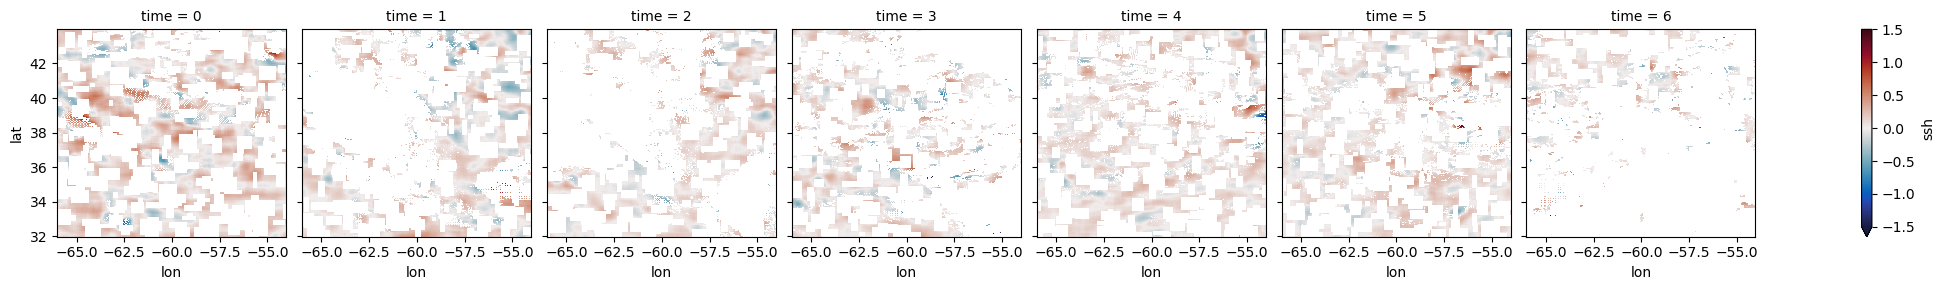

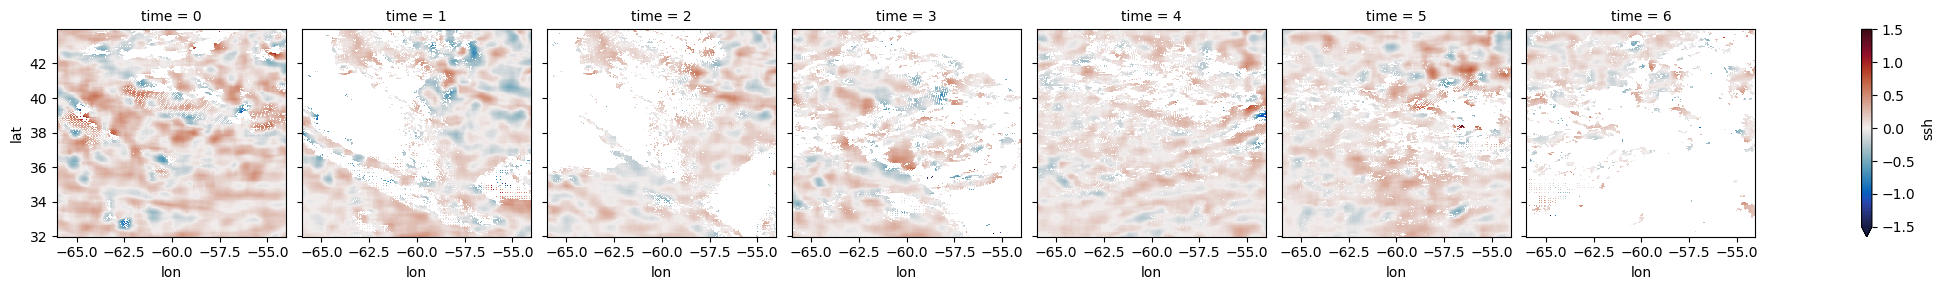

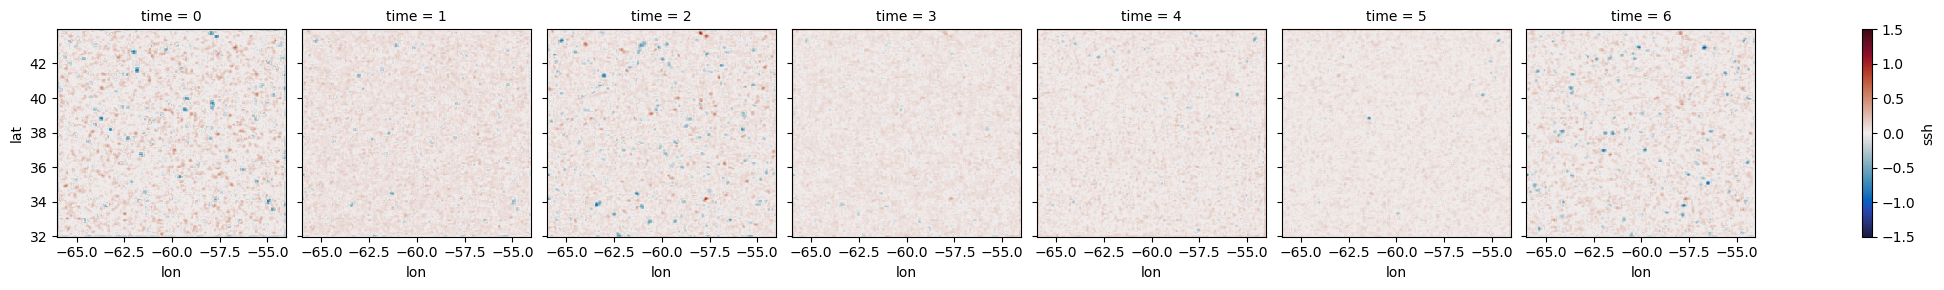

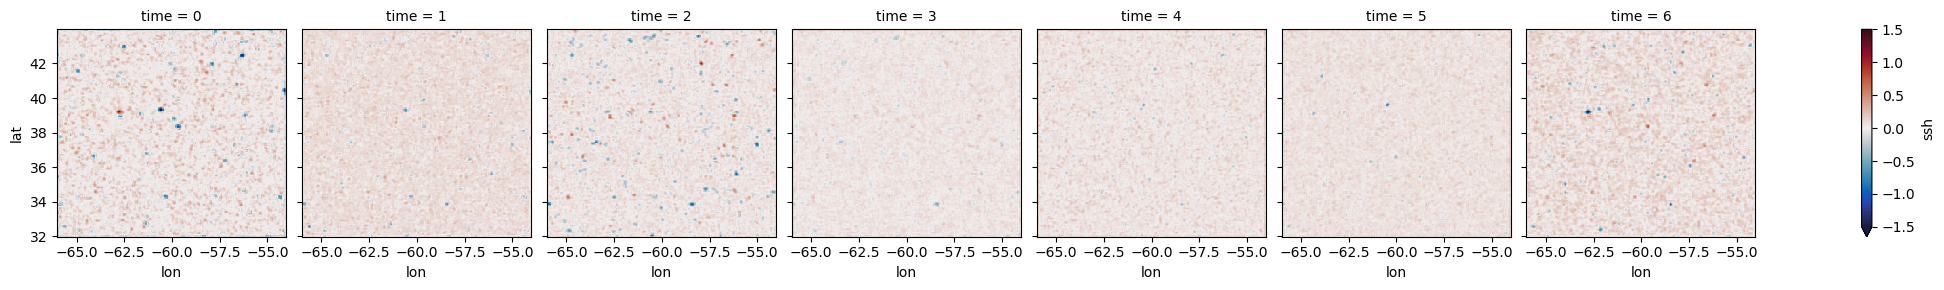

tensor(0.0008, device='cuda:0', grad_fn=<MeanBackward0>) tensor(1.4115, device='cuda:0', grad_fn=<StdBackward0>)


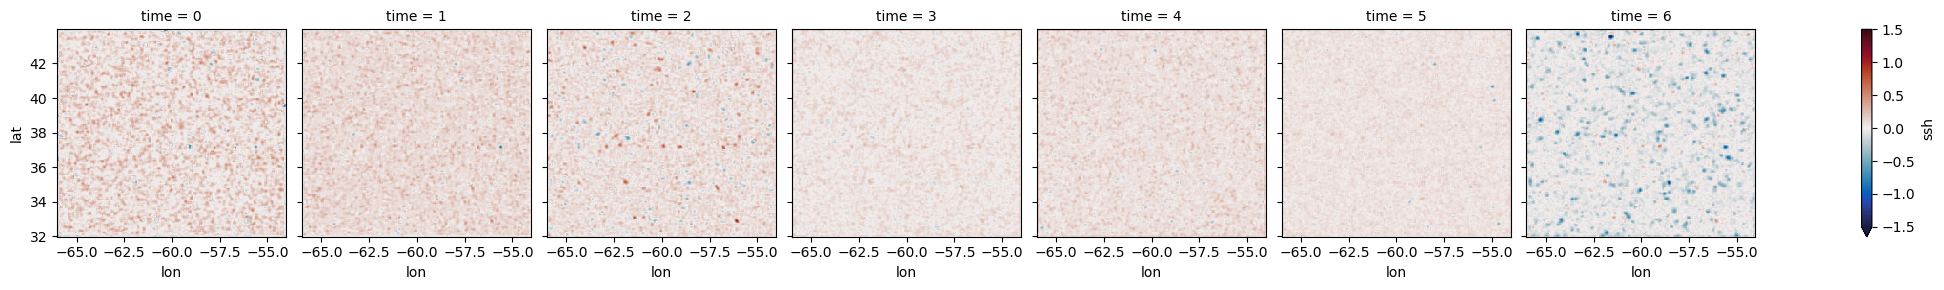

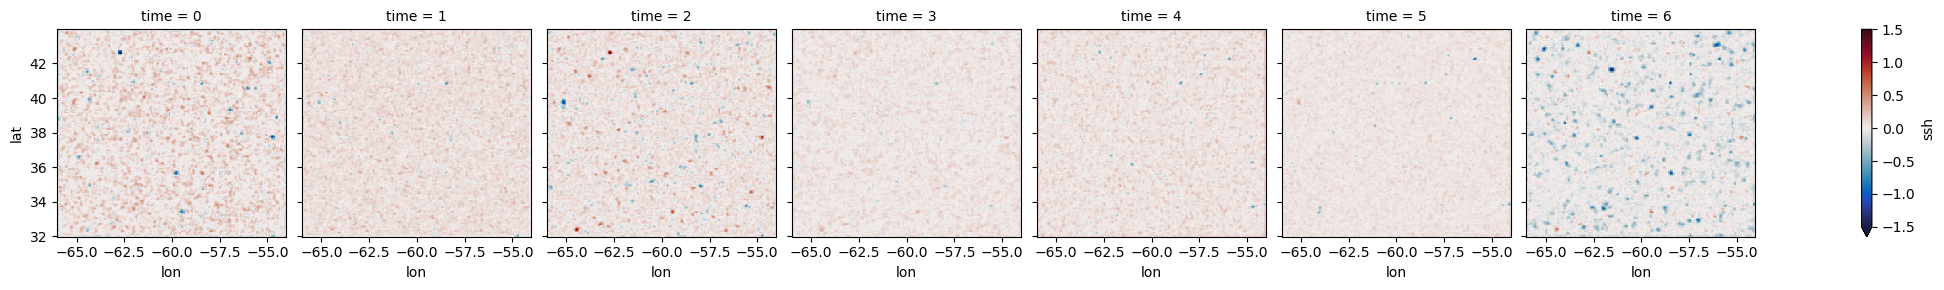

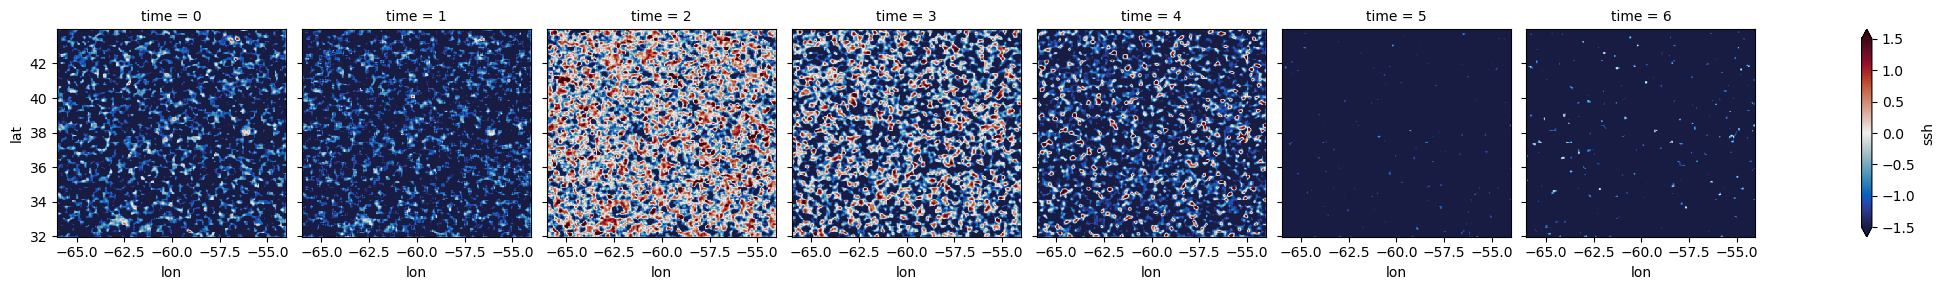

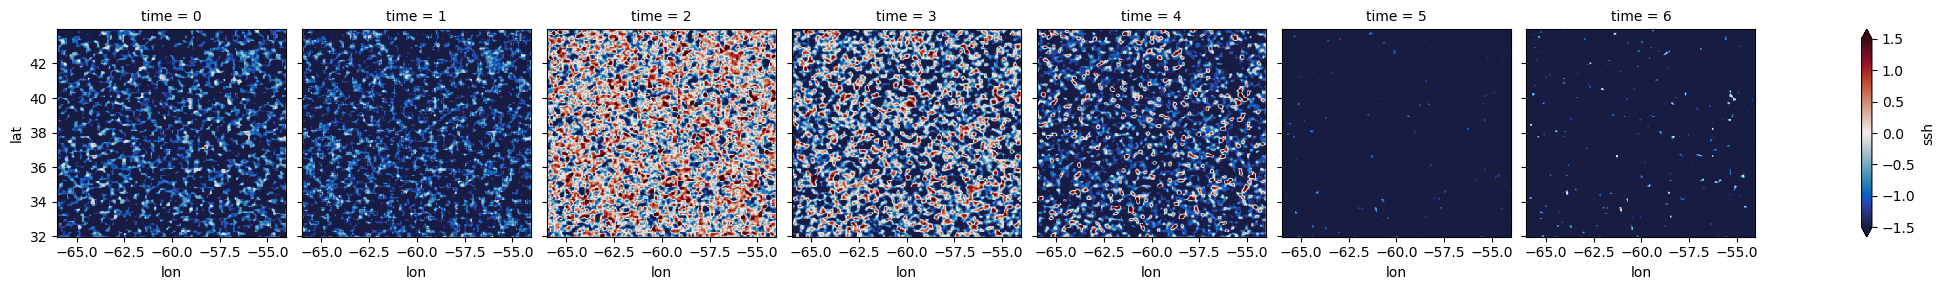

In [58]:
nt = 7

k=10
batch = next(itertools.islice(data_loader, k, None))
y = batch[0]
x = batch[1]
y = y.nan_to_num().to(device)

import cmocean as cmo
xr.Dataset(data_vars={'ssh':(('time','lat','lon'),torch.where(y==0,np.nan,y).detach().cpu()[0])},
           coords={'time':np.arange(nt),
                   'lon':np.arange(-66, -54, 0.05),
                   'lat':np.arange(32, 44, 0.05)}).ssh.plot(col='time',col_wrap=nt,vmin=-1.5,vmax=1.5,cmap=cmo.cm.balance)
plt.show()

import cmocean as cmo
xr.Dataset(data_vars={'ssh':(('time','lat','lon'),torch.where(x==0,np.nan,x).detach().cpu()[0])},
           coords={'time':np.arange(nt),
                   'lon':np.arange(-66, -54, 0.05),
                   'lat':np.arange(32, 44, 0.05)}).ssh.plot(col='time',col_wrap=nt,vmin=-1.5,vmax=1.5,cmap=cmo.cm.balance)
plt.show()

# obs-based
y = y.nan_to_num().to(device)
geo = torch.stack((batch.latv[:,0].nan_to_num(),
                                  batch.lonv[:,0].nan_to_num(),
                                  batch.land_mask[:,0].nan_to_num(),
                                  batch.topo[:,0].nan_to_num(),
                                  batch.fg_std[:,0].nan_to_num()), dim=1).to(device)
inp = torch.cat((y, geo),dim=1).to(device)
z1, mean, log_var = vae.encoder(inp)
x_hat = vae.decoder(z1)
xr_plt = xr.Dataset(data_vars={'ssh':(('time','lat','lon'),x_hat.detach().cpu()[0])},
           coords={'time':np.arange(nt),
                   'lon':np.arange(-66, -54, 0.05),
                   'lat':np.arange(32, 44, 0.05)})
xr_plt.ssh.plot(col='time',col_wrap=nt,vmin=-1.5,vmax=1.5,cmap=cmo.cm.balance)
plt.show()

z2, mean, log_var = vae.encoder(inp)
x_hat = vae.decoder(z2)
xr.Dataset(data_vars={'ssh':(('time','lat','lon'),x_hat.detach().cpu()[0])},
           coords={'time':np.arange(nt),
                   'lon':np.arange(-66, -54, 0.05),
                   'lat':np.arange(32, 44, 0.05)}).ssh.plot(col='time',col_wrap=nt,vmin=-1.5,vmax=1.5,cmap=cmo.cm.balance)
plt.show()

print(torch.mean(z2-z1),torch.std(z2-z1))
# full obs-based
x = x.nan_to_num().to(device)
inp = torch.cat((x, geo),dim=1).to(device)
z, mean, log_var = vae.encoder(inp)
x_hat = vae.decoder(z)
xr.Dataset(data_vars={'ssh':(('time','lat','lon'),x_hat.detach().cpu()[0])},
           coords={'time':np.arange(nt),
                   'lon':np.arange(-66, -54, 0.05),
                   'lat':np.arange(32, 44, 0.05)}).ssh.plot(col='time',col_wrap=nt,vmin=-1.5,vmax=1.5,cmap=cmo.cm.balance)
plt.show()

z, mean, log_var = vae.encoder(inp)
x_hat = vae.decoder(z)
xr.Dataset(data_vars={'ssh':(('time','lat','lon'),x_hat.detach().cpu()[0])},
           coords={'time':np.arange(nt),
                   'lon':np.arange(-66, -54, 0.05),
                   'lat':np.arange(32, 44, 0.05)}).ssh.plot(col='time',col_wrap=nt,vmin=-1.5,vmax=1.5,cmap=cmo.cm.balance)
plt.show()

# pure generation
z = torch.Tensor(np.random.normal(size=z.size(), scale=1.0)).to(device)
x_hat = vae.decoder(z)
xr.Dataset(data_vars={'ssh':(('time','lat','lon'),x_hat.detach().cpu()[0])},
           coords={'time':np.arange(nt),
                   'lon':np.arange(-66, -54, 0.05),
                   'lat':np.arange(32, 44, 0.05)}).ssh.plot(col='time',col_wrap=nt,vmin=-1.5,vmax=1.5,cmap=cmo.cm.balance)
plt.show()

z = torch.Tensor(np.random.normal(size=z.size(), scale=1.0)).to(device)
x_hat = vae.decoder(z)
xr.Dataset(data_vars={'ssh':(('time','lat','lon'),x_hat.detach().cpu()[0])},
           coords={'time':np.arange(nt),
                   'lon':np.arange(-66, -54, 0.05),
                   'lat':np.arange(32, 44, 0.05)}).ssh.plot(col='time',col_wrap=nt,vmin=-1.5,vmax=1.5,cmap=cmo.cm.balance)
plt.show()

# AE training

In [12]:
ckpt = torch.load('/homes/m19beauc/4dvarnet-starter/ckpt/DMI/ckpt_ae_dmi.pth', map_location=device)
ae.load_state_dict(ckpt)

RuntimeError: Error(s) in loading state_dict for AE:
	size mismatch for decoder.0.weight: copying a param with shape torch.Size([4, 25, 1, 1]) from checkpoint, the shape in current model is torch.Size([4, 50, 1, 1]).

In [34]:
#@title Training (double click to expand or collapse)

from IPython.display import clear_output
from torch.optim import Adam
from tqdm.autonotebook import tqdm
from kornia.filters import box_blur

n_epochs =  1000#@param {'type':'integer'}
## learning rate
lr = 1e-4 #@param {'type':'number'}

optimizer = Adam(
        [
            {"params": ae.parameters(), "lr": lr}
        ],
    )

tqdm_epoch = tqdm(range(n_epochs))
for epoch in tqdm_epoch:
  avg_loss = 0.
  num_items = 0
  for batch in data_loader:
    y = batch[0]
    x = batch[1]
    if x.isfinite().float().mean() < 0.8:
        continue
    y = y.nan_to_num().to(device)
    geo = torch.stack((batch.latv[:,0].nan_to_num(),
                                  batch.lonv[:,0].nan_to_num(),
                                  batch.land_mask[:,0].nan_to_num(),
                                  batch.topo[:,0].nan_to_num(),
                                  batch.fg_std[:,0].nan_to_num()), dim=1).to(device)
    inp = torch.cat((y, geo),dim=1)
    z = ae.encoder(inp)
    x_hat = ae.decoder(z)
    loss_ae = ae.ae_loss(x.to(device), x_hat)
    loss = loss_ae
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    avg_loss += loss.item() * x.shape[0]
    num_items += x.shape[0]
  # Print the averaged training loss so far.
  tqdm_epoch.set_description('Average Loss: {:5f}'.format(avg_loss / num_items))
  # Update the checkpoint after each epoch of training.
  torch.save(ae.state_dict(), '../../ckpt/DMI/ckpt_ae_dmi.pth')

Average Loss: 0.096064:   0%|                | 4/1000 [01:31<6:20:18, 22.91s/it]


KeyboardInterrupt: 

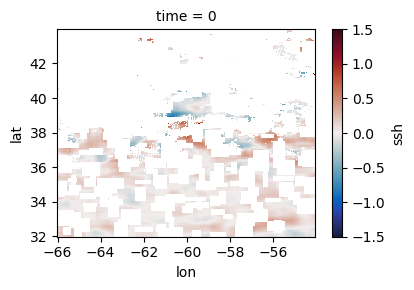

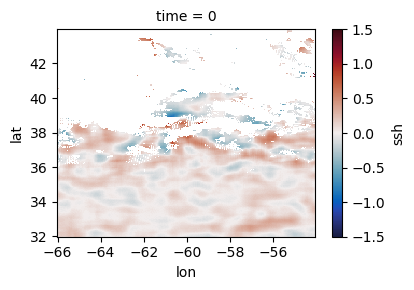

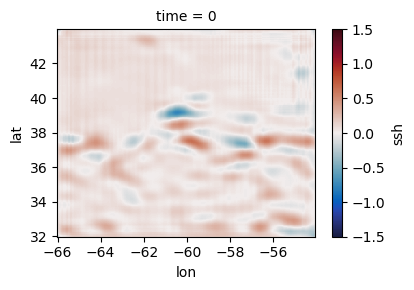

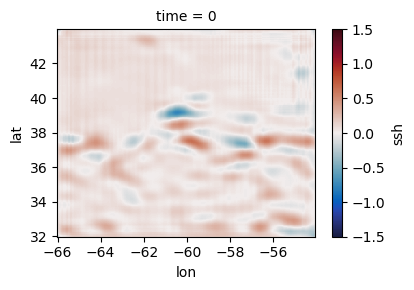

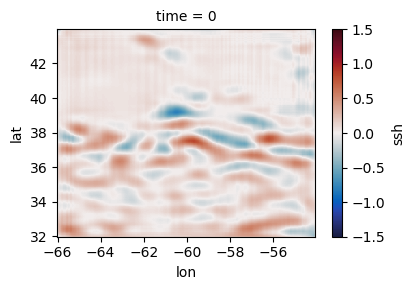

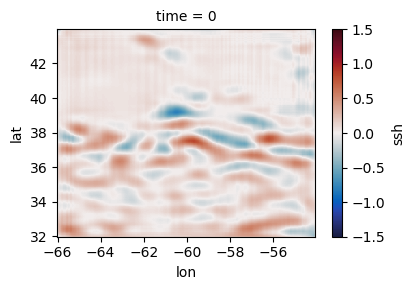

In [35]:
nt = 1

import cmocean as cmo
xr.Dataset(data_vars={'ssh':(('time','lat','lon'),torch.where(y==0,np.nan,y).detach().cpu()[0])},
           coords={'time':np.arange(nt),
                   'lon':np.arange(-66, -54, 0.05),
                   'lat':np.arange(32, 44, 0.05)}).ssh.plot(col='time',col_wrap=nt,vmin=-1.5,vmax=1.5,cmap=cmo.cm.balance)
plt.show()

import cmocean as cmo
xr.Dataset(data_vars={'ssh':(('time','lat','lon'),torch.where(x==0,np.nan,x).detach().cpu()[0])},
           coords={'time':np.arange(nt),
                   'lon':np.arange(-66, -54, 0.05),
                   'lat':np.arange(32, 44, 0.05)}).ssh.plot(col='time',col_wrap=nt,vmin=-1.5,vmax=1.5,cmap=cmo.cm.balance)
plt.show()

# obs-based
y = y.nan_to_num().to(device)
geo = torch.stack((batch.latv[:,0].nan_to_num(),
                                  batch.lonv[:,0].nan_to_num(),
                                  batch.land_mask[:,0].nan_to_num(),
                                  batch.topo[:,0].nan_to_num(),
                                  batch.fg_std[:,0].nan_to_num()), dim=1).to(device)
inp = torch.cat((y, geo),dim=1).to(device)
z1 = ae.encoder(inp)
x_hat = ae.decoder(z1)
xr_plt = xr.Dataset(data_vars={'ssh':(('time','lat','lon'),x_hat.detach().cpu()[0])},
           coords={'time':np.arange(nt),
                   'lon':np.arange(-66, -54, 0.05),
                   'lat':np.arange(32, 44, 0.05)})
xr_plt.ssh.plot(col='time',col_wrap=nt,vmin=-1.5,vmax=1.5,cmap=cmo.cm.balance)
plt.show()

z2 = ae.encoder(inp)#+1
x_hat = ae.decoder(z2)
xr.Dataset(data_vars={'ssh':(('time','lat','lon'),x_hat.detach().cpu()[0])},
           coords={'time':np.arange(nt),
                   'lon':np.arange(-66, -54, 0.05),
                   'lat':np.arange(32, 44, 0.05)}).ssh.plot(col='time',col_wrap=nt,vmin=-1.5,vmax=1.5,cmap=cmo.cm.balance)
plt.show()

# full obs-based
x = x.nan_to_num().to(device)
inp = torch.cat((x, geo),dim=1).to(device)
z = ae.encoder(inp)
x_hat = ae.decoder(z)
xr.Dataset(data_vars={'ssh':(('time','lat','lon'),x_hat.detach().cpu()[0])},
           coords={'time':np.arange(nt),
                   'lon':np.arange(-66, -54, 0.05),
                   'lat':np.arange(32, 44, 0.05)}).ssh.plot(col='time',col_wrap=nt,vmin=-1.5,vmax=1.5,cmap=cmo.cm.balance)
plt.show()

z = ae.encoder(inp)
x_hat = ae.decoder(z)
xr.Dataset(data_vars={'ssh':(('time','lat','lon'),x_hat.detach().cpu()[0])},
           coords={'time':np.arange(nt),
                   'lon':np.arange(-66, -54, 0.05),
                   'lat':np.arange(32, 44, 0.05)}).ssh.plot(col='time',col_wrap=nt,vmin=-1.5,vmax=1.5,cmap=cmo.cm.balance)
plt.show()

# OLD

In [12]:
class VAE(nn.Module):
    def __init__(self, input_shape, z_dim):
        super().__init__()

        self.dim_in = input_shape[0]
        self.z_dim = z_dim
        self.input_shape = input_shape

        # encoder
        self.encoder_conv = nn.Sequential(
            nn.Conv2d(self.dim_in, 30, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(30, 60, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(60, 120, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.conv_out_size = self._get_conv_out_size(input_shape)
        self.mu = nn.Sequential(
            nn.Linear(self.conv_out_size, z_dim),
            nn.LeakyReLU(),
            nn.Dropout(0.2)
        )

        self.log_var = nn.Sequential(
            nn.Linear(self.conv_out_size, z_dim),
            nn.LeakyReLU(),
            nn.Dropout(0.2)
        )

        # decoder
        self.decoder_linear = nn.Sequential(
            nn.Linear(z_dim, self.conv_out_size),
            nn.LeakyReLU(),
            nn.Dropout(0.2)
        )

        self.decoder_conv = nn.Sequential(
            nn.ConvTranspose2d(120, 60, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(60, 30, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(30, self.dim_in-5, 3, stride=2, padding=1, output_padding=1)
        )
        
    def encode(self, x):
        
        x = self.encoder_conv(x)
        x = x.view(x.size()[0], -1)
        mu_p = self.mu(x)
        log_var_p = self.log_var(x)
        return mu_p, log_var_p

    def reparametrization(self, mu, log_var):
        epsilon = torch.Tensor(np.random.normal(size=(self.z_dim), scale=1.0))
        epsilon = epsilon.to(mu.device)
        return mu + epsilon * torch.exp(log_var / 2)
    
    def encoder(self,x):
        mean, log_var = self.encode(x)
        z = self.reparametrization(mean, log_var)
        return z, mean, log_var

    def decode(self, x):
        x = self.decoder_linear(x)
        x = x.view(x.size()[0], *self.conv_out_shape[1:])
        x = self.decoder_conv(x)
        return x

    def decoder(self, x):
        x = self.decode(x)
        return x

    def forward(self, x):
        mu_p, log_var_p = self.encode(x)
        x = self.reparametrization(mu_p, log_var_p)
        images_p = self.decode(x)
        return mu_p, log_var_p, images_p

    def project_latent_space(self,x):
        mu_p, log_var_p = self.encode(x)
        x = self.reparametrization(mu_p, log_var_p)
        return x

    
    def vae_loss(self, x, x_hat, mean, log_var, wKL=.01):
        err = x_hat-x
        err_grad = sobel(x_hat)-sobel(x)
        mask = torch.isnan(err)
        mask_grad = torch.isnan(err_grad)
        zeros= torch.zeros(err.size()).to(device)
        
        
        reproduction_loss = nn.functional.mse_loss(err[~mask], zeros[~mask], reduction='mean')
        #reproduction_loss = nn.functional.l1_loss(err[~mask], zeros[~mask], reduction='mean')

        #log_sigma_opt = 0.5 * reproduction_loss.log()
        grad_reproduction_loss = nn.functional.mse_loss(err_grad[~mask_grad], zeros[~mask_grad], reduction='mean')
        #log_sigma_opt_grad = 0.5 * grad_reproduction_loss.log()
        
        #reproduction_loss = 0.5 * torch.pow(err[~mask]/log_sigma_opt.exp(), 2) + log_sigma_opt
        #reproduction_loss = reproduction_loss.sum()
        #grad_reproduction_loss = 0.5 * torch.pow(err_grad[~mask]/log_sigma_opt_grad.exp(), 2) + log_sigma_opt_grad
        #grad_reproduction_loss = grad_reproduction_loss.sum()        
        
        KLD = - 0.5 * torch.sum(1+ log_var - mean.pow(2) - log_var.exp())
        #return reproduction_loss + 100.*grad_reproduction_loss + wKL*KLD, reproduction_loss, KLD
        return reproduction_loss  + wKL*KLD, reproduction_loss, KLD
        #return reproduction_loss, reproduction_loss, KLD

    def _get_conv_out_size(self, shape):
        out = self.encoder_conv(torch.zeros(1, *shape))
        self.conv_out_shape = out.size()
        return int(np.prod(self.conv_out_shape))
  
vae = VAE(input_shape=(1+5,240,240), z_dim=200).to(device)